# Electoral Bonds Analysis

### Importing the libraries:

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# Wordcloud
from wordcloud import WordCloud
import seaborn as sns 
sns.set_theme(style="whitegrid")
sns.dark_palette((20, 60, 50), input="husl")
# import interactive libraries
import ipywidgets
# library to create sankey charts.
from pySankey.sankey import sankey 
# Library to ignore warning 
import warnings                     # enable this once the code is finalized.
warnings.filterwarnings("ignore")

##### Setting the row and column count.

In [2]:
# Set display.max_rows to increase the row limit
pd.set_option('display.max_rows', 100)  # Change 100 to the desired row limit

# Set display.max_columns to increase the column limit
pd.set_option('display.max_columns', 50)  # Change 50 to the desired column limit

### Importing the data: 

- Here we are importing the data about the donors and recivers. 

In [3]:
# Importing donors data as a dataframe: 
donors_df = pd.read_csv("RawData/donor_data.csv")

In [4]:
# Importing political parties recived amt data
receiver_df = pd.read_csv("RawData/receiver_data.csv")

### The Bank codes details have been extracted from this website: 

> All the bank banches don't have the authority to issue electoral bonds only few branches of SBI bank can issue them and this table contains the details of that banks and based on the branch code we can connect to the reciver and donor data. 

- [Link](https://pib.gov.in/Pressreleaseshare.aspx?PRID=1566604)

In [5]:
# Importing bank details.
bankdata_df = pd.read_excel("RawData/bank_data.xlsx")

### Peeking into bank data

In [6]:
bankdata_df.head(2)

Sl. No.                           State  \
0        1                           Delhi   
1        2  Haryana, Punjab and Chandigarh   

                        Name Of The Branch & Address  Branch Code No.  \
0  New Delhi Main Branch,11, Parliament Street, N...              691   
1  Chandigarh Main Branch,SCO 43-48, Banking Squa...              628   

  Branch City  
0   New Delhi  
1  Chandigarh

In [7]:
bankdata_df.columns

Index(['Sl. No.', 'State', 'Name Of The Branch & Address', 'Branch Code No.',
       'Branch City'],
      dtype='object')

In [8]:
bankdata_df.shape

(29, 5)

In [9]:
bankdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sl. No.                       29 non-null     int64 
 1   State                         29 non-null     object
 2   Name Of The Branch & Address  29 non-null     object
 3   Branch Code No.               29 non-null     int64 
 4   Branch City                   29 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


In [10]:
bankdata_df['Branch Code No.'].count()

print(f"There are total 29 banks who can issues electoral bonds.")

There are total 29 banks who can issues electoral bonds.


> There are only 29 Banks who can issue electoral bonds

> Address is of not important or we don't have any plans to use it in the analysis. 
>I am removing the column so that my dataframe is slick and my joins will be concise.

In [11]:
# Drop Adress column bankdata
bankdata_df.drop('Name Of The Branch & Address',axis=1,inplace=True)

In [12]:
bankdata_df['State'] = bankdata_df['State'].str.strip()
bankdata_df['Branch City'] = bankdata_df['Branch City'].str.strip()

In [13]:
bankdata_df.head(2)

Sl. No.                           State  Branch Code No. Branch City
0        1                           Delhi              691   New Delhi
1        2  Haryana, Punjab and Chandigarh              628  Chandigarh

In [14]:
bankdata_df.columns

Index(['Sl. No.', 'State', 'Branch Code No.', 'Branch City'], dtype='object')

In [15]:
bankdata_df.drop(['Sl. No.'],axis=1,inplace=True)

In [16]:
bankdata_df.head()

State  Branch Code No. Branch City
0                           Delhi              691   New Delhi
1  Haryana, Punjab and Chandigarh              628  Chandigarh
2                 HimachalPradesh              718      Shimla
3                Jammu andKashmir             2295    Srinagar
4                     Uttarakhand              630    Dehradun

### Looking into donors data setting data types

In [17]:
donors_df.head(2)

SNo                      Urn JournalDate PurchaseDate  ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  IssueBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000                1   
1  A B C INDIA LIMITED     TL       11447        1000000                1   

   PayTeller  
0    5899230  
1    5899230

### Some of the names in the purchaser columns are spelled wrongly and same company has bought bonds under different names after due diligince some of the names are changed showed like below.   

|Old Purchaser Name                                             |Replaced Purchaser Name                            |
|---------------------------------------------------------------|---------------------------------------------------|
|'AASHMAN ENERGY PRIVATE LIMITED'                               |'AASHMAN ENERGY PRIVATE LIMITED'                   |
|'AASHMAN ENERGY PVT LTD'                                       |'AASHMAN ENERGY PRIVATE LIMITED'                   |
|'ACHINTYA SOLAR POWER PRIVATE LIMITED'                         |'ACHINTYA SOLAR POWER PRIVATE LIMITED'             |
|'ACHINTYA SOLAR POWER PVT LTD'                                 |'ACHINTYA SOLAR POWER PRIVATE LIMITED'             |
|'APCO INFRATECH PRIVATE LIMITED'                               |'APCO INFRATECH PRIVATE LIMITED'                   |
|'APCO INFRATECH PRIVATE LTD'                                   |'APCO INFRATECH PRIVATE LIMITED'                   |
|'APCO INFRATECH PVT LTD FORMERLY AP'                           |'APCO INFRATECH PRIVATE LIMITED'                   |
|'ASKUS LOGISTICS PRIV'                                         |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'ASKUS LOGISTICS PRIVATE LIMITED'                              |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'ASKUS LOGISTICS PVT LTD'                                      |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'AUROBINDO PHARMA LIMITED'                                     |'AUROBINDO PHARMA LIMITED'                         |
|'AUROBINDO PHARMA LTD'                                         |'AUROBINDO PHARMA LIMITED'                         |
|'AVEES TRADING & FINANCE PVT LTD'                              |'AVEES TRADING AND FINANCE PVT LTD'                |
|'AVEES TRADING AND FINANCE PVT LTD'                            |'AVEES TRADING AND FINANCE PVT LTD'                |
|'AVEES TRADING FINANCE PVT LTD'                                |'AVEES TRADING AND FINANCE PVT LTD'                |
|'BALU IRON & STEEL COMPANY'                                    |'BALU IRON AND STEEL COMPANY'                      |
|'BALU IRON AND STEEL COMPANY'                                  |'BALU IRON AND STEEL COMPANY'                      |
|'BESSEGGEN INFOTECH LLP'                                       |'BESSEGGEN INFOTECH LLP'                           |
|'BESSEGGENINFOTECHLLP'                                         |'BESSEGGEN INFOTECH LLP'                           |
|'BHARTI AIRTEL LIMITED'                                        |'BHARTI AIRTEL LIMITED'                            |
|'BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO'                  |'BHARTI AIRTEL LIMITED'                            |
|'CASTAMET WORKS'                                               |'CASTAMET WORKS PRIVATE LIMITED'                   |
|'CASTAMET WORKS PRIVATE LIMITED'                               |'CASTAMET WORKS PRIVATE LIMITED'                   |
|'CHOWGLE AND COMPANY PVT LTD'                                  |'CHOWGULE AND COMPANY PVT LTD'                     |
|'CHOWGULE AND COMPANY PVT LTD'                                 |'CHOWGULE AND COMPANY PVT LTD'                     |
|'CIPLA LIMITED'                                                |'CIPLA LIMITED'                                    |
|'CIPLA LTD'                                                    |'CIPLA LIMITED'                                    |
|'COMFORT TRIMS PRIVATE LIMITED'                                |'COMFORT TRIMS PRIVATE LIMITED'                    |
|'COMFORT TRIMS PRIVATE LIMITED DIVIS'                          |'COMFORT TRIMS PRIVATE LIMITED'                    |
|'CROCHET TRADE AND INVESTMENT PVT L'                           |'CROCHET TRADE AND INVESTMENT PVT '                |
|'CROCHET TRADE AND INVESTMENT PVT LT'                          |'CROCHET TRADE AND INVESTMENT PVT '                |
|'D S ENGINEERING WORKS LLP'                                    |'D S ENGINEERING WORKSHOP LLP'                     |
|'D S ENGINEERING WORKSHOP LLP'                                 |'D S ENGINEERING WORKSHOP LLP'                     |
|'DASAMI LAB PRIVATE LIMITED (FORMERLY HEL IUS LAB PVT LTD)'    |'DASAMI LAB PRIVATE LTD'                           |
|'DASAMI LAB PRIVATE LTD'                                       |'DASAMI LAB PRIVATE LTD'                           |
|'DCM SHRIRAM LIMITED'                                          |'DCM SHRIRAM LIMITED'                              |
|'DCM SHRIRAM LTD'                                              |'DCM SHRIRAM LIMITED'                              |
|'DEMPO IND PVT LTD NAVHIND PAPERSAND PUB'                      |'DEMPO INDUSTRIES PVT LTD'                         |
|'DEMPO INDUSTRIES PVT LTD'                                     |'DEMPO INDUSTRIES PVT LTD'                         |
|'DERIVE TRADING AND RESORTS PRIVATE LIMIT'                     |'DERIVE TRADING AND RESORTS PRIVATE LIMITED'       |
|'DERIVE TRADING AND RESORTS PRIVATE LIMITED'                   |'DERIVE TRADING AND RESORTS PRIVATE LIMITED'       |
|'DIVYESH POWER PRIVATE LIMITED'                                |'DIVYESH POWER PRIVATE LIMITED'                    |
|'DIVYESH POWER PVT LTD'                                        |'DIVYESH POWER PRIVATE LIMITED'                    |
|'DR REDDYS LABORATORIES LIMITED'                               |'DR REDDYS LABORATORIES LIMITED'                   |
|'DR.REDDY'S LABORATORIES LTD'                                  |'DR REDDYS LABORATORIES LIMITED'                   |
|'ELENA RENEWABLE ENERGY PRIVATE LIMITED'                       |'ELENA RENEWABLE ENERGY PRIVATE LIMITED'           |
|'ELENA RENEWABLE ENERGY PVT LTD'                               |'ELENA RENEWABLE ENERGY PRIVATE LIMITED'           |
|'FUTURE GAMING AND HOTEL SERVICES PR'                          |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED'             |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'FUTURE GAMING AND HOTEL SERVICES PVT LTD'                     |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'GENUS POWER'                                                  |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GENUS POWER INFRASTRUCTURES LIMITED'                          |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GENUS POWER INFRASTRUCTURES LTD'                              |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GOODLUCK INDIA LIMITED'                                       |'GOODLUCK INDIA LIMITED'                           |
|'GOODLUCK INDIA LTD'                                           |'GOODLUCK INDIA LIMITED'                           |
|'HINDYS LAB PRIVATE LTD'                                       |'HINDYS LAB PRIVATE LTD'                           |
|'HINDYS LAB PVT. LTD. (PREVIOUSLY HIND LI FE SCIENCES PVT LTD)'|'HINDYS LAB PRIVATE LTD'                           |
|'HONOUR LAB LIMITED'                                           |'HONOUR LAB LIMITED'                               |
|'HONOUR LAB LTD'                                               |'HONOUR LAB LIMITED'                               |
|'INORBIT MALLS INDIA PRIVATE LIMIT'                            |'INORBIT MALLS INDIA PRIVATE LIMITED'              |
|'INORBIT MALLS INDIA PRIVATE LIMITED'                          |'INORBIT MALLS INDIA PRIVATE LIMITED'              |
|'INTERGLOBE AIR TRANSPORT LIMITED'                             |'INTERGLOBE AIR TRANSPORT LIMITED'                 |
|'INTERGLOBE AVIATION LIMITED'                                  |'INTERGLOBE AIR TRANSPORT LIMITED'                 |
|'J K CEMENT LIMITED'                                           |'J K CEMENT LIMITED'                               |
|'J K CEMENT LTD.'                                              |'J K CEMENT LIMITED'                               |
|'J.K.CEMENT LTD.'                                              |'J K CEMENT LIMITED'                               |
|'JAI SUSPENSION SYSTEMS L L P'                                 |'JAI SUSPENSION SYSTEMS LLP'                       |
|'JAI SUSPENSION SYSTEMS LLP'                                   |'JAI SUSPENSION SYSTEMS LLP'                       |
|'LAXMI INDUSTRIAL BOTTLING PLAN'                               |'LAXMI INDUSTRIAL BOTTLING PLANT'                  |
|'LAXMI INDUSTRIAL BOTTLING PLANT'                              |'LAXMI INDUSTRIAL BOTTLING PLANT'                  |
|'MADHYA PRADESH WASTE MANAGEMENT PR'                           |'MADHYA PRADESH WASTE MANAGEMENT'                  |
|'MADHYA PRADESH WASTE MANAGEMENT PRI'                          |'MADHYA PRADESH WASTE MANAGEMENT'                  |
|'MEGHA ENGINEERING & INFRASTRUCTURES LIMITED'                  |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED'               |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MEGHA ENGINEERING AND INFRASTRUCTURES LTD'                    |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MICRO LABS LIMITED'                                           |'MICRO LABS LIMITED'                               |
|'MICRO LABS LTD'                                               |'MICRO LABS LIMITED'                               |
|'MKK METAL SECTIONS P LTD'                                     |'MKK METAL SECTIONS PVT LTD'                       |
|'MKK METAL SECTIONS PVT LTD'                                   |'MKK METAL SECTIONS PVT LTD'                       |
|'MODERN ROAD MAKERS PVT LTD'                                   |'MODERN ROAD MAKERS PVT LTD'                       |
|'MODERN ROAD MAKERS PVT. LTD.'                                 |'MODERN ROAD MAKERS PVT LTD'                       |
|'MOHIT MINERALS LIMITED'                                       |'MOHIT MINERALS LIMITED'                           |
|'MOHIT MINERALS LTD'                                           |'MOHIT MINERALS LIMITED'                           |
|'MY HOME INFRASTRUCTURES PRIVATE LI'                           |'MY HOME INFRASTRUCTURES PVT LTD '                 |
|'MY HOME INFRASTRUCTURES PVT LTD MY'                           |'MY HOME INFRASTRUCTURES PVT LTD '                 |
|'MYTRAH ENERGY INDIA PRIVATE LIMITED'                          |'MYTRAH ENERGY INDIA PRIVATE LIMITED'              |
|'MYTRAH ENERGY(INDIA) PRIVATE LIMITED'                         |'MYTRAH ENERGY INDIA PRIVATE LIMITED'              |
|'NATCO PHARMA LIMITED'                                         |'NATCO PHARMA LIMITED'                             |
|'NATCO PHARMA LTD'                                             |'NATCO PHARMA LIMITED'                             |
|'NAVAYUGA ENGINEERING CO LTD'                                  |'NAVAYUGA ENGINEERING COMPANY LIMITED'             |
|'NAVAYUGA ENGINEERING COMPANY LIMITED'                         |'NAVAYUGA ENGINEERING COMPANY LIMITED'             |
|'NSL SEZ HYDERABAD PRIVATE LIMITED'                            |'NSL SEZ HYDERABAD PRIVATE LIMITED'                |
|'NSL SEZ(HYDERABAD) PRIVATE LIMITED'                           |'NSL SEZ HYDERABAD PRIVATE LIMITED'                |
|'NUVOCO VISTAS CORP. LTD'                                      |'NUVOCO VISTAS CORP LTD'                           |
|'NUVOCO VISTAS CORPORATION LTD'                                |'NUVOCO VISTAS CORP LTD'                           |
|'ORISSA METALIKS PVT LIMITED'                                  |'ORISSA METALIKS PRIVATE LIMITED'                  |
|'ORRISA METALIKS PVT LTD'                                      |'ORISSA METALIKS PRIVATE LIMITED'                  |
|'PALM SHELTER ESTATE DEVELOPMENT LL'                           |'PALM SHELTER ESTATE DEVELOPMENT LLP'              |
|'PALM SHELTER ESTATE DEVELOPMENT LLP'                          |'PALM SHELTER ESTATE DEVELOPMENT LLP'              |
|'PENGUIN TRADING & AGENCIES LIMITED'                           |'PENGUIN TRADING AND AGENCIES LIMITED'             |
|'PENGUIN TRADING AND AGENCIES LTD'                             |'PENGUIN TRADING AND AGENCIES LIMITED'             |
|'PHILIPS CARBON BLACK LTD'                                     |'PHILLIPS CARBON BLACK LIMITED'                    |
|'PHILLIPS CARBON BLACK LIMITED'                                |'PHILLIPS CARBON BLACK LIMITED'                    |
|'PLUTO FINANCE PRIVATE LTD'                                    |'PLUTO FINANCE PRIVATE LIMITED'                    |
|'PLUTO FINANCE PRIVATE LTD.'                                   |'PLUTO FINANCE PRIVATE LIMITED'                    |
|'PRARAMBH SECURITIES PVT LTDOWN A/C'                           |'PRARAMBH SECURITIES PVT LTD'                      |
|'PRARAMBH SECURITIES PVT LTDPROPRIET'                          |'PRARAMBH SECURITIES PVT LTD'                      |
|'PROCURE ADVISORY SERVICES PRIVATE L'                          |'PROCURE ADVISORY SERVICES PRIVATE LTD'            |
|'PROCURE ADVISORY SERVICES PRIVATE LTD'                        |'PROCURE ADVISORY SERVICES PRIVATE LTD'            |
|'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITE D'                   |'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED'        |
|'R.S.BROTHERS RETIAL INDIA PVT LTD'                            |'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED'        |
|'RAMESH AGARWAL C S BOTTLING PL'                               |'RAMESH AGARWAL C S BOTTLING PLANT'                |
|'RAMESH AGARWAL C S BOTTLING PLANT'                            |'RAMESH AGARWAL C S BOTTLING PLANT'                |
|'RANISATI MERCANTILES PVT LTD'                                 |'RANISATI MERCANTILES PVT LTD'                     |
|'RANISATI MERCANTILES PVT. LTD.'                               |'RANISATI MERCANTILES PVT LTD'                     |
|'RIPLEY & CO STEVDORING & HANDLING PVT LT D'                   |'RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD'   |
|'RIPLEY AND CO. STEVEDORING & HANDLING PVT LTD'                |'RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD'   |
|'ROSHNI DEALMARK PRIVATE LIMITED'                              |'ROSHNI DEALMARK PRIVATE LIMITED'                  |
|'ROSHNI DEALMARK PRIVATE LTD'                                  |'ROSHNI DEALMARK PRIVATE LIMITED'                  |
|'S K TRADERS'                                                  |'S K TRADING CO.'                                  |
|'S K TRADING CO.'                                              |'S K TRADING CO.'                                  |
|'SELMAR LAB PRIVATE LIMITED'                                   |'SELMAR LAB PRIVATE LIMITED'                       |
|'SELMAR LAB PRIVATE LTD'                                       |'SELMAR LAB PRIVATE LIMITED'                       |
|'SENGUPTA AND SENGUPTA PRIVATE LIMIT'                          |'SENGUPTA AND SENGUPTA PRIVATE LIMIT'              |
|'SENGUPTA AND SENGUPTA PVT LTD'                                |'SENGUPTA AND SENGUPTA PRIVATE LIMIT'              |
|'SHREE CEMENT LIMITED'                                         |'SHREE CEMENT LIMITED'                             |
|'SHREE CEMENT LTD'                                             |'SHREE CEMENT LIMITED'                             |
|'SKEIRON RENEWABLE ENERGY AMIDYALA P'                          |'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'|
|'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'            |'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'|
|'SOM DISTILERIES PRIVATE LTD'                                  |'SOM DISTILLERIES PVT LTD'                         |
|'SOM DISTILLERIES BREWERIES LIMITED'                           |'SOM DISTILLERIES PVT LTD'                         |
|'SOM DISTILLERIES PVT LTD'                                     |'SOM DISTILLERIES PVT LTD'                         |
|'SPECO INFRASTRUCTURE'                                         |'SPECO INFRASTRUCTURES'                            |
|'SPECO INFRASTRUCTURES'                                        |'SPECO INFRASTRUCTURES'                            |
|'SRI SIDDHARTH INFRATECH & SERVICES(I) PVT LTD'                |'SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD'     |
|'SRI SIDDHARTH INFRATECH AND SERVICES I P'                     |'SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD'     |
|'SUN PHARMA LABORATORIES LIMTED'                               |'SUN PHARMA LABORATORIES LIMTED'                   |
|'SUN PHARMA LABORATORIES LTD'                                  |'SUN PHARMA LABORATORIES LIMTED'                   |
|'THRIVENI EARTH MOVERS PVT LTD'                                |'THRIVENI EARTH MOVERS PVT LTD'                    |
|'THRIVENI EARTHMOVERS PVT LTD'                                 |'THRIVENI EARTH MOVERS PVT LTD'                    |
|'TORRENT PHARMACEUTICALS LIMITED'                              |'TORRENT PHARMACEUTICALS LIMITED'                  |
|'TORRENT PHARMACEUTICALS LTD'                                  |'TORRENT PHARMACEUTICALS LIMITED'                  |
|'TORRENT POWER LIMITED'                                        |'TORRENT POWER LIMITED'                            |
|'TORRENT POWER LTD'                                            |'TORRENT POWER LIMITED'                            |
|'TRANSWAYS EXIM PRIVATE LIMITED'                               |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRANSWAYS EXIM PRIVATE LTD'                                   |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRANSWAYS EXIM PVT LTD'                                       |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRIDENT LIMITED'                                              |'TRIDENT LIMITED'                                  |
|'TRIDENT LIMITED {FORMERLY ABHISHEK INDUS TRIES LIMITED}'      |'TRIDENT LIMITED'                                  |
|'ULTRA TECH CEMENT LIMITED'                                    |'ULTRA TECH CEMENT LIMITED'                        |
|'ULTRATECHCEMENTSLTD'                                          |'ULTRA TECH CEMENT LIMITED'                        |
|'UTKAL ALUMINA INTERNATIONAL LIMITED'                          |'UTKAL ALUMINA INTERNATIONAL LIMITED'              |
|'UTKAL ALUMINA INTERNATIONAL LTD'                              |'UTKAL ALUMINA INTERNATIONAL LIMITED'              |
|'VARAS INTERNATIONAL PRIVATE LIMITED'                          |'VARAS INTERNATIONAL PRIVATE LIMITED'              |
|'VARAS INTERNATIONAL PVT LTD'                                  |'VARAS INTERNATIONAL PRIVATE LIMITED'              |
|'VARDHMAN TEXTILES LIMITED'                                    |'VARDHMAN TEXTILES LIMITED'                        |
|'VARDHMAN TEXTILES LTD'                                        |'VARDHMAN TEXTILES LIMITED'                        |
|'VEDANTA LIMITED'                                              |'VEDANTA LIMITED'                                  |
|'VEDANTA LTD'                                                  |'VEDANTA LIMITED'                                  |
|'WARORA CHANDRAPUR BALLARPUR TOLLRO'                           |'WARORA CHANDRAPUR BALLARPUR TOLL ROAD'            |
|'WARORA CHANDRAPUR BALLARPUR TOLLROA'                          |'WARORA CHANDRAPUR BALLARPUR TOLL ROAD'            |
|'WELSPUN CORP LIMITED'                                         |'WELSPUN CORP LIMITED'                             |
|'WELSPUN CORP LTD'                                             |'WELSPUN CORP LIMITED'                             |
|'ZUVAN ENERGY PRIVATE LIMITED'                                 |'ZUVAN ENERGY PRIVATE LIMITED'                     |
|'ZUVAN ENERGY PVT LTD'                                         |'ZUVAN ENERGY PRIVATE LIMITED'                     |
|'GREENKO RAYALA WIND POWER PVT LTD'                            |'GREENKO RAYALA WIND POWER PRIVATE LIMITED'        |
|'GREENKO RAYALA WIND POWER PRIVATE LIMITE D'                   |'GREENKO RAYALA WIND POWER PRIVATE LIMITED'        |

In [18]:
donors_df['Purchaser'].replace('AASHMAN ENERGY PRIVATE LIMITED','AASHMAN ENERGY PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('AASHMAN ENERGY PVT LTD','AASHMAN ENERGY PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ACHINTYA SOLAR POWER PRIVATE LIMITED','ACHINTYA SOLAR POWER PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ACHINTYA SOLAR POWER PVT LTD','ACHINTYA SOLAR POWER PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('APCO INFRATECH PRIVATE LIMITED','APCO INFRATECH PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('APCO INFRATECH PRIVATE LTD','APCO INFRATECH PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('APCO INFRATECH PVT LTD FORMERLY AP','APCO INFRATECH PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ASKUS LOGISTICS PRIV','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ASKUS LOGISTICS PRIVATE LIMITED','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ASKUS LOGISTICS PVT LTD','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('AUROBINDO PHARMA LIMITED','AUROBINDO PHARMA LIMITED',inplace=True)
donors_df['Purchaser'].replace('AUROBINDO PHARMA LTD','AUROBINDO PHARMA LIMITED',inplace=True)
donors_df['Purchaser'].replace('AVEES TRADING & FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
donors_df['Purchaser'].replace('AVEES TRADING AND FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
donors_df['Purchaser'].replace('AVEES TRADING FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
donors_df['Purchaser'].replace('BALU IRON & STEEL COMPANY','BALU IRON AND STEEL COMPANY',inplace=True)
donors_df['Purchaser'].replace('BALU IRON AND STEEL COMPANY','BALU IRON AND STEEL COMPANY',inplace=True)
donors_df['Purchaser'].replace('BESSEGGEN INFOTECH LLP','BESSEGGEN INFOTECH LLP',inplace=True)
donors_df['Purchaser'].replace('BESSEGGENINFOTECHLLP','BESSEGGEN INFOTECH LLP',inplace=True)
donors_df['Purchaser'].replace('BHARTI AIRTEL LIMITED','BHARTI AIRTEL LIMITED',inplace=True)
donors_df['Purchaser'].replace('BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO','BHARTI AIRTEL LIMITED',inplace=True)
donors_df['Purchaser'].replace('CASTAMET WORKS','CASTAMET WORKS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('CASTAMET WORKS PRIVATE LIMITED','CASTAMET WORKS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('CHOWGLE AND COMPANY PVT LTD','CHOWGULE AND COMPANY PVT LTD',inplace=True)
donors_df['Purchaser'].replace('CHOWGULE AND COMPANY PVT LTD','CHOWGULE AND COMPANY PVT LTD',inplace=True)
donors_df['Purchaser'].replace('CIPLA LIMITED','CIPLA LIMITED',inplace=True)
donors_df['Purchaser'].replace('CIPLA LTD','CIPLA LIMITED',inplace=True)
donors_df['Purchaser'].replace('COMFORT TRIMS PRIVATE LIMITED','COMFORT TRIMS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('COMFORT TRIMS PRIVATE LIMITED DIVIS','COMFORT TRIMS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('CROCHET TRADE AND INVESTMENT PVT L','CROCHET TRADE AND INVESTMENT PVT ',inplace=True)
donors_df['Purchaser'].replace('CROCHET TRADE AND INVESTMENT PVT LT','CROCHET TRADE AND INVESTMENT PVT ',inplace=True)
donors_df['Purchaser'].replace('D S ENGINEERING WORKS LLP','D S ENGINEERING WORKSHOP LLP',inplace=True)
donors_df['Purchaser'].replace('D S ENGINEERING WORKSHOP LLP','D S ENGINEERING WORKSHOP LLP',inplace=True)
donors_df['Purchaser'].replace('DASAMI LAB PRIVATE LIMITED (FORMERLY HEL IUS LAB PVT LTD)','DASAMI LAB PRIVATE LTD',inplace=True)
donors_df['Purchaser'].replace('DASAMI LAB PRIVATE LTD','DASAMI LAB PRIVATE LTD',inplace=True)
donors_df['Purchaser'].replace('DCM SHRIRAM LIMITED','DCM SHRIRAM LIMITED',inplace=True)
donors_df['Purchaser'].replace('DCM SHRIRAM LTD','DCM SHRIRAM LIMITED',inplace=True)
donors_df['Purchaser'].replace('DEMPO IND PVT LTD NAVHIND PAPERSAND PUB','DEMPO INDUSTRIES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('DEMPO INDUSTRIES PVT LTD','DEMPO INDUSTRIES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('DERIVE TRADING AND RESORTS PRIVATE LIMIT','DERIVE TRADING AND RESORTS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('DERIVE TRADING AND RESORTS PRIVATE LIMITED','DERIVE TRADING AND RESORTS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('DIVYESH POWER PRIVATE LIMITED','DIVYESH POWER PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('DIVYESH POWER PVT LTD','DIVYESH POWER PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('DR REDDYS LABORATORIES LIMITED','DR REDDYS LABORATORIES LIMITED',inplace=True)
donors_df['Purchaser'].replace("DR.REDDY'S LABORATORIES LTD",'DR REDDYS LABORATORIES LIMITED',inplace=True)
donors_df['Purchaser'].replace('ELENA RENEWABLE ENERGY PRIVATE LIMITED','ELENA RENEWABLE ENERGY PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ELENA RENEWABLE ENERGY PVT LTD','ELENA RENEWABLE ENERGY PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PR','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PVT LTD','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('GENUS POWER','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
donors_df['Purchaser'].replace('GENUS POWER INFRASTRUCTURES LIMITED','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
donors_df['Purchaser'].replace('GENUS POWER INFRASTRUCTURES LTD','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
donors_df['Purchaser'].replace('GOODLUCK INDIA LIMITED','GOODLUCK INDIA LIMITED',inplace=True)
donors_df['Purchaser'].replace('GOODLUCK INDIA LTD','GOODLUCK INDIA LIMITED',inplace=True)
donors_df['Purchaser'].replace('HINDYS LAB PRIVATE LTD','HINDYS LAB PRIVATE LTD',inplace=True)
donors_df['Purchaser'].replace('HINDYS LAB PVT. LTD. (PREVIOUSLY HIND LI FE SCIENCES PVT LTD)','HINDYS LAB PRIVATE LTD',inplace=True)
donors_df['Purchaser'].replace('HONOUR LAB LIMITED','HONOUR LAB LIMITED',inplace=True)
donors_df['Purchaser'].replace('HONOUR LAB LTD','HONOUR LAB LIMITED',inplace=True)
donors_df['Purchaser'].replace('INORBIT MALLS INDIA PRIVATE LIMIT','INORBIT MALLS INDIA PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('INORBIT MALLS INDIA PRIVATE LIMITED','INORBIT MALLS INDIA PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('INTERGLOBE AIR TRANSPORT LIMITED','INTERGLOBE AIR TRANSPORT LIMITED',inplace=True)
donors_df['Purchaser'].replace('INTERGLOBE AVIATION LIMITED','INTERGLOBE AIR TRANSPORT LIMITED',inplace=True)
donors_df['Purchaser'].replace('J K CEMENT LIMITED','J K CEMENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('J K CEMENT LTD.','J K CEMENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('J.K.CEMENT LTD.','J K CEMENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('JAI SUSPENSION SYSTEMS L L P','JAI SUSPENSION SYSTEMS LLP',inplace=True)
donors_df['Purchaser'].replace('JAI SUSPENSION SYSTEMS LLP','JAI SUSPENSION SYSTEMS LLP',inplace=True)
donors_df['Purchaser'].replace('LAXMI INDUSTRIAL BOTTLING PLAN','LAXMI INDUSTRIAL BOTTLING PLANT',inplace=True)
donors_df['Purchaser'].replace('LAXMI INDUSTRIAL BOTTLING PLANT','LAXMI INDUSTRIAL BOTTLING PLANT',inplace=True)
donors_df['Purchaser'].replace('MADHYA PRADESH WASTE MANAGEMENT PR','MADHYA PRADESH WASTE MANAGEMENT',inplace=True)
donors_df['Purchaser'].replace('MADHYA PRADESH WASTE MANAGEMENT PRI','MADHYA PRADESH WASTE MANAGEMENT',inplace=True)
donors_df['Purchaser'].replace('MEGHA ENGINEERING & INFRASTRUCTURES LIMITED','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
donors_df['Purchaser'].replace('MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
donors_df['Purchaser'].replace('MEGHA ENGINEERING AND INFRASTRUCTURES LTD','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
donors_df['Purchaser'].replace('MICRO LABS LIMITED','MICRO LABS LIMITED',inplace=True)
donors_df['Purchaser'].replace('MICRO LABS LTD','MICRO LABS LIMITED',inplace=True)
donors_df['Purchaser'].replace('MKK METAL SECTIONS P LTD','MKK METAL SECTIONS PVT LTD',inplace=True)
donors_df['Purchaser'].replace('MKK METAL SECTIONS PVT LTD','MKK METAL SECTIONS PVT LTD',inplace=True)
donors_df['Purchaser'].replace('MODERN ROAD MAKERS PVT LTD','MODERN ROAD MAKERS PVT LTD',inplace=True)
donors_df['Purchaser'].replace('MODERN ROAD MAKERS PVT. LTD.','MODERN ROAD MAKERS PVT LTD',inplace=True)
donors_df['Purchaser'].replace('MOHIT MINERALS LIMITED','MOHIT MINERALS LIMITED',inplace=True)
donors_df['Purchaser'].replace('MOHIT MINERALS LTD','MOHIT MINERALS LIMITED',inplace=True)
donors_df['Purchaser'].replace('MY HOME INFRASTRUCTURES PRIVATE LI','MY HOME INFRASTRUCTURES PVT LTD ',inplace=True)
donors_df['Purchaser'].replace('MY HOME INFRASTRUCTURES PVT LTD MY','MY HOME INFRASTRUCTURES PVT LTD ',inplace=True)
donors_df['Purchaser'].replace('MYTRAH ENERGY INDIA PRIVATE LIMITED','MYTRAH ENERGY INDIA PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('MYTRAH ENERGY(INDIA) PRIVATE LIMITED','MYTRAH ENERGY INDIA PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('NATCO PHARMA LIMITED','NATCO PHARMA LIMITED',inplace=True)
donors_df['Purchaser'].replace('NATCO PHARMA LTD','NATCO PHARMA LIMITED',inplace=True)
donors_df['Purchaser'].replace('NAVAYUGA ENGINEERING CO LTD','NAVAYUGA ENGINEERING COMPANY LIMITED',inplace=True)
donors_df['Purchaser'].replace('NAVAYUGA ENGINEERING COMPANY LIMITED','NAVAYUGA ENGINEERING COMPANY LIMITED',inplace=True)
donors_df['Purchaser'].replace('NSL SEZ HYDERABAD PRIVATE LIMITED','NSL SEZ HYDERABAD PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('NSL SEZ(HYDERABAD) PRIVATE LIMITED','NSL SEZ HYDERABAD PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('NUVOCO VISTAS CORP. LTD','NUVOCO VISTAS CORP LTD',inplace=True)
donors_df['Purchaser'].replace('NUVOCO VISTAS CORPORATION LTD','NUVOCO VISTAS CORP LTD',inplace=True)
donors_df['Purchaser'].replace('ORISSA METALIKS PVT LIMITED','ORISSA METALIKS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ORRISA METALIKS PVT LTD','ORISSA METALIKS PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('PALM SHELTER ESTATE DEVELOPMENT LL','PALM SHELTER ESTATE DEVELOPMENT LLP',inplace=True)
donors_df['Purchaser'].replace('PALM SHELTER ESTATE DEVELOPMENT LLP','PALM SHELTER ESTATE DEVELOPMENT LLP',inplace=True)
donors_df['Purchaser'].replace('PENGUIN TRADING & AGENCIES LIMITED','PENGUIN TRADING AND AGENCIES LIMITED',inplace=True)
donors_df['Purchaser'].replace('PENGUIN TRADING AND AGENCIES LTD','PENGUIN TRADING AND AGENCIES LIMITED',inplace=True)
donors_df['Purchaser'].replace('PHILIPS CARBON BLACK LTD','PHILLIPS CARBON BLACK LIMITED',inplace=True)
donors_df['Purchaser'].replace('PHILLIPS CARBON BLACK LIMITED','PHILLIPS CARBON BLACK LIMITED',inplace=True)
donors_df['Purchaser'].replace('PLUTO FINANCE PRIVATE LTD','PLUTO FINANCE PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('PLUTO FINANCE PRIVATE LTD.','PLUTO FINANCE PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('PRARAMBH SECURITIES PVT LTDOWN A/C','PRARAMBH SECURITIES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('PRARAMBH SECURITIES PVT LTDPROPRIET','PRARAMBH SECURITIES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('PROCURE ADVISORY SERVICES PRIVATE L','PROCURE ADVISORY SERVICES PRIVATE LTD',inplace=True)
donors_df['Purchaser'].replace('PROCURE ADVISORY SERVICES PRIVATE LTD','PROCURE ADVISORY SERVICES PRIVATE LTD',inplace=True)
donors_df['Purchaser'].replace('R.S.BROTHERS RETAIL INDIA PRIVATE LIMITE D','R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('R.S.BROTHERS RETIAL INDIA PVT LTD','R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('RAMESH AGARWAL C S BOTTLING PL','RAMESH AGARWAL C S BOTTLING PLANT',inplace=True)
donors_df['Purchaser'].replace('RAMESH AGARWAL C S BOTTLING PLANT','RAMESH AGARWAL C S BOTTLING PLANT',inplace=True)
donors_df['Purchaser'].replace('RANISATI MERCANTILES PVT LTD','RANISATI MERCANTILES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('RANISATI MERCANTILES PVT. LTD.','RANISATI MERCANTILES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('RIPLEY & CO STEVDORING & HANDLING PVT LT D','RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD',inplace=True)
donors_df['Purchaser'].replace('RIPLEY AND CO. STEVEDORING & HANDLING PVT LTD','RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD',inplace=True)
donors_df['Purchaser'].replace('ROSHNI DEALMARK PRIVATE LIMITED','ROSHNI DEALMARK PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ROSHNI DEALMARK PRIVATE LTD','ROSHNI DEALMARK PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('S K TRADERS','S K TRADING CO.',inplace=True)
donors_df['Purchaser'].replace('S K TRADING CO.','S K TRADING CO.',inplace=True)
donors_df['Purchaser'].replace('SELMAR LAB PRIVATE LIMITED','SELMAR LAB PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('SELMAR LAB PRIVATE LTD','SELMAR LAB PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('SENGUPTA AND SENGUPTA PRIVATE LIMIT','SENGUPTA AND SENGUPTA PRIVATE LIMIT',inplace=True)
donors_df['Purchaser'].replace('SENGUPTA AND SENGUPTA PVT LTD','SENGUPTA AND SENGUPTA PRIVATE LIMIT',inplace=True)
donors_df['Purchaser'].replace('SHREE CEMENT LIMITED','SHREE CEMENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('SHREE CEMENT LTD','SHREE CEMENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('SKEIRON RENEWABLE ENERGY AMIDYALA P','SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED','SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('SOM DISTILERIES PRIVATE LTD','SOM DISTILLERIES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('SOM DISTILLERIES BREWERIES LIMITED','SOM DISTILLERIES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('SOM DISTILLERIES PVT LTD','SOM DISTILLERIES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('SPECO INFRASTRUCTURE','SPECO INFRASTRUCTURES',inplace=True)
donors_df['Purchaser'].replace('SPECO INFRASTRUCTURES','SPECO INFRASTRUCTURES',inplace=True)
donors_df['Purchaser'].replace('SRI SIDDHARTH INFRATECH & SERVICES(I) PVT LTD','SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('SRI SIDDHARTH INFRATECH AND SERVICES I P','SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD',inplace=True)
donors_df['Purchaser'].replace('SUN PHARMA LABORATORIES LIMTED','SUN PHARMA LABORATORIES LIMTED',inplace=True)
donors_df['Purchaser'].replace('SUN PHARMA LABORATORIES LTD','SUN PHARMA LABORATORIES LIMTED',inplace=True)
donors_df['Purchaser'].replace('THRIVENI EARTH MOVERS PVT LTD','THRIVENI EARTH MOVERS PVT LTD',inplace=True)
donors_df['Purchaser'].replace('THRIVENI EARTHMOVERS PVT LTD','THRIVENI EARTH MOVERS PVT LTD',inplace=True)
donors_df['Purchaser'].replace('TORRENT PHARMACEUTICALS LIMITED','TORRENT PHARMACEUTICALS LIMITED',inplace=True)
donors_df['Purchaser'].replace('TORRENT PHARMACEUTICALS LTD','TORRENT PHARMACEUTICALS LIMITED',inplace=True)
donors_df['Purchaser'].replace('TORRENT POWER LIMITED','TORRENT POWER LIMITED',inplace=True)
donors_df['Purchaser'].replace('TORRENT POWER LTD','TORRENT POWER LIMITED',inplace=True)
donors_df['Purchaser'].replace('TRANSWAYS EXIM PRIVATE LIMITED','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('TRANSWAYS EXIM PRIVATE LTD','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('TRANSWAYS EXIM PVT LTD','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('TRIDENT LIMITED','TRIDENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('TRIDENT LIMITED {FORMERLY ABHISHEK INDUS TRIES LIMITED}','TRIDENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('ULTRA TECH CEMENT LIMITED','ULTRA TECH CEMENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('ULTRATECHCEMENTSLTD','ULTRA TECH CEMENT LIMITED',inplace=True)
donors_df['Purchaser'].replace('UTKAL ALUMINA INTERNATIONAL LIMITED','UTKAL ALUMINA INTERNATIONAL LIMITED',inplace=True)
donors_df['Purchaser'].replace('UTKAL ALUMINA INTERNATIONAL LTD','UTKAL ALUMINA INTERNATIONAL LIMITED',inplace=True)
donors_df['Purchaser'].replace('VARAS INTERNATIONAL PRIVATE LIMITED','VARAS INTERNATIONAL PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('VARAS INTERNATIONAL PVT LTD','VARAS INTERNATIONAL PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('VARDHMAN TEXTILES LIMITED','VARDHMAN TEXTILES LIMITED',inplace=True)
donors_df['Purchaser'].replace('VARDHMAN TEXTILES LTD','VARDHMAN TEXTILES LIMITED',inplace=True)
donors_df['Purchaser'].replace('VEDANTA LIMITED','VEDANTA LIMITED',inplace=True)
donors_df['Purchaser'].replace('VEDANTA LTD','VEDANTA LIMITED',inplace=True)
donors_df['Purchaser'].replace('WARORA CHANDRAPUR BALLARPUR TOLLRO','WARORA CHANDRAPUR BALLARPUR TOLL ROAD',inplace=True)
donors_df['Purchaser'].replace('WARORA CHANDRAPUR BALLARPUR TOLLROA','WARORA CHANDRAPUR BALLARPUR TOLL ROAD',inplace=True)
donors_df['Purchaser'].replace('WELSPUN CORP LIMITED','WELSPUN CORP LIMITED',inplace=True)
donors_df['Purchaser'].replace('WELSPUN CORP LTD','WELSPUN CORP LIMITED',inplace=True)
donors_df['Purchaser'].replace('ZUVAN ENERGY PRIVATE LIMITED','ZUVAN ENERGY PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('ZUVAN ENERGY PVT LTD','ZUVAN ENERGY PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('GREENKO RAYALA WIND POWER PRIVATE LIMITE D','GREENKO RAYALA WIND POWER PRIVATE LIMITED',inplace=True)
donors_df['Purchaser'].replace('GREENKO RAYALA WIND POWER PVT LTD','GREENKO RAYALA WIND POWER PRIVATE LIMITED',inplace=True)


In [19]:
donors_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'IssueBranchCode',
       'PayTeller'],
      dtype='object')

In [20]:
donors_df.shape

(18871, 11)

> We have 18,871 Records in donors table

In [21]:
donors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              18871 non-null  int64 
 1   Urn              18871 non-null  object
 2   JournalDate      18871 non-null  object
 3   PurchaseDate     18871 non-null  object
 4   ExpiryDate       18871 non-null  object
 5   Purchaser        18871 non-null  object
 6   Prefix           18871 non-null  object
 7   BondNumber       18871 non-null  int64 
 8   Denominations    18871 non-null  int64 
 9   IssueBranchCode  18871 non-null  int64 
 10  PayTeller        18871 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.6+ MB


In [22]:
donors_df['ExpiryDate'] = pd.to_datetime(donors_df['ExpiryDate'])
donors_df['JournalDate'] = pd.to_datetime(donors_df['JournalDate'])
donors_df['PurchaseDate'] = pd.to_datetime(donors_df['PurchaseDate'])

In [23]:
donors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              18871 non-null  int64         
 1   Urn              18871 non-null  object        
 2   JournalDate      18871 non-null  datetime64[ns]
 3   PurchaseDate     18871 non-null  datetime64[ns]
 4   ExpiryDate       18871 non-null  datetime64[ns]
 5   Purchaser        18871 non-null  object        
 6   Prefix           18871 non-null  object        
 7   BondNumber       18871 non-null  int64         
 8   Denominations    18871 non-null  int64         
 9   IssueBranchCode  18871 non-null  int64         
 10  PayTeller        18871 non-null  int64         
dtypes: datetime64[ns](3), int64(5), object(3)
memory usage: 1.6+ MB


In [24]:
donors_df.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  IssueBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000                1   
1  A B C INDIA LIMITED     TL       11447        1000000                1   

   PayTeller  
0    5899230  
1    5899230

In [25]:
# Striping purchaser column --> cleaning the columns
donors_df['Purchaser'] = donors_df['Purchaser'].str.strip()

In [26]:
# Rename the columns to decrease the confusion on the columns names
donors_df.rename(columns={'PayTeller':'IssueTeller'})

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0          1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1          2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
2          3  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
3          4  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
4          5  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
...      ...                      ...         ...          ...        ...   
18866  18867  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   
18867  18868  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   
18868  18869  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   
18869  18870  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   
18870  18871  00001202401110000003729  2024-01-11   2024-01-11 2024-01-25   

                            Purchaser Prefix  BondNumber  Denominations  \
0                 A B C INDIA LIMITED     TL       11448        1000000   
1                 A B C INDIA LIMITED     TL       11447        1000000   
2                 A B C INDIA LIMITED     TL       11441        1000000   
3                 A B C INDIA LIMITED     OL        1113         100000   
4                 A B C INDIA LIMITED     OL        1118         100000   
...                               ...    ...         ...            ...   
18866  WESTWELL GASES PRIVATE LIMITED     OC       15695       10000000   
18867  WESTWELL GASES PRIVATE LIMITED     OC       15693       10000000   
18868  WESTWELL GASES PRIVATE LIMITED     OC       15697       10000000   
18869  WESTWELL GASES PRIVATE LIMITED     OC       17803       10000000   
18870  WESTWELL GASES PRIVATE LIMITED     OC       15691       10000000   

       IssueBranchCode  IssueTeller  
0                    1      5899230  
1                    1      5899230  
2                    1      5899230  
3                    1      5899230  
4                    1      5899230  
...                ...          ...  
18866                1      5898161  
18867                1      5898161  
18868                1      5898161  
18869                1      5898161  
18870                1      5898161  

[18871 rows x 11 columns]

In [27]:
donors_df.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  IssueBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000                1   
1  A B C INDIA LIMITED     TL       11447        1000000                1   

   PayTeller  
0    5899230  
1    5899230

In [28]:
donors_df = pd.merge(donors_df,
                     bankdata_df, 
                     left_on='IssueBranchCode',
                     right_on='Branch Code No.',
                     how='inner')

In [29]:
donors_df.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  IssueBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000                1   
1  A B C INDIA LIMITED     TL       11447        1000000                1   

   PayTeller                             State  Branch Code No. Branch City  
0    5899230  West Bengal and Andaman& Nicobar                1     Kolkata  
1    5899230  West Bengal and Andaman& Nicobar                1     Kolkata

In [30]:
donors_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'IssueBranchCode', 'PayTeller',
       'State', 'Branch Code No.', 'Branch City'],
      dtype='object')

### Creating a composite key: 

- We are a creating a composite key which is a combination of Prefix and BondNumber which acts as a primary and will be the common column in donor and reciver table.

> The `Prefix` column and `BondNumber` column combination acts as unique for a bond. These columns are common in both donors and recivers table. So we are creating this column in both the tables and we can join it or make connection for who paid for which party.

In [31]:
# Creating a commong Key to connect Donors and recivers data
donors_df['Unique_key'] = donors_df["Prefix"].astype(str) + donors_df["BondNumber"].astype(str)
donors_df.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  IssueBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000                1   
1  A B C INDIA LIMITED     TL       11447        1000000                1   

   PayTeller                             State  Branch Code No. Branch City  \
0    5899230  West Bengal and Andaman& Nicobar                1     Kolkata   
1    5899230  West Bengal and Andaman& Nicobar                1     Kolkata   

  Unique_key  
0    TL11448  
1    TL11447

In [32]:
donors_df.rename(columns={'PayTeller':'IssueTeller'},inplace=True)

In [33]:
donors_df.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  IssueBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000                1   
1  A B C INDIA LIMITED     TL       11447        1000000                1   

   IssueTeller                             State  Branch Code No. Branch City  \
0      5899230  West Bengal and Andaman& Nicobar                1     Kolkata   
1      5899230  West Bengal and Andaman& Nicobar                1     Kolkata   

  Unique_key  
0    TL11448  
1    TL11447

In [34]:
donors_df.shape

(18871, 15)

In [35]:
Total_amt_spent = donors_df['Denominations'].sum()

print(f"The total amount spent by donor to fund political parities is {Total_amt_spent}")

The total amount spent by donor to fund political parities is 121555132000


### Peeking into recivers data

In [36]:
receiver_df.head(2)

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  
0     OC         775       10000000            800    2770121  
1     OC        3975       10000000            800    2770121

In [37]:
receiver_df.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller'],
      dtype='object')

In [38]:
receiver_df.shape

(20421, 9)

> We have total 20,421 records in 

In [39]:
receiver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sno             20421 non-null  int64 
 1   DateEncashment  20421 non-null  object
 2   PartyName       20421 non-null  object
 3   AccountNum      20421 non-null  object
 4   Prefix          20421 non-null  object
 5   BondNumber      20421 non-null  int64 
 6   Denominations   20421 non-null  int64 
 7   PayBranchCode   20421 non-null  int64 
 8   PayTeller       20421 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.4+ MB


In [40]:
# Changing the datatype to date time. 
receiver_df['DateEncashment'] = pd.to_datetime(receiver_df['DateEncashment'])

In [41]:
# Joining with bank data
receiver_df = pd.merge(receiver_df,bankdata_df,left_on='PayBranchCode',right_on='Branch Code No.',how='inner')

In [42]:
receiver_df.shape

(20421, 12)

In [43]:
# Creating the unique key 
receiver_df['Unique_key'] = receiver_df['Prefix'].astype(str) + receiver_df['BondNumber'].astype(str)
receiver_df.head(2)

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  \
0     OC         775       10000000            800    2770121   
1     OC        3975       10000000            800    2770121   

                       State  Branch Code No. Branch City Unique_key  
0  Tamil Nadu and Puducherry              800     Chennai      OC775  
1  Tamil Nadu and Puducherry              800     Chennai     OC3975

In [44]:
receiver_df['PartyName'] = receiver_df['PartyName'].str.strip()

In [45]:
Total_received_amt = receiver_df['Denominations'].sum()
print(f"The total amount recived by political parities is {Total_received_amt}")

The total amount recived by political parities is 127690893000


In [46]:
print(f"Total donated amount {Total_amt_spent}")
print(f"Total recived amount {Total_received_amt}")

print("""if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. \n""")

print(f"The total unacountable money recived by political parties is {Total_received_amt - Total_amt_spent}")

Total donated amount 121555132000
Total recived amount 127690893000
if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. 

The total unacountable money recived by political parties is 6135761000


# Merging Data

In [47]:
print(f"The number of records in donar Table is {donors_df['Unique_key'].count()}")
print(f"The number of records in reciver Table is {receiver_df['Unique_key'].count()}")

The number of records in donar Table is 18871
The number of records in reciver Table is 20421


> The row count is way larger than the donors and recivers data so that means there are records in reciver table without any corresponding donars and may be even donor without any corresponding political Party.

# Merging data to get insights:

In [48]:
# Merging the data with outer join.
alldata_df = pd.merge(donors_df, receiver_df, on='Unique_key', how='outer')
alldata_df.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0  8985.0  00847202204080000002387  2022-04-08   2022-04-08 2022-04-22   
1  5806.0  00300202110070000001967  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix_x  BondNumber_x  Denominations_x  \
0  KOYA AND COMPANY CONSTRUCTION LTD       OC       10000.0       10000000.0   
1              K RAHEJA CORP PVT LTD       OC       10001.0       10000000.0   

   IssueBranchCode  IssueTeller      State_x  Branch Code No._x Branch City_x  \
0            847.0    3898296.0    Telangana              847.0     Hyderabad   
1            300.0    7905165.0  Maharashtra              300.0        Mumbai   

  Unique_key      Sno DateEncashment               PartyName   AccountNum  \
0    OC10000  10376.0     2022-04-12  BHARAT RASHTRA SAMITHI  *******7477   
1    OC10001   7043.0     2021-10-08  BHARAT RASHTRA SAMITHI  *******7477   

  Prefix_y  BondNumber_y  Denominations_y  PayBranchCode  PayTeller  \
0       OC       10000.0       10000000.0          847.0  3898296.0   
1       OC       10001.0       10000000.0          847.0  6417329.0   

     State_y  Branch Code No._y Branch City_y  
0  Telangana              847.0     Hyderabad  
1  Telangana              847.0     Hyderabad

In [49]:
alldata_df.isnull().sum()

SNo                  1680
Urn                  1680
JournalDate          1680
PurchaseDate         1680
ExpiryDate           1680
Purchaser            1680
Prefix_x             1680
BondNumber_x         1680
Denominations_x      1680
IssueBranchCode      1680
IssueTeller          1680
State_x              1680
Branch Code No._x    1680
Branch City_x        1680
Unique_key              0
Sno                   130
DateEncashment        130
PartyName             130
AccountNum            130
Prefix_y              130
BondNumber_y          130
Denominations_y       130
PayBranchCode         130
PayTeller             130
State_y               130
Branch Code No._y     130
Branch City_y         130
dtype: int64

In [50]:
alldata_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'Denominations_x', 'IssueBranchCode',
       'IssueTeller', 'State_x', 'Branch Code No._x', 'Branch City_x',
       'Unique_key', 'Sno', 'DateEncashment', 'PartyName', 'AccountNum',
       'Prefix_y', 'BondNumber_y', 'Denominations_y', 'PayBranchCode',
       'PayTeller', 'State_y', 'Branch Code No._y', 'Branch City_y'],
      dtype='object')

In [51]:
alldata_df['Denomination'] = alldata_df['Denominations_x'].fillna(alldata_df['Denominations_y'])

In [52]:
alldata_df.isnull().sum()

SNo                  1680
Urn                  1680
JournalDate          1680
PurchaseDate         1680
ExpiryDate           1680
Purchaser            1680
Prefix_x             1680
BondNumber_x         1680
Denominations_x      1680
IssueBranchCode      1680
IssueTeller          1680
State_x              1680
Branch Code No._x    1680
Branch City_x        1680
Unique_key              0
Sno                   130
DateEncashment        130
PartyName             130
AccountNum            130
Prefix_y              130
BondNumber_y          130
Denominations_y       130
PayBranchCode         130
PayTeller             130
State_y               130
Branch Code No._y     130
Branch City_y         130
Denomination            0
dtype: int64

> Out of these columns some of them are redundant. 

In [53]:
# Fill missing values in 'Prefix_x' with corresponding values from 'Prefix_y'
alldata_df['Prefix_x'].fillna(alldata_df['Prefix_y'], inplace=True)

# Fill missing values in 'BondNumber_x' with corresponding values from 'BondNumber_y'
alldata_df['BondNumber_x'].fillna(alldata_df['BondNumber_y'], inplace=True)

In [54]:
alldata_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'Denominations_x', 'IssueBranchCode',
       'IssueTeller', 'State_x', 'Branch Code No._x', 'Branch City_x',
       'Unique_key', 'Sno', 'DateEncashment', 'PartyName', 'AccountNum',
       'Prefix_y', 'BondNumber_y', 'Denominations_y', 'PayBranchCode',
       'PayTeller', 'State_y', 'Branch Code No._y', 'Branch City_y',
       'Denomination'],
      dtype='object')

In [55]:
alldata_df.drop(['SNo','Sno','Prefix_y', 'BondNumber_y', 'Denominations_y','Denominations_x'],axis=1,inplace=True)

In [56]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'IssueBranchCode', 'IssueTeller', 'State_x',
       'Branch Code No._x', 'Branch City_x', 'Unique_key', 'DateEncashment',
       'PartyName', 'AccountNum', 'PayBranchCode', 'PayTeller', 'State_y',
       'Branch Code No._y', 'Branch City_y', 'Denomination'],
      dtype='object')

In [57]:
alldata_df.rename(columns={'Prefix_x':'Prefix', 
                           'BondNumber_x':'BondNumber', 
                           #'Denominations_x':'Denomination',
                           'State_x':'IssueState', 
                           'Branch Code No._x':'IssueBranchCodeNo', 
                           'Branch City_x':'IssueBranchCity',
                           'State_y':'EncashedState', 
                           'Branch Code No._y':'EncashedBranchCode',
                           'Branch City_y':'EncashedCity'}, 
                  inplace=True)

In [58]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'DateEncashment',
       'PartyName', 'AccountNum', 'PayBranchCode', 'PayTeller',
       'EncashedState', 'EncashedBranchCode', 'EncashedCity', 'Denomination'],
      dtype='object')

In [59]:
alldata_df.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  00847202204080000002387  2022-04-08   2022-04-08 2022-04-22   
1  00300202110070000001967  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
0  KOYA AND COMPANY CONSTRUCTION LTD     OC     10000.0            847.0   
1              K RAHEJA CORP PVT LTD     OC     10001.0            300.0   

   IssueTeller   IssueState  IssueBranchCodeNo IssueBranchCity Unique_key  \
0    3898296.0    Telangana              847.0       Hyderabad    OC10000   
1    7905165.0  Maharashtra              300.0          Mumbai    OC10001   

  DateEncashment               PartyName   AccountNum  PayBranchCode  \
0     2022-04-12  BHARAT RASHTRA SAMITHI  *******7477          847.0   
1     2021-10-08  BHARAT RASHTRA SAMITHI  *******7477          847.0   

   PayTeller EncashedState  EncashedBranchCode EncashedCity  Denomination  
0  3898296.0     Telangana               847.0    Hyderabad    10000000.0  
1  6417329.0     Telangana               847.0    Hyderabad    10000000.0

In [60]:
alldata_df.isnull().sum()

Urn                   1680
JournalDate           1680
PurchaseDate          1680
ExpiryDate            1680
Purchaser             1680
Prefix                   0
BondNumber               0
IssueBranchCode       1680
IssueTeller           1680
IssueState            1680
IssueBranchCodeNo     1680
IssueBranchCity       1680
Unique_key               0
DateEncashment         130
PartyName              130
AccountNum             130
PayBranchCode          130
PayTeller              130
EncashedState          130
EncashedBranchCode     130
EncashedCity           130
Denomination             0
dtype: int64

In [61]:
# Listing elements which don't have purchaser (Donor) and PartyName. 
allnulls_df = pd.DataFrame(alldata_df.isnull().sum())
allnulls_df.loc[['Purchaser','PartyName']].rename(columns={0:'Missing Rows Count'})

Missing Rows Count
Purchaser                1680
PartyName                 130

#### Conclusion 

**Looking into the above null count**
- $130$ of the Bonds are not redemeed by any party. 
- $1680$ of the redemeed bonds by the political parties don't have donors name.

In [62]:
alldata_df.shape

(20551, 22)

In [63]:
perfect_data = alldata_df.dropna(subset=['Purchaser','PartyName'])

In [64]:
perfect_data.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  00847202204080000002387  2022-04-08   2022-04-08 2022-04-22   
1  00300202110070000001967  2021-10-07   2021-10-07 2021-10-21   
2  00300202110070000001984  2021-10-07   2021-10-07 2021-10-21   
3  00300202110070000001967  2021-10-07   2021-10-07 2021-10-21   
4  00300202110070000001984  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
0  KOYA AND COMPANY CONSTRUCTION LTD     OC     10000.0            847.0   
1              K RAHEJA CORP PVT LTD     OC     10001.0            300.0   
2                CAPSTAN TRADING LLP     OC     10002.0            300.0   
3              K RAHEJA CORP PVT LTD     OC     10003.0            300.0   
4                CAPSTAN TRADING LLP     OC     10004.0            300.0   

   IssueTeller   IssueState  IssueBranchCodeNo IssueBranchCity Unique_key  \
0    3898296.0    Telangana              847.0       Hyderabad    OC10000   
1    7905165.0  Maharashtra              300.0          Mumbai    OC10001   
2    7905165.0  Maharashtra              300.0          Mumbai    OC10002   
3    7905165.0  Maharashtra              300.0          Mumbai    OC10003   
4    7905165.0  Maharashtra              300.0          Mumbai    OC10004   

  DateEncashment               PartyName   AccountNum  PayBranchCode  \
0     2022-04-12  BHARAT RASHTRA SAMITHI  *******7477          847.0   
1     2021-10-08  BHARAT RASHTRA SAMITHI  *******7477          847.0   
2     2021-10-08  BHARAT RASHTRA SAMITHI  *******7477          847.0   
3     2021-10-08  BHARAT RASHTRA SAMITHI  *******7477          847.0   
4     2021-10-08  BHARAT RASHTRA SAMITHI  *******7477          847.0   

   PayTeller EncashedState  EncashedBranchCode EncashedCity  Denomination  
0  3898296.0     Telangana               847.0    Hyderabad    10000000.0  
1  6417329.0     Telangana               847.0    Hyderabad    10000000.0  
2  6417329.0     Telangana               847.0    Hyderabad    10000000.0  
3  6417329.0     Telangana               847.0    Hyderabad    10000000.0  
4  6417329.0     Telangana               847.0    Hyderabad    10000000.0

In [65]:
perfect_data.shape

(18741, 22)

In [66]:
# Count nulls in each column
perfect_data.isnull().sum()

Urn                   0
JournalDate           0
PurchaseDate          0
ExpiryDate            0
Purchaser             0
Prefix                0
BondNumber            0
IssueBranchCode       0
IssueTeller           0
IssueState            0
IssueBranchCodeNo     0
IssueBranchCity       0
Unique_key            0
DateEncashment        0
PartyName             0
AccountNum            0
PayBranchCode         0
PayTeller             0
EncashedState         0
EncashedBranchCode    0
EncashedCity          0
Denomination          0
dtype: int64

#### Note: 

- We have 2 dataframes one has all columns data with null values rows $\rightarrow$ alldata_df
- The other data frame has all columns data with no null colums $\rightarrow$ perfect_data

# Final Cleaned Data 

- Here you can see the final cleaned Tables and column names. for each table. 

In [67]:
donors_df.head(2)

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12 2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  IssueBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000                1   
1  A B C INDIA LIMITED     TL       11447        1000000                1   

   IssueTeller                             State  Branch Code No. Branch City  \
0      5899230  West Bengal and Andaman& Nicobar                1     Kolkata   
1      5899230  West Bengal and Andaman& Nicobar                1     Kolkata   

  Unique_key  
0    TL11448  
1    TL11447

In [68]:
donors_df.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'IssueBranchCode',
       'IssueTeller', 'State', 'Branch Code No.', 'Branch City', 'Unique_key'],
      dtype='object')

In [69]:
donors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              18871 non-null  int64         
 1   Urn              18871 non-null  object        
 2   JournalDate      18871 non-null  datetime64[ns]
 3   PurchaseDate     18871 non-null  datetime64[ns]
 4   ExpiryDate       18871 non-null  datetime64[ns]
 5   Purchaser        18871 non-null  object        
 6   Prefix           18871 non-null  object        
 7   BondNumber       18871 non-null  int64         
 8   Denominations    18871 non-null  int64         
 9   IssueBranchCode  18871 non-null  int64         
 10  IssueTeller      18871 non-null  int64         
 11  State            18871 non-null  object        
 12  Branch Code No.  18871 non-null  int64         
 13  Branch City      18871 non-null  object        
 14  Unique_key       18871 non-null  objec

In [70]:
receiver_df.head(2)

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  \
0     OC         775       10000000            800    2770121   
1     OC        3975       10000000            800    2770121   

                       State  Branch Code No. Branch City Unique_key  
0  Tamil Nadu and Puducherry              800     Chennai      OC775  
1  Tamil Nadu and Puducherry              800     Chennai     OC3975

In [71]:
receiver_df.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller', 'State',
       'Branch Code No.', 'Branch City', 'Unique_key'],
      dtype='object')

In [72]:
receiver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sno              20421 non-null  int64         
 1   DateEncashment   20421 non-null  datetime64[ns]
 2   PartyName        20421 non-null  object        
 3   AccountNum       20421 non-null  object        
 4   Prefix           20421 non-null  object        
 5   BondNumber       20421 non-null  int64         
 6   Denominations    20421 non-null  int64         
 7   PayBranchCode    20421 non-null  int64         
 8   PayTeller        20421 non-null  int64         
 9   State            20421 non-null  object        
 10  Branch Code No.  20421 non-null  int64         
 11  Branch City      20421 non-null  object        
 12  Unique_key       20421 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 2.0+ MB


In [73]:
bankdata_df.head(2)

State  Branch Code No. Branch City
0                           Delhi              691   New Delhi
1  Haryana, Punjab and Chandigarh              628  Chandigarh

In [74]:
bankdata_df.columns

Index(['State', 'Branch Code No.', 'Branch City'], dtype='object')

In [75]:
bankdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            29 non-null     object
 1   Branch Code No.  29 non-null     int64 
 2   Branch City      29 non-null     object
dtypes: int64(1), object(2)
memory usage: 828.0+ bytes


In [76]:
perfect_data.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  00847202204080000002387  2022-04-08   2022-04-08 2022-04-22   
1  00300202110070000001967  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
0  KOYA AND COMPANY CONSTRUCTION LTD     OC     10000.0            847.0   
1              K RAHEJA CORP PVT LTD     OC     10001.0            300.0   

   IssueTeller   IssueState  IssueBranchCodeNo IssueBranchCity Unique_key  \
0    3898296.0    Telangana              847.0       Hyderabad    OC10000   
1    7905165.0  Maharashtra              300.0          Mumbai    OC10001   

  DateEncashment               PartyName   AccountNum  PayBranchCode  \
0     2022-04-12  BHARAT RASHTRA SAMITHI  *******7477          847.0   
1     2021-10-08  BHARAT RASHTRA SAMITHI  *******7477          847.0   

   PayTeller EncashedState  EncashedBranchCode EncashedCity  Denomination  
0  3898296.0     Telangana               847.0    Hyderabad    10000000.0  
1  6417329.0     Telangana               847.0    Hyderabad    10000000.0

In [77]:
perfect_data.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'DateEncashment',
       'PartyName', 'AccountNum', 'PayBranchCode', 'PayTeller',
       'EncashedState', 'EncashedBranchCode', 'EncashedCity', 'Denomination'],
      dtype='object')

In [78]:
perfect_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 20550
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Urn                 18741 non-null  object        
 1   JournalDate         18741 non-null  datetime64[ns]
 2   PurchaseDate        18741 non-null  datetime64[ns]
 3   ExpiryDate          18741 non-null  datetime64[ns]
 4   Purchaser           18741 non-null  object        
 5   Prefix              18741 non-null  object        
 6   BondNumber          18741 non-null  float64       
 7   IssueBranchCode     18741 non-null  float64       
 8   IssueTeller         18741 non-null  float64       
 9   IssueState          18741 non-null  object        
 10  IssueBranchCodeNo   18741 non-null  float64       
 11  IssueBranchCity     18741 non-null  object        
 12  Unique_key          18741 non-null  object        
 13  DateEncashment      18741 non-null  datetime64[ns]


In [79]:
alldata_df.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  00847202204080000002387  2022-04-08   2022-04-08 2022-04-22   
1  00300202110070000001967  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
0  KOYA AND COMPANY CONSTRUCTION LTD     OC     10000.0            847.0   
1              K RAHEJA CORP PVT LTD     OC     10001.0            300.0   

   IssueTeller   IssueState  IssueBranchCodeNo IssueBranchCity Unique_key  \
0    3898296.0    Telangana              847.0       Hyderabad    OC10000   
1    7905165.0  Maharashtra              300.0          Mumbai    OC10001   

  DateEncashment               PartyName   AccountNum  PayBranchCode  \
0     2022-04-12  BHARAT RASHTRA SAMITHI  *******7477          847.0   
1     2021-10-08  BHARAT RASHTRA SAMITHI  *******7477          847.0   

   PayTeller EncashedState  EncashedBranchCode EncashedCity  Denomination  
0  3898296.0     Telangana               847.0    Hyderabad    10000000.0  
1  6417329.0     Telangana               847.0    Hyderabad    10000000.0

In [80]:
alldata_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'DateEncashment',
       'PartyName', 'AccountNum', 'PayBranchCode', 'PayTeller',
       'EncashedState', 'EncashedBranchCode', 'EncashedCity', 'Denomination'],
      dtype='object')

In [81]:
alldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551 entries, 0 to 20550
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Urn                 18871 non-null  object        
 1   JournalDate         18871 non-null  datetime64[ns]
 2   PurchaseDate        18871 non-null  datetime64[ns]
 3   ExpiryDate          18871 non-null  datetime64[ns]
 4   Purchaser           18871 non-null  object        
 5   Prefix              20551 non-null  object        
 6   BondNumber          20551 non-null  float64       
 7   IssueBranchCode     18871 non-null  float64       
 8   IssueTeller         18871 non-null  float64       
 9   IssueState          18871 non-null  object        
 10  IssueBranchCodeNo   18871 non-null  float64       
 11  IssueBranchCity     18871 non-null  object        
 12  Unique_key          20551 non-null  object        
 13  DateEncashment      20421 non-null  datetime64

##### Amount of money got donated but not claimed by political parties 

In [82]:
PM_fund = alldata_df.loc[alldata_df['PartyName'].isnull(), 'Denomination'].sum()

print(f"This is the amount that has bean transfered to PM fund {PM_fund}")

This is the amount that has bean transfered to PM fund 96349000.0


##### Number of bonds donated but not claimed by political parties 

In [83]:
PM_fund_bonds = alldata_df.loc[alldata_df['PartyName'].isnull(), 'Denomination'].count()

print(f"This is the number of bonds that has bean transfered to PM fund {PM_fund_bonds}")

This is the number of bonds that has bean transfered to PM fund 130


##### What is the average value of the bond that has no political party associated

In [84]:
PM_fund/PM_fund_bonds

741146.1538461539

##### Amount of money claimed by political parties without donors. 

In [85]:
black_amount = alldata_df.loc[alldata_df['Purchaser'].isnull(), 'Denomination'].sum()

print(f"This is the amount that has no donor names which can be considered as black money an that amount is {black_amount}")

This is the amount that has no donor names which can be considered as black money an that amount is 6232110000.0


##### Number of bonds claimed by political parties without donors.

In [86]:
black_bonds = alldata_df.loc[alldata_df['Purchaser'].isnull(), 'Denomination'].count()

print(f"This is the number of bonds that has no donor names which can be considered as black bonds an that  count is {black_bonds}")

This is the number of bonds that has no donor names which can be considered as black bonds an that  count is 1680


##### What is the average value of the bond which has no donor associated with

In [87]:
black_amount/black_bonds

3709589.285714286

##### How many bonds don't have Purchaser and PartyNames

In [88]:
# Listing elements which don't have purchaser (Donor) and PartyName. 
allnulls_df = pd.DataFrame(alldata_df.isnull().sum())
allnulls_df.loc[['Purchaser','PartyName']].rename(columns={0:'Missing Rows Count'})

Missing Rows Count
Purchaser                1680
PartyName                 130

#### Conclusion 

**Looking into the above null count**
- $130$ of the Bonds are not redemeed by any party. 
- $1680$ of the redemeed bonds by the political parties don't have donors name.

#### Analysis of Nulls (Purchaser and PartyName)

In [89]:
unredeemed_bonds_df = alldata_df[alldata_df['PartyName'].isnull()]
unredeemed_bonds_df.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
459  00800202210060000002513  2022-10-06   2022-10-06 2022-10-20   
623  00800202210060000002513  2022-10-06   2022-10-06 2022-10-20   

                                            Purchaser Prefix  BondNumber  \
459  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10441.0   
623  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10605.0   

     IssueBranchCode  IssueTeller                 IssueState  \
459            800.0    7273126.0  Tamil Nadu and Puducherry   
623            800.0    7273126.0  Tamil Nadu and Puducherry   

     IssueBranchCodeNo IssueBranchCity Unique_key DateEncashment PartyName  \
459              800.0         Chennai    OC10441            NaT       NaN   
623              800.0         Chennai    OC10605            NaT       NaN   

    AccountNum  PayBranchCode  PayTeller EncashedState  EncashedBranchCode  \
459        NaN            NaN        NaN           NaN                 NaN   
623        NaN            NaN        NaN           NaN                 NaN   

    EncashedCity  Denomination  
459          NaN    10000000.0  
623          NaN    10000000.0

In [90]:
# unredeemed_bonds_df[['Purchaser']].groupby(by='Purchaser').count()
# unredeemed_bonds_df['Purchaser'].unique()
# Undonated_purchaser = unredeemed_bonds_df['Purchaser'].drop_duplicates().sort_values().reset_index()
# Undonated_purchaser = Undonated_purchaser.drop(['index'],axis=1)
# Undonated_purchaser

In [91]:
unredeemed_bonds_analysis_df = unredeemed_bonds_df.groupby('Purchaser').agg(
    **{
        'Denomination_min': ('Denomination', 'min'),
        'Denomination_max': ('Denomination', 'max'),
        'Denomination_sum': ('Denomination', 'sum'),
        #'Denomination_count': ('Denomination', 'count'),
        'Denomination_avg': ('Denomination', 'mean'),
        'Bond_count': ('Purchaser', 'count')
    }
).reset_index()

unredeemed_bonds_analysis_df

Purchaser  Denomination_min  \
0                     ADWITA FINVEST PRIVATE LIMITED            1000.0   
1                                      ANAND AGRAWAL            1000.0   
2                      ANKUR SINGHAL S O SH ANIL SIN            1000.0   
3                                   BRINDABAN NASKAR          100000.0   
4                               C MACKERTICH PVT LTD         1000000.0   
5           CHENNAMANAGATHIHALLI SOLAR POWER PROJECT          100000.0   
6                                        DAMINI NATH            1000.0   
7                                       DIPAN P SHAH          100000.0   
8                                    ECL FINANCE LTD         1000000.0   
9                  EDELWEISS RURAL CORPORATE SERVICE         1000000.0   
10  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED        10000000.0   
11                       JUPITER MERCANTILES PVT LTD          100000.0   
12                         KEYSTONE REALTORS PVT LTD         1000000.0   
13                                       KUNAL GUPTA            1000.0   
14                           MR GIRIDARAN MANIVANNAN            1000.0   
15                       MR. ABHIJEET SOLOMAN KAMBLE            1000.0   
16                                MR. BISWAJIT GHOSH            1000.0   
17                                 MR. SAMEER BHATIA            1000.0   
18                                     N RAMAMOORTHY            1000.0   
19               PACIFICA DEVELOPERS P LTD REFLECTIO          100000.0   
20                   PACIFICA INDIA PROJECTS PVT LTD         1000000.0   
21                                     PAWAN AGARWAL            1000.0   
22                                    POONAM AGARWAL            1000.0   
23         PRAKASH DISTILLERY & CHEMICAL CO (P) LT D          100000.0   
24                       PUNIT DEVENDRABHAI BHANDERI            1000.0   
25                         RAKESH PRAVINCHANDRA SHAH          100000.0   
26                             RAY CONSTRUCTIONS LTD            1000.0   
27                                    RITESH AGARWAL            1000.0   
28                                 SAROJIT KUMAR DEY          100000.0   
29                      SUDHA COMMERCIAL COMPANY LTD         1000000.0   
30               SYLVANUS BUILDERS AND DEVELOPERS LI         1000000.0   
31               UTKAL ALUMINA INTERNATIONAL LIMITED         1000000.0   
32                 V M SALGAOCAR CORPORATION PVT LTD         1000000.0   
33                                   VEDANTA LIMITED         1000000.0   

    Denomination_max  Denomination_sum  Denomination_avg  Bond_count  
0             1000.0            1000.0      1.000000e+03           1  
1            10000.0           25000.0      3.571429e+03           7  
2             1000.0            1000.0      1.000000e+03           1  
3           100000.0          500000.0      1.000000e+05           5  
4          1000000.0         4000000.0      1.000000e+06           4  
5           100000.0          600000.0      1.000000e+05           6  
6             1000.0            1000.0      1.000000e+03           1  
7           100000.0          300000.0      1.000000e+05           3  
8          1000000.0        20000000.0      1.000000e+06          20  
9          1000000.0        10000000.0      1.000000e+06          10  
10        10000000.0        30000000.0      1.000000e+07           3  
11         1000000.0         2500000.0      3.571429e+05           7  
12         1000000.0         1000000.0      1.000000e+06           1  
13            1000.0            1000.0      1.000000e+03           1  
14            1000.0            3000.0      1.000000e+03           3  
15            1000.0            4000.0      1.000000e+03           4  
16            1000.0            2000.0      1.000000e+03           2  
17            1000.0            1000.0      1.000000e+03           1  
18            1000.0            1000.0      1.000000e+03           1  
19         1000000.0         750

In [92]:
unaccounted_bonds_df = alldata_df[alldata_df['Purchaser'].isnull()]
unaccounted_bonds_df.head(2)

Urn JournalDate PurchaseDate ExpiryDate Purchaser Prefix  BondNumber  \
139  NaN         NaT          NaT        NaT       NaN     OC      1014.0   
150  NaN         NaT          NaT        NaT       NaN     OC      1015.0   

     IssueBranchCode  IssueTeller IssueState  IssueBranchCodeNo  \
139              NaN          NaN        NaN                NaN   
150              NaN          NaN        NaN                NaN   

    IssueBranchCity Unique_key DateEncashment                     PartyName  \
139             NaN     OC1014     2019-04-16        BHARATIYA JANATA PARTY   
150             NaN     OC1015     2019-04-16  ALL INDIA TRINAMOOL CONGRESS   

      AccountNum  PayBranchCode  PayTeller                     EncashedState  \
139  *******8244          691.0  4567455.0                             Delhi   
150  *******0688            1.0  3476510.0  West Bengal and Andaman& Nicobar   

     EncashedBranchCode EncashedCity  Denomination  
139               691.0    New Delhi    10000000.0  
150                 1.0      Kolkata    10000000.0

In [93]:
unaccounted_bonds_df.shape

(1680, 22)

In [94]:
unaccounted_bonds_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'DateEncashment',
       'PartyName', 'AccountNum', 'PayBranchCode', 'PayTeller',
       'EncashedState', 'EncashedBranchCode', 'EncashedCity', 'Denomination'],
      dtype='object')

In [95]:
unaccounted_bonds_df.isnull().sum()

Urn                   1680
JournalDate           1680
PurchaseDate          1680
ExpiryDate            1680
Purchaser             1680
Prefix                   0
BondNumber               0
IssueBranchCode       1680
IssueTeller           1680
IssueState            1680
IssueBranchCodeNo     1680
IssueBranchCity       1680
Unique_key               0
DateEncashment           0
PartyName                0
AccountNum               0
PayBranchCode            0
PayTeller                0
EncashedState            0
EncashedBranchCode       0
EncashedCity             0
Denomination             0
dtype: int64

In [96]:
unaccounted_bonds_analysis_df = unaccounted_bonds_df.groupby('PartyName').agg(
    **{
        'Denomination_min': ('Denomination', 'min'),
        'Denomination_max': ('Denomination', 'max'),
        'Denomination_sum': ('Denomination', 'sum'),
        'Denomination_count': ('Denomination', 'count'),
        'Party_count': ('PartyName', 'count')
    }
).reset_index()
unaccounted_bonds_analysis_df

PartyName  Denomination_min  \
0                                     AAM AADMI PARTY         1000000.0   
1                            ADYAKSHA SAMAJVADI PARTY          100000.0   
2            ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM          100000.0   
3                        ALL INDIA TRINAMOOL CONGRESS          100000.0   
4                              BHARAT RASHTRA SAMITHI          100000.0   
5                              BHARATIYA JANATA PARTY          100000.0   
6                     BIHAR PRADESH JANTA DAL(UNITED)        10000000.0   
7                     DRAVIDA MUNNETRA KAZHAGAM (DMK)        10000000.0   
8                              JANATA DAL ( SECULAR )         1000000.0   
9                              JHARKHAND MUKTI MORCHA         1000000.0   
10     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH         1000000.0   
11            PRESIDENT, ALL INDIA CONGRESS COMMITTEE           10000.0   
12                                RASHTRIYA JANTA DAL         1000000.0   
13                                           SHIVSENA          100000.0   
14                                 TELUGU DESAM PARTY         1000000.0   
15  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          100000.0   

    Denomination_max  Denomination_sum  Denomination_count  Party_count  
0          1000000.0      2.000000e+06                   2            2  
1          1000000.0      8.400000e+06                  30           30  
2         10000000.0      6.050000e+07                  38           38  
3         10000000.0      1.701000e+08                  36           36  
4         10000000.0      2.355000e+08                  33           33  
5         10000000.0      4.663100e+09                1145         1145  
6         10000000.0      2.000000e+07                   2            2  
7         10000000.0      7.000000e+07                   7            7  
8          1000000.0      2.500000e+07                  25           25  
9          1000000.0      1.000000e+07                  10           10  
10         1000000.0      2.500000e+07                  25           25  
11        10000000.0      7.077100e+08                 238          238  
12         1000000.0      1.000000e+07                  10           10  
13        10000000.0      6.930000e+07                  36           36  
14        10000000.0      7.300000e+07                  19           19  
15        10000000.0      8.250000e+07                  24           24

In [97]:
donors_df.describe()

SNo                    JournalDate  \
count  18871.000000                          18871   
mean    9436.000000  2022-03-15 00:27:55.714058496   
min        1.000000            2019-04-12 00:00:00   
25%     4718.500000            2021-04-09 00:00:00   
50%     9436.000000            2022-07-06 00:00:00   
75%    14153.500000            2023-07-10 00:00:00   
max    18871.000000            2024-01-11 00:00:00   
std     5447.732801                            NaN   

                        PurchaseDate                     ExpiryDate  \
count                          18871                          18871   
mean   2022-03-15 00:28:27.763234304  2022-03-29 00:28:27.763234304   
min              2019-04-12 00:00:00            2019-04-26 00:00:00   
25%              2021-04-09 00:00:00            2021-04-23 00:00:00   
50%              2022-07-06 00:00:00            2022-07-20 00:00:00   
75%              2023-07-10 00:00:00            2023-07-24 00:00:00   
max              2024-01-11 00:00:00            2024-01-25 00:00:00   
std                              NaN                            NaN   

         BondNumber  Denominations  IssueBranchCode   IssueTeller  \
count  18871.000000   1.887100e+04     18871.000000  1.887100e+04   
mean   12181.003338   6.441372e+06       480.065550  5.895737e+06   
min        8.000000   1.000000e+03         1.000000  1.013030e+06   
25%     8317.500000   1.000000e+06         1.000000  5.054982e+06   
50%    12350.000000   1.000000e+07       509.000000  6.405134e+06   
75%    14764.000000   1.000000e+07       813.000000  7.273126e+06   
max    71548.000000   1.000000e+07      1355.000000  8.492239e+06   
std     6573.754865   4.538947e+06       395.446834  1.825395e+06   

       Branch Code No.  
count     18871.000000  
mean        480.065550  
min           1.000000  
25%           1.000000  
50%         509.000000  
75%         813.000000  
max        1355.000000  
std         395.446834

In [98]:
# Start by grouping by 'Purchaser' and aggregating with named aggregation
donors_agg_df = donors_df.groupby('Purchaser').agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
donors_agg_df = donors_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
donors_agg_df

Purchaser  Denominations_sum  \
0     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED        13680000000   
1        MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED         9660000000   
2                        QWIKSUPPLYCHAINPRIVATELIMITED         4100000000   
3                                      VEDANTA LIMITED         4006500000   
4                                HALDIA ENERGY LIMITED         3770000000   
...                                                ...                ...   
1223                                       KUNAL GUPTA               1000   
1224                                 MR. SAMEER BHATIA               1000   
1225                       PUNIT DEVENDRABHAI BHANDERI               1000   
1226                    ADWITA FINVEST PRIVATE LIMITED               1000   
1227                                     N RAMAMOORTHY               1000   

      Denominations_count  Denominations_min  Denominations_max  \
0                    1368           10000000           10000000   
1                     966           10000000           10000000   
2                     410           10000000           10000000   
3                     429             100000           10000000   
4                     395            1000000           10000000   
...                   ...                ...                ...   
1223                    1               1000               1000   
1224                    1               1000               1000   
1225                    1               1000               1000   
1226                    1               1000               1000   
1227                    1               1000               1000   

      Denominations_mean  
0           1.000000e+07  
1           1.000000e+07  
2           1.000000e+07  
3           9.339161e+06  
4           9.544304e+06  
...                  ...  
1223        1.000000e+03  
1224        1.000000e+03  
1225        1.000000e+03  
1226        1.000000e+03  
1227        1.000000e+03  

[1228 rows x 6 columns]

In [99]:
receiver_df.describe()

Sno                 DateEncashment    BondNumber  \
count  20421.000000                          20421  20421.000000   
mean   10211.000000  2021-12-23 18:57:25.041868800  11783.435140   
min        1.000000            2019-04-12 00:00:00     10.000000   
25%     5106.000000            2020-11-02 00:00:00   7797.000000   
50%    10211.000000            2022-04-11 00:00:00  11913.000000   
75%    15316.000000            2023-07-13 00:00:00  14585.000000   
max    20421.000000            2024-01-24 00:00:00  71548.000000   
std     5895.179259                            NaN   6525.685559   

       Denominations  PayBranchCode     PayTeller  Branch Code No.  
count   2.042100e+04   20421.000000  2.042100e+04     20421.000000  
mean    6.252921e+06     559.467852  5.293055e+06       559.467852  
min     1.000000e+03       1.000000  1.498450e+05         1.000000  
25%     1.000000e+06     691.000000  3.490777e+06       691.000000  
50%     1.000000e+07     691.000000  5.614473e+06       691.000000  
75%     1.000000e+07     691.000000  7.516991e+06       691.000000  
max     1.000000e+07    2295.000000  8.212066e+06      2295.000000  
std     4.576321e+06     297.836567  1.953104e+06       297.836567

In [100]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
receiver_agg_df = receiver_df.groupby('PartyName').agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
receiver_agg_df = receiver_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
receiver_agg_df

PartyName  Denominations_sum  \
0                              BHARATIYA JANATA PARTY        60605111000   
1                        ALL INDIA TRINAMOOL CONGRESS        16095314000   
2             PRESIDENT, ALL INDIA CONGRESS COMMITTEE        14218655000   
3                              BHARAT RASHTRA SAMITHI        12147099000   
4                                     BIJU JANATA DAL         7755000000   
5                     DRAVIDA MUNNETRA KAZHAGAM (DMK)         6390000000   
6   YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...         3370000000   
7                                  TELUGU DESAM PARTY         2188800000   
8                                            SHIVSENA         1593814000   
9                                 RASHTRIYA JANTA DAL          735000000   
10                                    AAM AADMI PARTY          654500000   
11                             JANATA DAL ( SECULAR )          435000000   
12                           SIKKIM KRANTIKARI MORCHA          365000000   
13     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          310000000   
14                                     JANASENA PARTY          210000000   
15                           ADYAKSHA SAMAJVADI PARTY          140500000   
16                    BIHAR PRADESH JANTA DAL(UNITED)          140000000   
17                             JHARKHAND MUKTI MORCHA          135000000   
18                                SHIROMANI AKALI DAL           72600000   
19           ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM           60500000   
20                            SIKKIM DEMOCRATIC FRONT           55000000   
21                      MAHARASHTRAWADI GOMNTAK PARTY            5500000   
22              JAMMU AND KASHMIR NATIONAL CONFERENCE            5000000   
23                                  GOA FORWARD PARTY            3500000   

    Denominations_count  Denominations_min  Denominations_max  \
0                  8633               1000           10000000   
1                  3305               1000           10000000   
2                  3146               1000           10000000   
3                  1806               1000           10000000   
4                   861            1000000           10000000   
5                   648            1000000           10000000   
6                   472             100000           10000000   
7                   279             100000           10000000   
8                   355               1000           10000000   
9                   150             100000           10000000   
10                  245             100000           10000000   
11                   75            1000000           10000000   
12                   50            1000000           10000000   
13                  121             100000           10000000   
14                   39            1000000           10000000   
15                   46             100000           10000000   
16                   14           10000000           10000000   
17                   45             100000           10000000   
18                   33              10000           10000000   
19                   38             100000           10000000   
20                   10            1000000           10000000   
21                   28             100000            1000000   
22                    5            1000000            1000000   
23                   17             100000            1000000   

    Denominations_mean  
0         7.020168e+06  
1         4.869989e+06  
2         4.519598e+06  
3         6.725968e+06  
4         9.006969e+06  
5         9.861111e+06  
6         7.139831e+06  
7         7.845161e+06  
8         4.489617e+06  
9         4.900000e+06  
10        2.671429e+06  
11        5.800000e+06  
12        7.300000e+06  
13        2.561983e+06  
14        5.384615e+06  
15        3.054348e+06  
16        1.000000e+07  
17        3.000000e+06  
18        2.200000e+06  
19        1.59210

In [101]:
bankdata_df.describe()

Branch Code No.
count        29.000000
mean        786.862069
std        1151.535209
min           1.000000
25%         167.000000
50%         628.000000
75%         847.000000
max        6091.000000

In [102]:
alldata_df.describe()

JournalDate                   PurchaseDate  \
count                          18871                          18871   
mean   2022-03-15 00:27:55.714058496  2022-03-15 00:28:27.763234816   
min              2019-04-12 00:00:00            2019-04-12 00:00:00   
25%              2021-04-09 00:00:00            2021-04-09 00:00:00   
50%              2022-07-06 00:00:00            2022-07-06 00:00:00   
75%              2023-07-10 00:00:00            2023-07-10 00:00:00   
max              2024-01-11 00:00:00            2024-01-11 00:00:00   
std                              NaN                            NaN   

                          ExpiryDate    BondNumber  IssueBranchCode  \
count                          18871  20551.000000     18871.000000   
mean   2022-03-29 00:28:27.763234560  11804.060046       480.065550   
min              2019-04-26 00:00:00      8.000000         1.000000   
25%              2021-04-23 00:00:00   7801.500000         1.000000   
50%              2022-07-20 00:00:00  11916.000000       509.000000   
75%              2023-07-24 00:00:00  14584.500000       813.000000   
max              2024-01-25 00:00:00  71548.000000      1355.000000   
std                              NaN   6594.161087       395.446834   

        IssueTeller  IssueBranchCodeNo                 DateEncashment  \
count  1.887100e+04       18871.000000                          20421   
mean   5.895737e+06         480.065550  2021-12-23 18:57:25.041868800   
min    1.013030e+06           1.000000            2019-04-12 00:00:00   
25%    5.054982e+06           1.000000            2020-11-02 00:00:00   
50%    6.405134e+06         509.000000            2022-04-11 00:00:00   
75%    7.273126e+06         813.000000            2023-07-13 00:00:00   
max    8.492239e+06        1355.000000            2024-01-24 00:00:00   
std    1.825395e+06         395.446834                            NaN   

       PayBranchCode     PayTeller  EncashedBranchCode  Denomination  
count   20421.000000  2.042100e+04        20421.000000  2.055100e+04  
mean      559.467852  5.293055e+06          559.467852  6.218055e+06  
min         1.000000  1.498450e+05            1.000000  1.000000e+03  
25%       691.000000  3.490777e+06          691.000000  1.000000e+06  
50%       691.000000  5.614473e+06          691.000000  1.000000e+07  
75%       691.000000  7.516991e+06          691.000000  1.000000e+07  
max      2295.000000  8.212066e+06         2295.000000  1.000000e+07  
std       297.836567  1.953104e+06          297.836567  4.584256e+06

In [103]:
perfect_data.describe()

JournalDate                   PurchaseDate  \
count                          18741                          18741   
mean   2022-03-16 07:26:02.285897216  2022-03-16 07:26:34.557387264   
min              2019-04-12 00:00:00            2019-04-12 00:00:00   
25%              2021-07-02 00:00:00            2021-07-02 00:00:00   
50%              2022-07-06 00:00:00            2022-07-06 00:00:00   
75%              2023-07-10 00:00:00            2023-07-10 00:00:00   
max              2024-01-11 00:00:00            2024-01-11 00:00:00   
std                              NaN                            NaN   

                          ExpiryDate    BondNumber  IssueBranchCode  \
count                          18741  18741.000000     18741.000000   
mean   2022-03-30 07:26:34.557387264  12161.144283       480.130356   
min              2019-04-26 00:00:00     10.000000         1.000000   
25%              2021-07-16 00:00:00   8313.000000         1.000000   
50%              2022-07-20 00:00:00  12347.000000       509.000000   
75%              2023-07-24 00:00:00  14764.000000       813.000000   
max              2024-01-25 00:00:00  71548.000000      1355.000000   
std                              NaN   6499.960698       394.905865   

        IssueTeller  IssueBranchCodeNo                 DateEncashment  \
count  1.874100e+04       18741.000000                          18741   
mean   5.903193e+06         480.130356  2022-03-21 21:42:09.278053376   
min    1.013030e+06           1.000000            2019-04-16 00:00:00   
25%    5.054982e+06           1.000000            2021-07-09 00:00:00   
50%    6.405134e+06         509.000000            2022-07-11 00:00:00   
75%    7.273126e+06         813.000000            2023-07-13 00:00:00   
max    8.492239e+06        1355.000000            2024-01-24 00:00:00   
std    1.820633e+06         394.905865                            NaN   

       PayBranchCode     PayTeller  EncashedBranchCode  Denomination  
count   18741.000000  1.874100e+04        18741.000000  1.874100e+04  
mean      550.911424  5.439590e+06          550.911424  6.480913e+06  
min         1.000000  1.498450e+05            1.000000  1.000000e+03  
25%       300.000000  3.490777e+06          300.000000  1.000000e+06  
50%       691.000000  5.882354e+06          691.000000  1.000000e+07  
75%       691.000000  7.516991e+06          691.000000  1.000000e+07  
max      2295.000000  8.212066e+06         2295.000000  1.000000e+07  
std       305.779107  1.951774e+06          305.779107  4.527959e+06

In [104]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
prefect_data_agg_df = perfect_data.groupby('PartyName').agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count'),
    Denominations_min=('Denomination', 'min'),
    Denominations_max=('Denomination', 'max'),
    Denominations_mean=('Denomination', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
prefect_data_agg_df = prefect_data_agg_df.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
prefect_data_agg_df

PartyName  Denominations_sum  \
0                              BHARATIYA JANATA PARTY       5.594201e+10   
1                        ALL INDIA TRINAMOOL CONGRESS       1.592521e+10   
2             PRESIDENT, ALL INDIA CONGRESS COMMITTEE       1.351094e+10   
3                              BHARAT RASHTRA SAMITHI       1.191160e+10   
4                                     BIJU JANATA DAL       7.755000e+09   
5                     DRAVIDA MUNNETRA KAZHAGAM (DMK)       6.320000e+09   
6   YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...       3.287500e+09   
7                                  TELUGU DESAM PARTY       2.115800e+09   
8                                            SHIVSENA       1.524514e+09   
9                                 RASHTRIYA JANTA DAL       7.250000e+08   
10                                    AAM AADMI PARTY       6.525000e+08   
11                             JANATA DAL ( SECULAR )       4.100000e+08   
12                           SIKKIM KRANTIKARI MORCHA       3.650000e+08   
13     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH       2.850000e+08   
14                                     JANASENA PARTY       2.100000e+08   
15                           ADYAKSHA SAMAJVADI PARTY       1.321000e+08   
16                             JHARKHAND MUKTI MORCHA       1.250000e+08   
17                    BIHAR PRADESH JANTA DAL(UNITED)       1.200000e+08   
18                                SHIROMANI AKALI DAL       7.260000e+07   
19                            SIKKIM DEMOCRATIC FRONT       5.500000e+07   
20                      MAHARASHTRAWADI GOMNTAK PARTY       5.500000e+06   
21              JAMMU AND KASHMIR NATIONAL CONFERENCE       5.000000e+06   
22                                  GOA FORWARD PARTY       3.500000e+06   

    Denominations_count  Denominations_min  Denominations_max  \
0                  7488             1000.0         10000000.0   
1                  3269             1000.0         10000000.0   
2                  2908             1000.0         10000000.0   
3                  1773             1000.0         10000000.0   
4                   861          1000000.0         10000000.0   
5                   641          1000000.0         10000000.0   
6                   448           100000.0         10000000.0   
7                   260           100000.0         10000000.0   
8                   319             1000.0         10000000.0   
9                   140           100000.0         10000000.0   
10                  243           100000.0         10000000.0   
11                   50          1000000.0         10000000.0   
12                   50          1000000.0         10000000.0   
13                   96           100000.0         10000000.0   
14                   39          1000000.0         10000000.0   
15                   16           100000.0         10000000.0   
16                   35           100000.0         10000000.0   
17                   12         10000000.0         10000000.0   
18                   33            10000.0         10000000.0   
19                   10          1000000.0         10000000.0   
20                   28           100000.0          1000000.0   
21                    5          1000000.0          1000000.0   
22                   17           100000.0          1000000.0   

    Denominations_mean  
0         7.470888e+06  
1         4.871586e+06  
2         4.646130e+06  
3         6.718330e+06  
4         9.006969e+06  
5         9.859594e+06  
6         7.338170e+06  
7         8.137692e+06  
8         4.779041e+06  
9         5.178571e+06  
10        2.685185e+06  
11        8.200000e+06  
12        7.300000e+06  
13        2.968750e+06  
14        5.384615e+06  
15        8.256250e+06  
16        3.571429e+06  
17        1.000000e+07  
18        2.200000e+06  
19        5.500000e+06  
20        1.964286e+05  
21        1.000000e+06  
22        2.058824e+05

# All Data Anlaysis

In [105]:
All_denomination_count = alldata_df['Denomination'].value_counts()
All_denomination_count = All_denomination_count.reset_index()
All_denomination_count.rename(columns={'count':'All_count'},inplace=True)
All_denomination_count

Denomination  All_count
0    10000000.0      12210
1     1000000.0       5429
2      100000.0       2559
3       10000.0        221
4        1000.0        132

In [106]:
donor_denomination_count = donors_df['Denominations'].value_counts()
donor_denomination_count = donor_denomination_count.reset_index()
donor_denomination_count.rename(columns={'count':'donor_count'},inplace=True)
donor_denomination_count

Denominations  donor_count
0       10000000        11671
1        1000000         4620
2         100000         2228
3          10000          220
4           1000          132

In [107]:
receivers_denomination_count = receiver_df['Denominations'].value_counts()
receivers_denomination_count = receivers_denomination_count.reset_index()
receivers_denomination_count.rename(columns={'count':'receiver_count'},inplace=True)
receivers_denomination_count 

Denominations  receiver_count
0       10000000           12207
1        1000000            5366
2         100000            2526
3          10000             219
4           1000             103

In [108]:
append_denominations_count = pd.concat([All_denomination_count,donor_denomination_count,receivers_denomination_count],axis=1)
append_denominations_count.drop(['Denominations'], axis = 1, inplace=True)
append_denominations_count["receiver_donor"] = append_denominations_count['receiver_count'] - append_denominations_count['donor_count'] 
append_denominations_count['All_donor'] = append_denominations_count['All_count'] - append_denominations_count['donor_count']
append_denominations_count['All_receiver'] = append_denominations_count['All_count'] - append_denominations_count['receiver_count'] 
append_denominations_count

Denomination  All_count  donor_count  receiver_count  receiver_donor  \
0    10000000.0      12210        11671           12207             536   
1     1000000.0       5429         4620            5366             746   
2      100000.0       2559         2228            2526             298   
3       10000.0        221          220             219              -1   
4        1000.0        132          132             103             -29   

   All_donor  All_receiver  
0        539             3  
1        809            63  
2        331            33  
3          1             2  
4          0            29

In [109]:
append_denominations_count = append_denominations_count[['Denomination','All_count','donor_count','receiver_count']]
append_denominations_count = append_denominations_count.set_index('Denomination')
append_denominations_count

All_count  donor_count  receiver_count
Denomination                                        
10000000.0        12210        11671           12207
1000000.0          5429         4620            5366
100000.0           2559         2228            2526
10000.0             221          220             219
1000.0              132          132             103

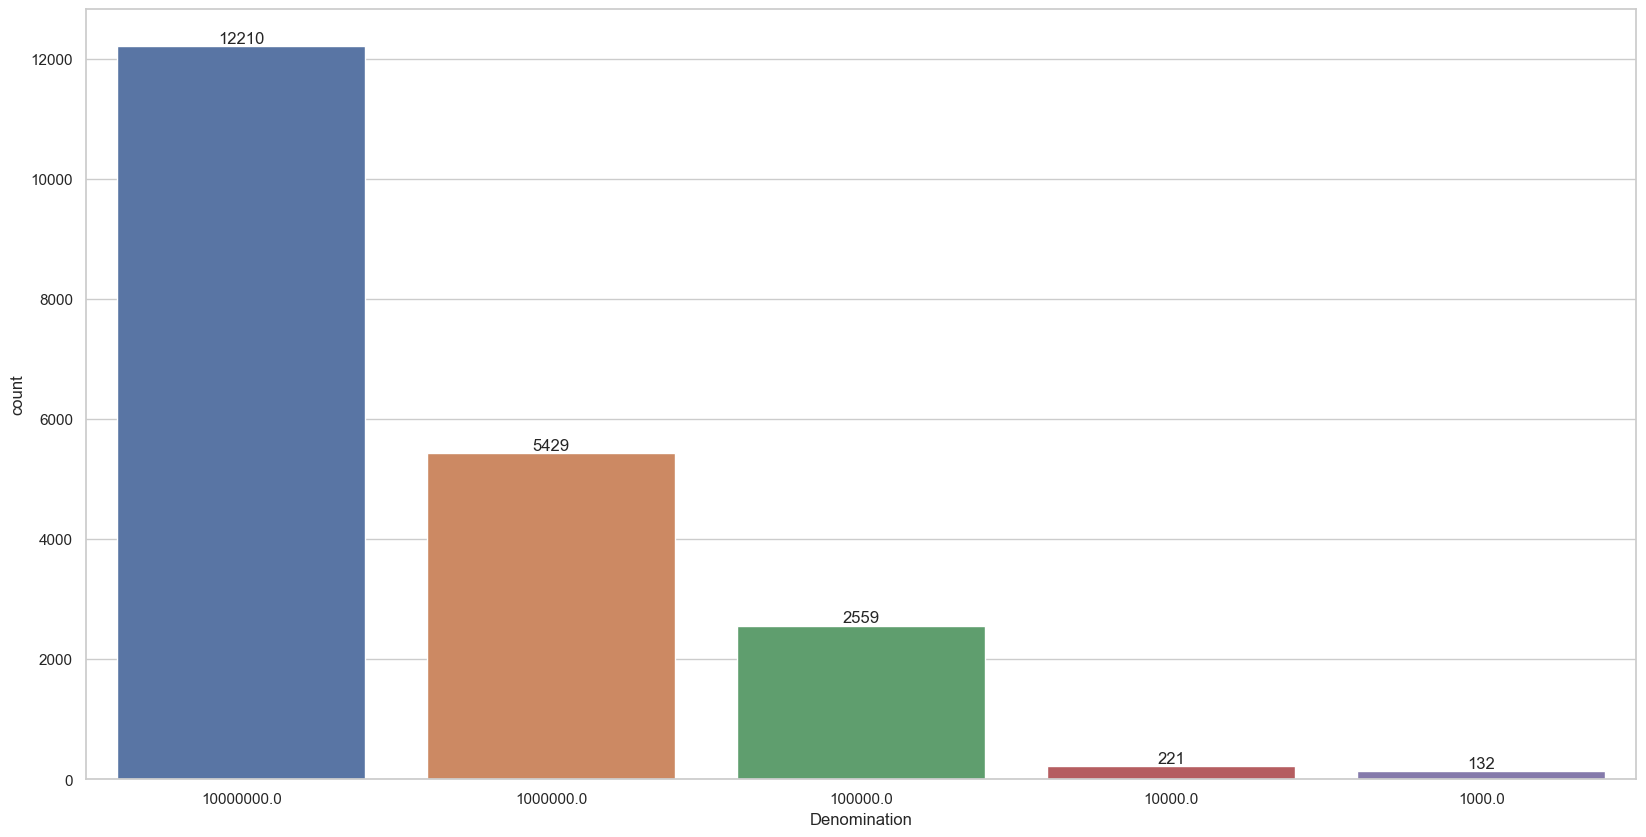

In [110]:
# Set the figure size
plt.figure(figsize=(20, 10))
# Calculate value counts of 'Denomination' and sort by descending order of counts
denomination_counts = alldata_df['Denomination'].value_counts().sort_values(ascending=False)
# Create the count plot with specified order and add count labels
ax = sns.countplot(data=alldata_df, x='Denomination', order=denomination_counts.index)
ax.bar_label(ax.containers[0])  # Add count labels to the bars
# Show the plot
plt.show()

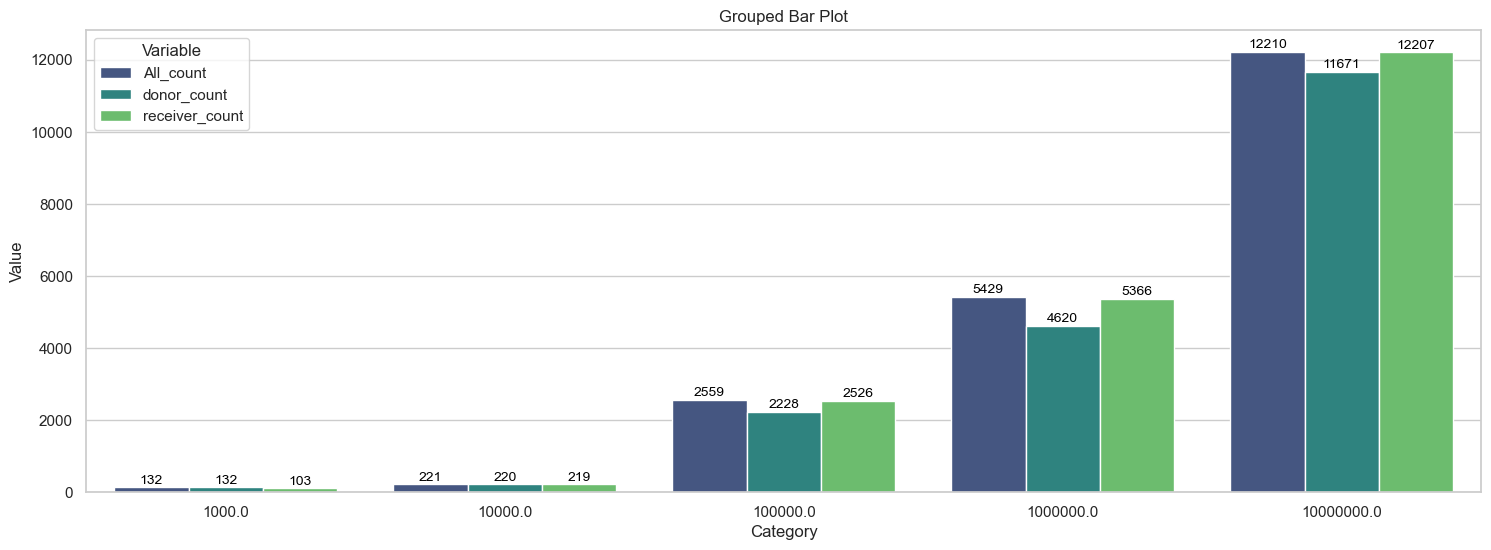

In [111]:
# Plotting
plt.figure(figsize=(18, 6))  # Set the figure size

# Melt the DataFrame to convert it to the long format
append_denominations_count_melted = append_denominations_count.reset_index().melt(id_vars='Denomination', 
                                                                                  var_name='Variable', 
                                                                                  value_name='Value')

# Create the grouped bar plot using Seaborn
ax = sns.barplot(x='Denomination', y='Value', hue='Variable', data=append_denominations_count_melted, palette='viridis')

# Adding numerical labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Adding title and labels
plt.title('Grouped Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')

# Show plot
plt.show()

In [112]:
append_denominations_count = append_denominations_count.reset_index()
append_denominations_count

Denomination  All_count  donor_count  receiver_count
0    10000000.0      12210        11671           12207
1     1000000.0       5429         4620            5366
2      100000.0       2559         2228            2526
3       10000.0        221          220             219
4        1000.0        132          132             103

In [113]:
append_denominations_count.columns

Index(['Denomination', 'All_count', 'donor_count', 'receiver_count'], dtype='object')

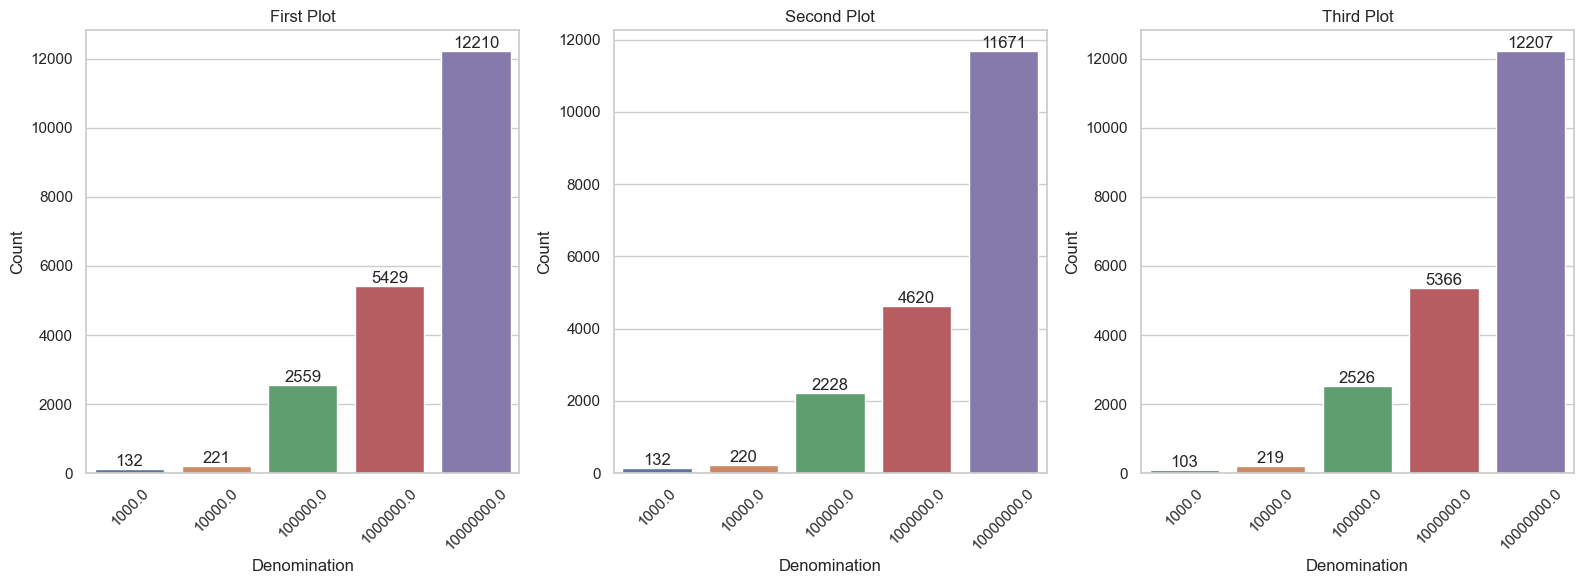

In [114]:
# Set the figure size (larger figure)
plt.figure(figsize=(16, 6))

# Plot the first count plot (leftmost)
plt.subplot(1, 3, 1)
sns.barplot(data=append_denominations_count, x='Denomination', y='All_count')
plt.title('First Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot the second count plot (middle)
plt.subplot(1, 3, 2)
sns.barplot(data=append_denominations_count, x='Denomination', y='donor_count')
plt.title('Second Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot the third count plot (rightmost)
plt.subplot(1, 3, 3)
sns.barplot(data=append_denominations_count, x='Denomination', y='receiver_count')
plt.title('Third Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Bond Prefix Count Distribution 

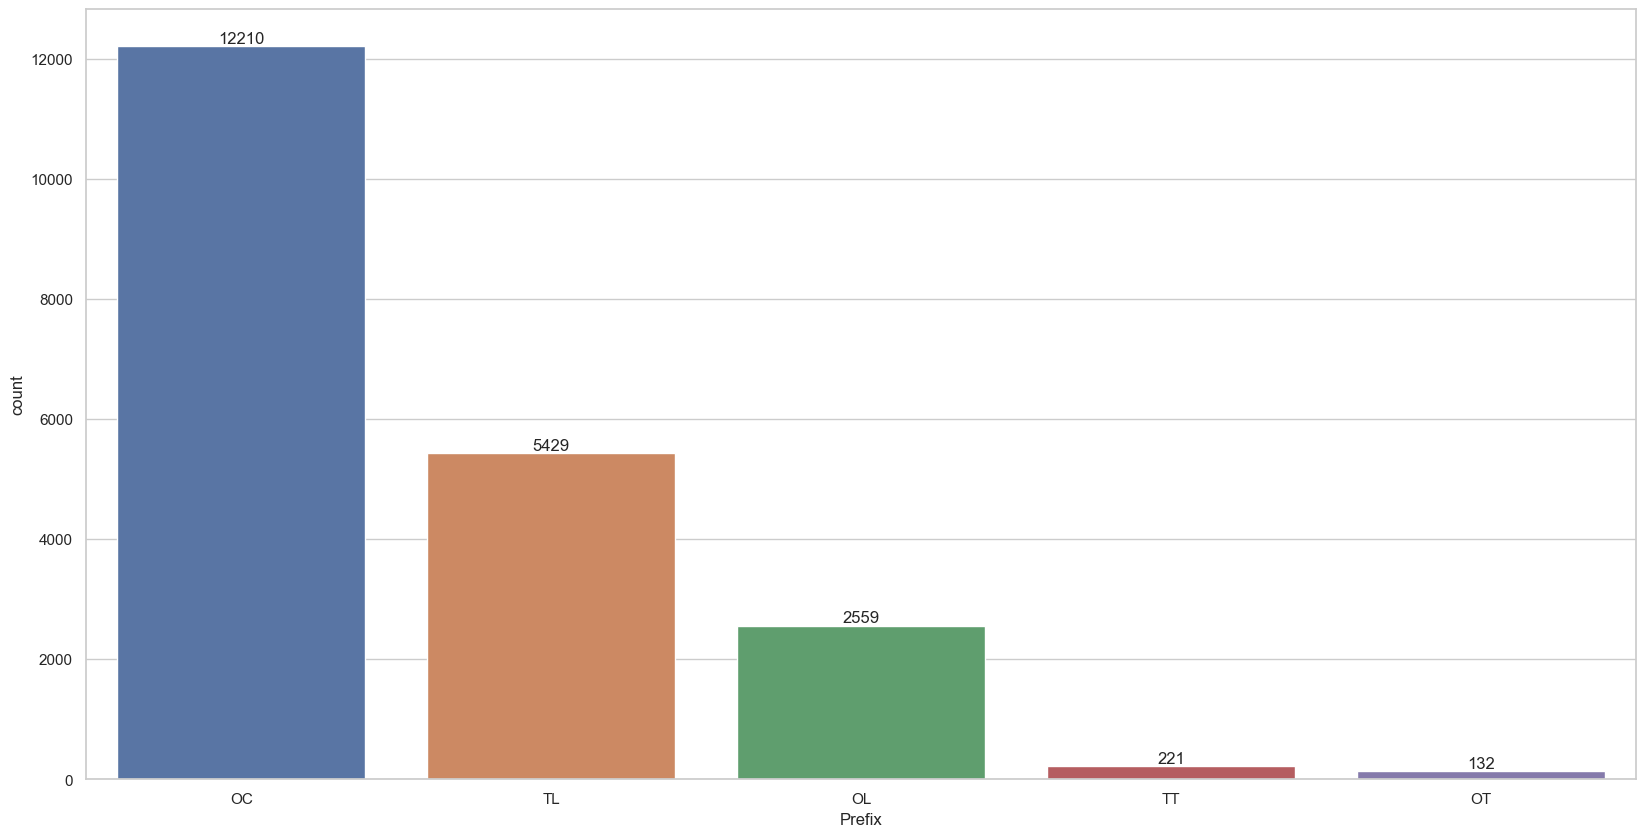

In [115]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot for 'Prefix'
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'Prefix' and sort by descending order of counts
prefix_counts = alldata_df['Prefix'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=alldata_df, x='Prefix', order=prefix_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

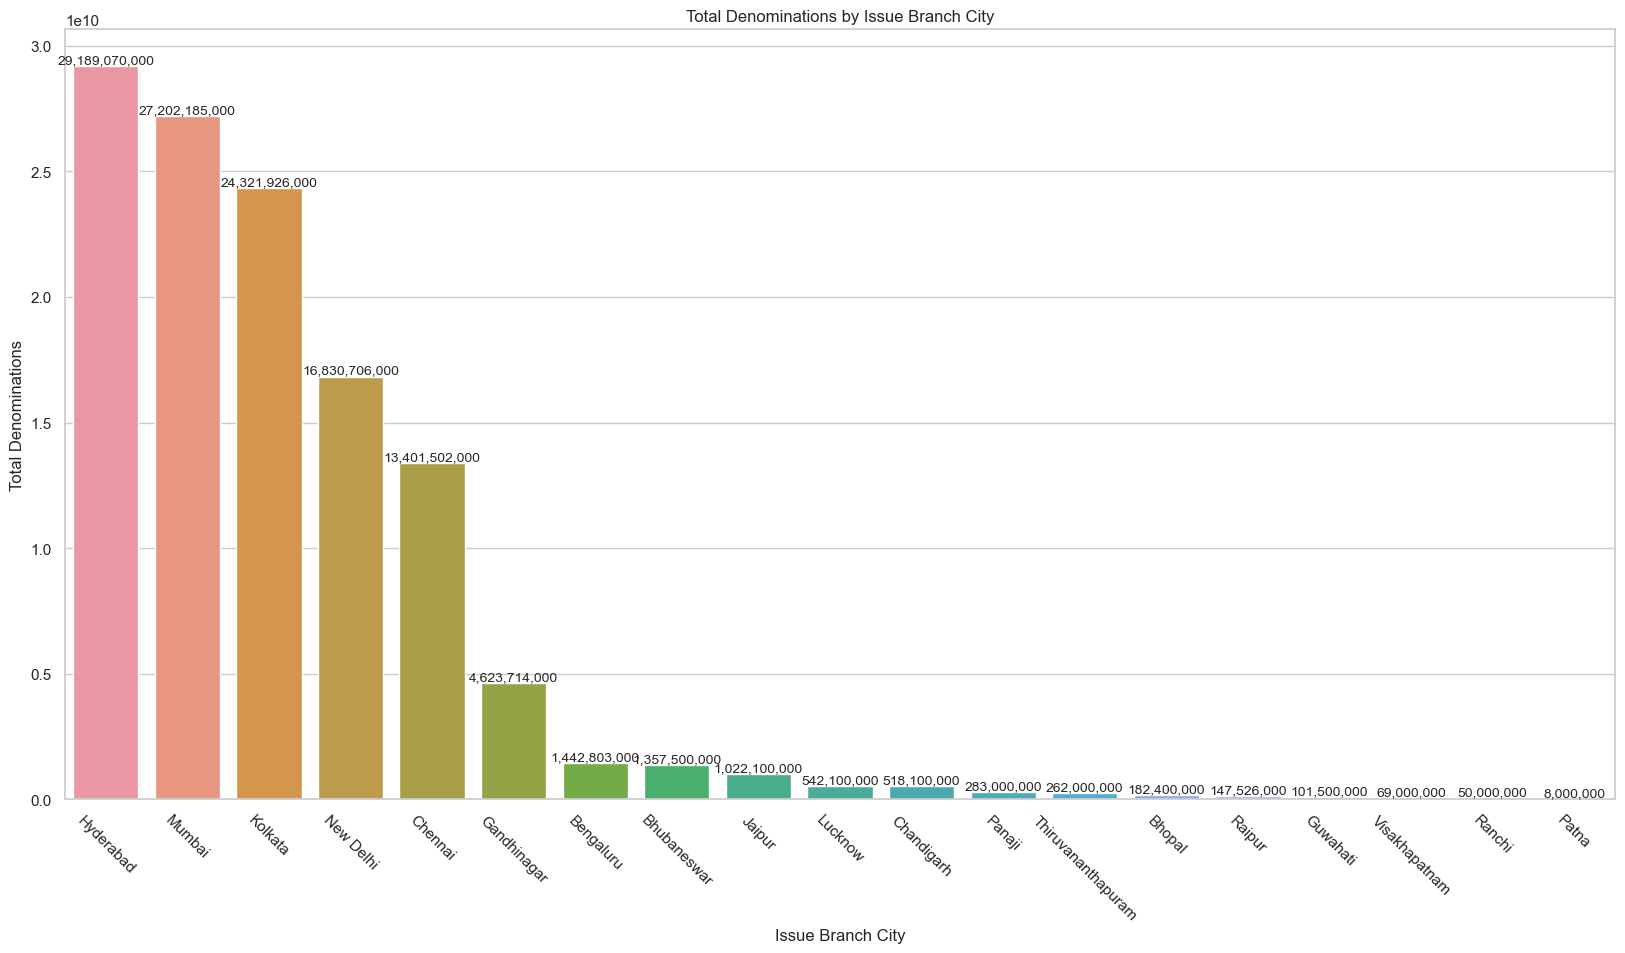

In [116]:
# Aggregate sum of 'Denomination' by 'IssueBranchCity'
city_sum_denominations = alldata_df.groupby('IssueBranchCity')['Denomination'].sum()

# Sort the aggregated sums in descending order
city_sum_denominations = city_sum_denominations.sort_values(ascending=False)

# Create a count plot based on the aggregated sums
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.barplot(x=city_sum_denominations.index, y=city_sum_denominations.values, order=city_sum_denominations.index)

# Add count labels (sums of denominations) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.xlabel('Issue Branch City')
plt.ylabel('Total Denominations')
plt.title('Total Denominations by Issue Branch City')
plt.show()

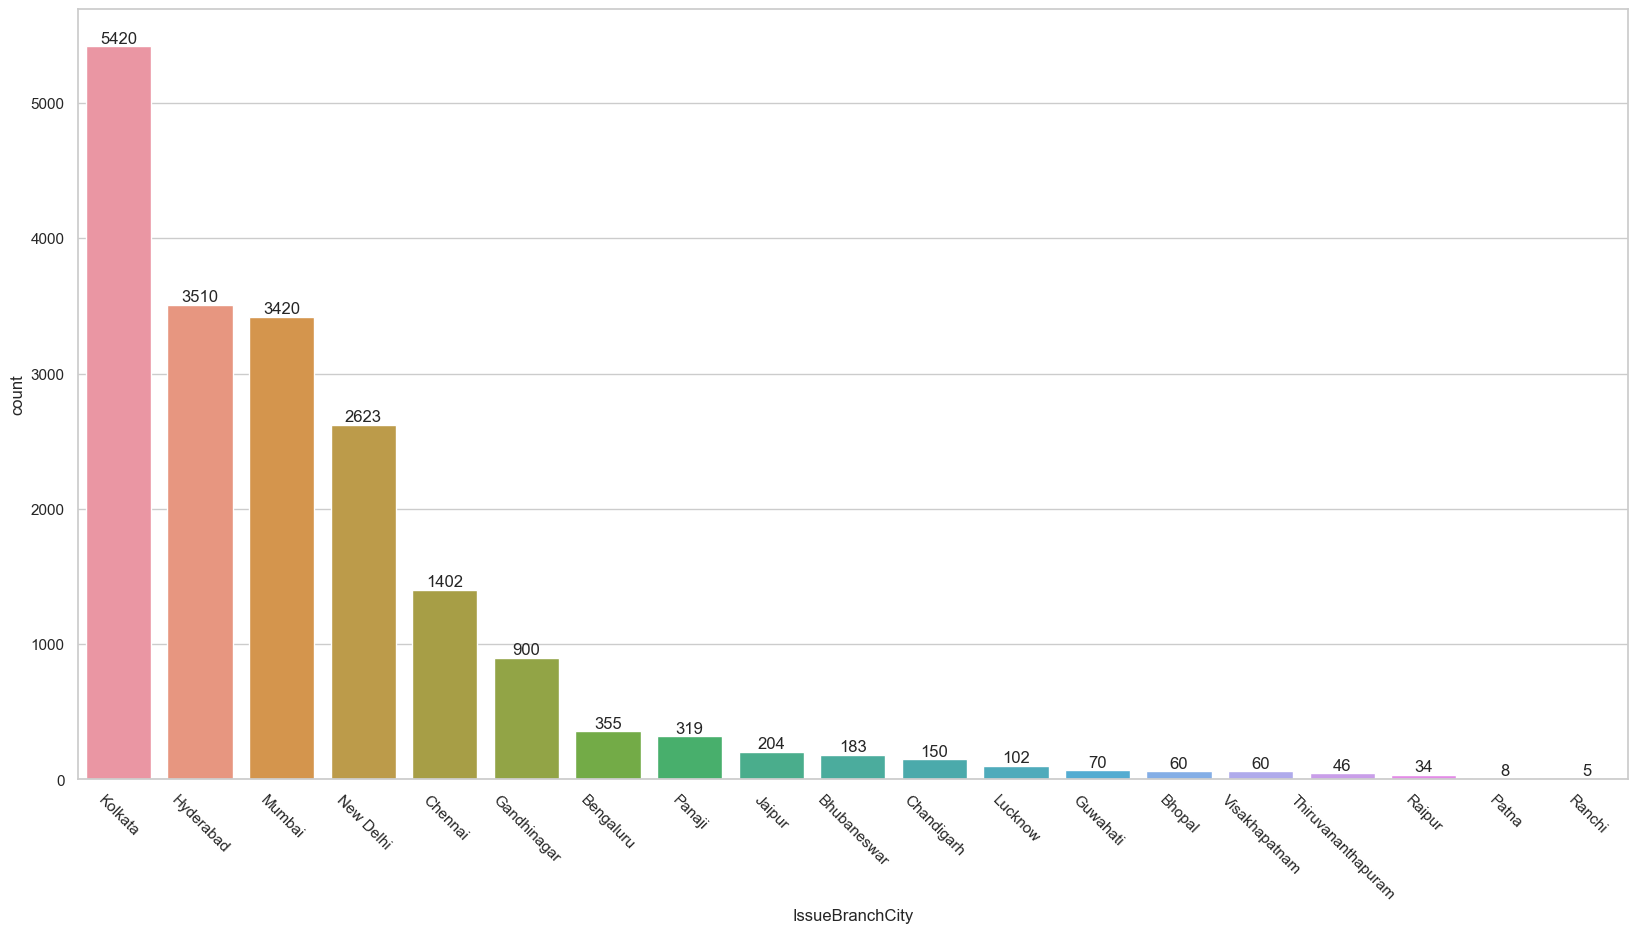

In [117]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'IssueBranchCity' and sort by descending order of counts
city_counts = alldata_df['IssueBranchCity'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=alldata_df, x='IssueBranchCity', order=city_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
# Show the plot
plt.show()

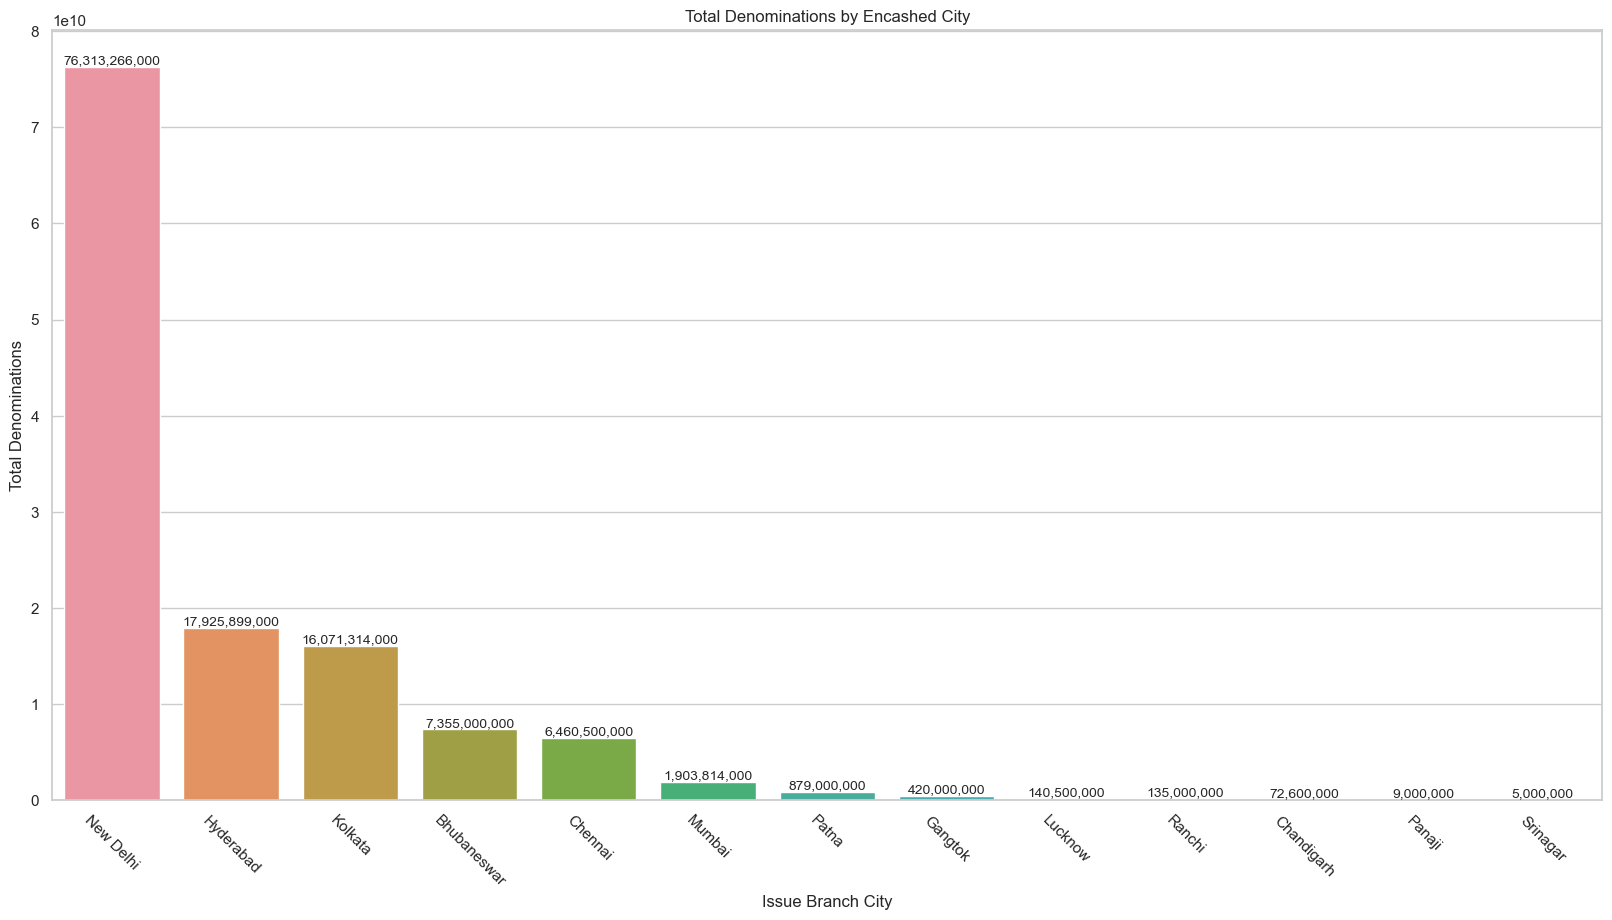

In [118]:
# Aggregate sum of 'Denomination' by 'IssueBranchCity'
city_sum_denominations = alldata_df.groupby('EncashedCity')['Denomination'].sum()

# Sort the aggregated sums in descending order
city_sum_denominations = city_sum_denominations.sort_values(ascending=False)

# Create a count plot based on the aggregated sums
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.barplot(x=city_sum_denominations.index, y=city_sum_denominations.values, order=city_sum_denominations.index)

# Add count labels (sums of denominations) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.xlabel('Issue Branch City')
plt.ylabel('Total Denominations')
plt.title('Total Denominations by Encashed City')
plt.show()

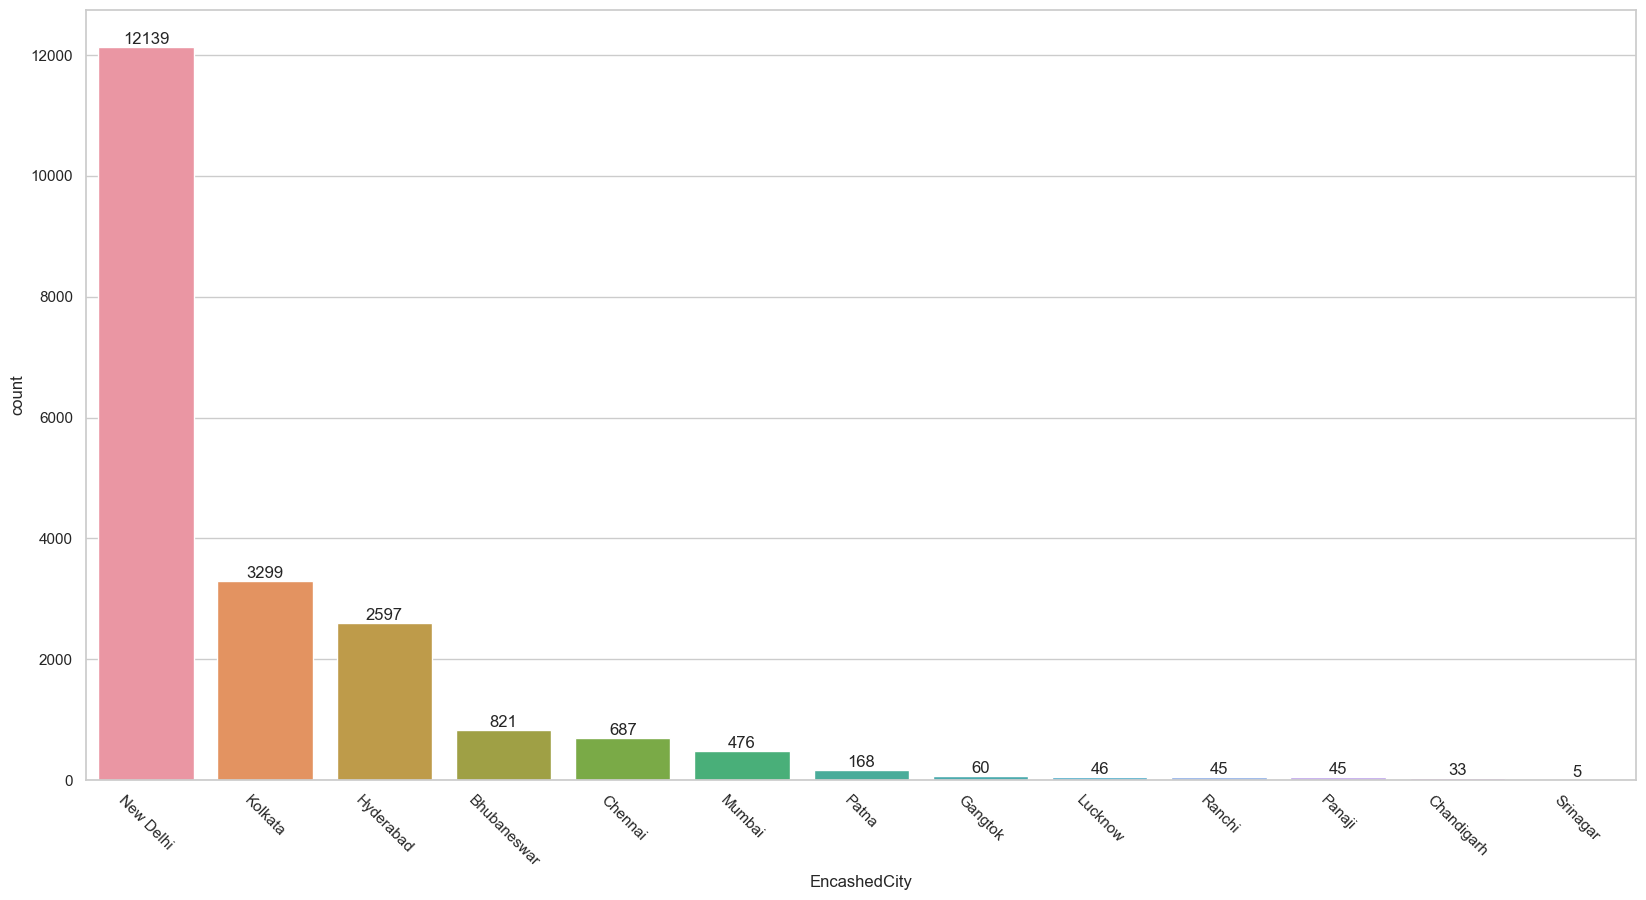

In [119]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'IssueBranchCity' and sort by descending order of counts
city_counts = alldata_df['EncashedCity'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=alldata_df, x='EncashedCity', order=city_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
# Show the plot
plt.show()

## Wordcloud 

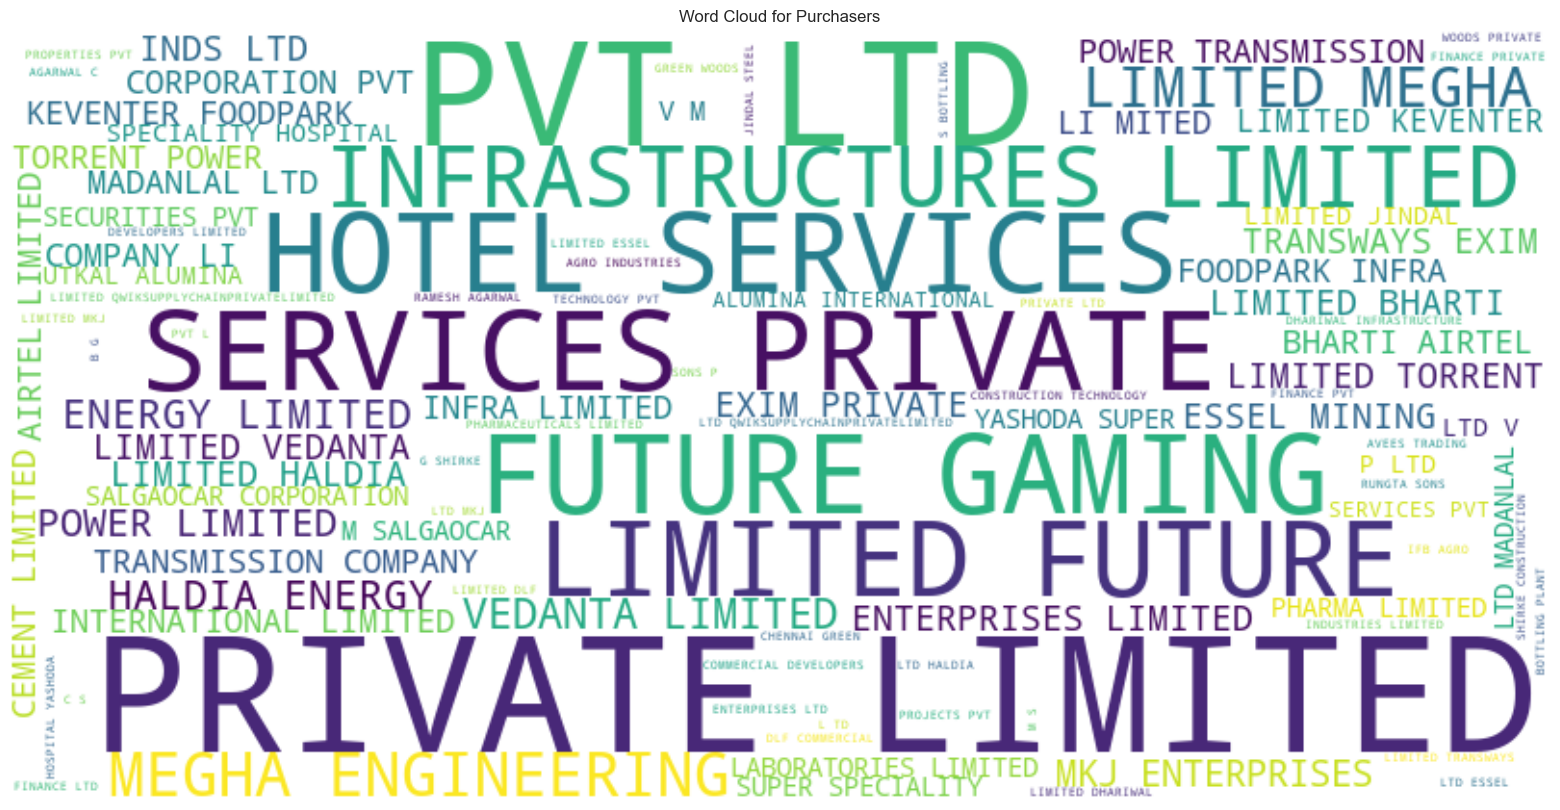

In [120]:
# Extract text data from the 'Purchaser' column and join into a single string
text_data = ' '.join(alldata_df['Purchaser'].dropna())  # Join non-null values
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Purchasers')
plt.show()

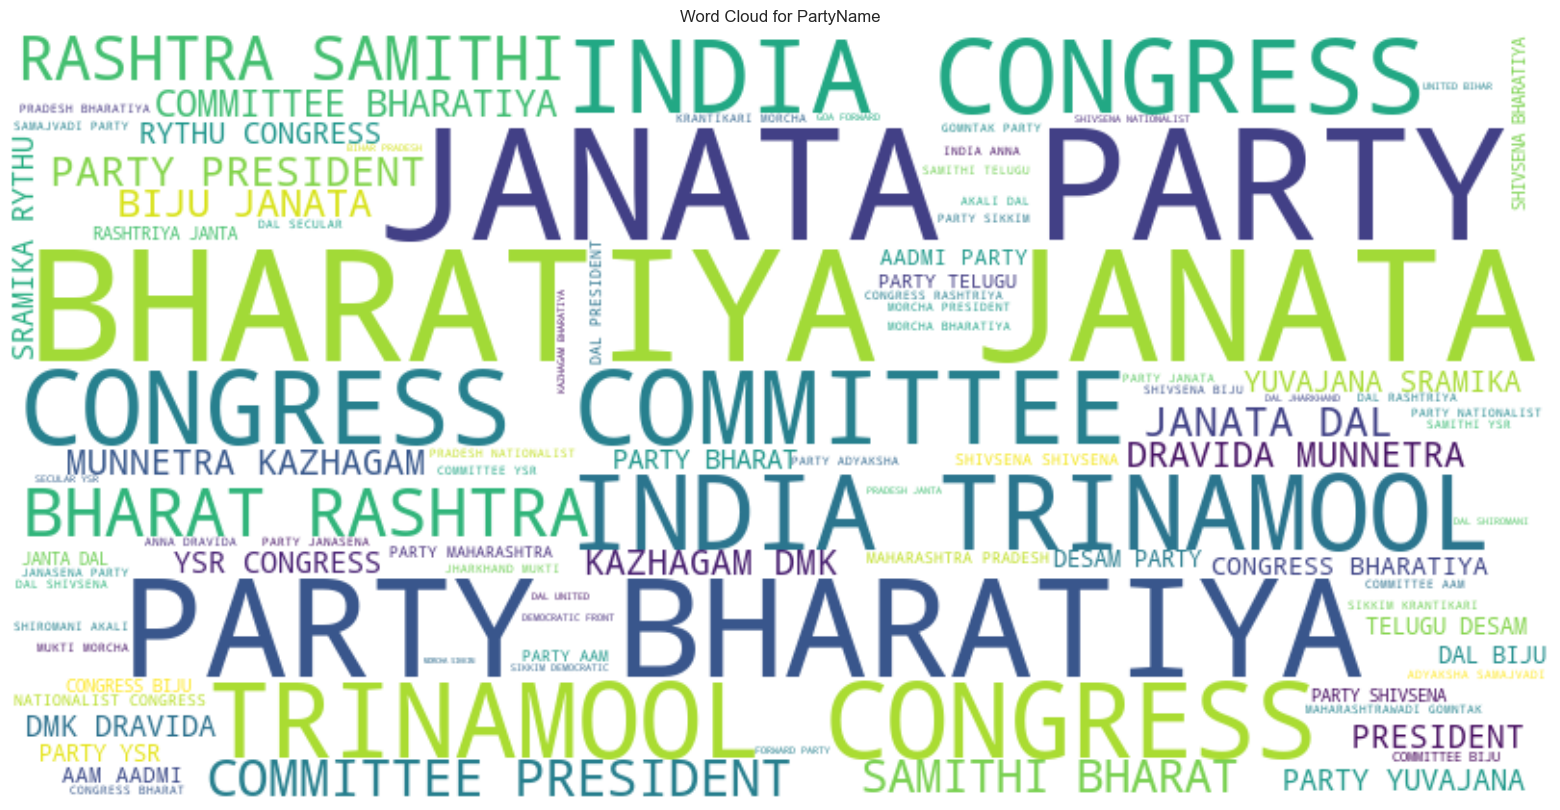

In [121]:
# Extract text data from the 'Purchaser' column and join into a single string
text_data = ' '.join(alldata_df['PartyName'].dropna())  # Join non-null values
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for PartyName')
plt.show()


## Date Analysis

In [122]:
donor_dates = donors_df[['Unique_key','JournalDate','PurchaseDate','ExpiryDate']]
donor_dates.head()

Unique_key JournalDate PurchaseDate ExpiryDate
0    TL11448  2019-04-12   2019-04-12 2019-04-26
1    TL11447  2019-04-12   2019-04-12 2019-04-26
2    TL11441  2019-04-12   2019-04-12 2019-04-26
3     OL1113  2019-04-12   2019-04-12 2019-04-26
4     OL1118  2019-04-12   2019-04-12 2019-04-26

In [123]:
donor_dates['Journal_Purchase'] =  donor_dates['PurchaseDate'] - donor_dates['JournalDate']
donor_dates['Purchase-Expiry'] = donor_dates['ExpiryDate'] - donor_dates['PurchaseDate']
donor_dates['Journal-Expiry'] = donor_dates['ExpiryDate'] - donor_dates['JournalDate'] 

In [124]:
donor_dates.columns

Index(['Unique_key', 'JournalDate', 'PurchaseDate', 'ExpiryDate',
       'Journal_Purchase', 'Purchase-Expiry', 'Journal-Expiry'],
      dtype='object')

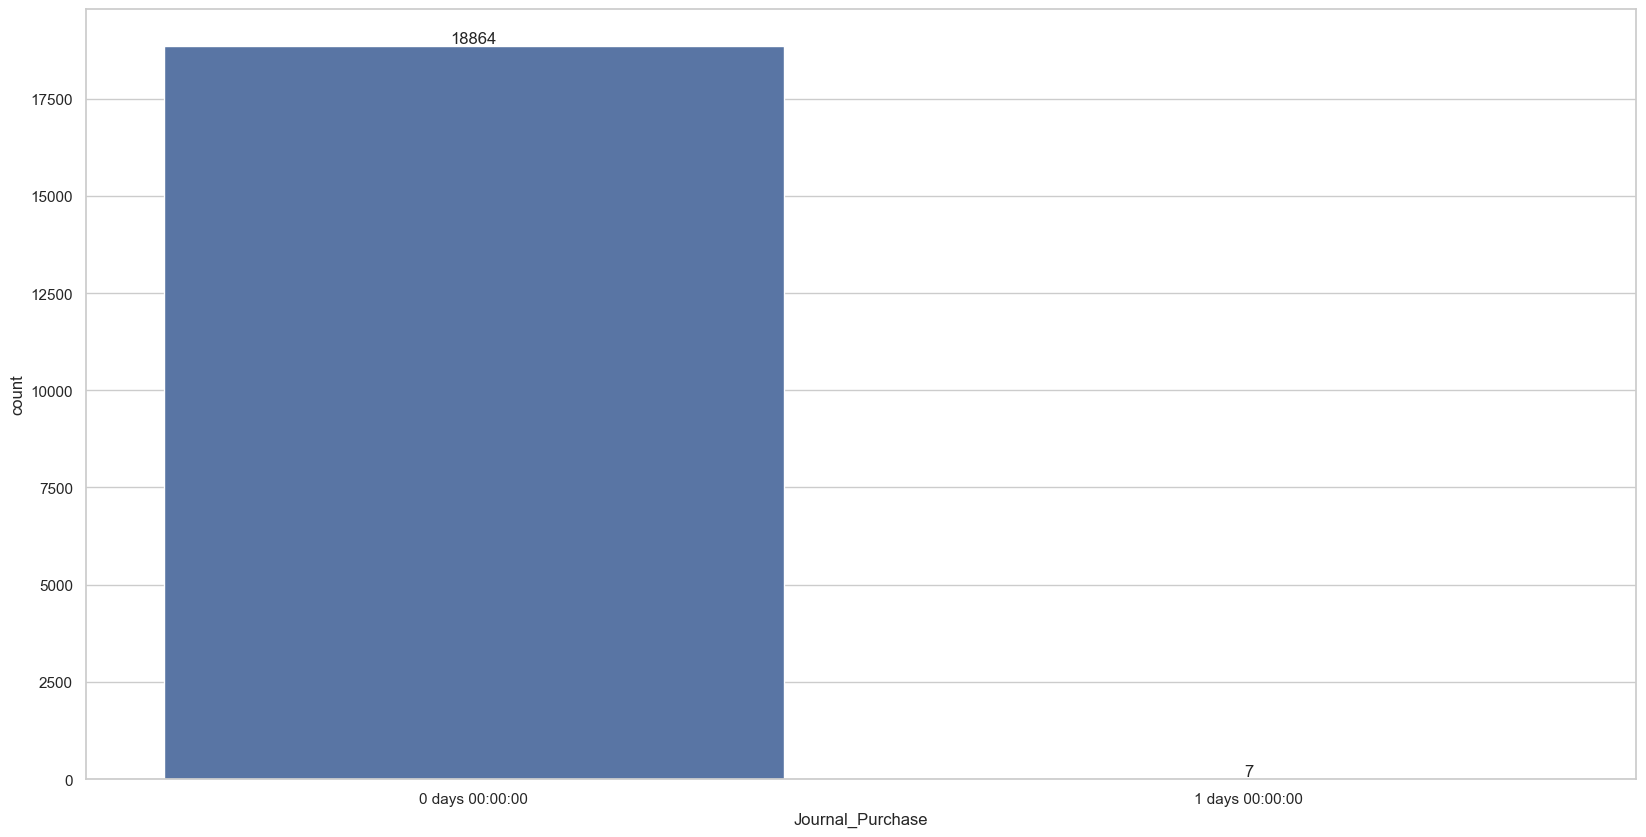

In [125]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(donor_dates,x='Journal_Purchase')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

In [126]:
Issue_delay = donors_df[donors_df['JournalDate']!= donors_df['PurchaseDate']]
Issue_delay

SNo                      Urn JournalDate PurchaseDate ExpiryDate  \
9122  9123  00847202204080000002409  2022-04-08   2022-04-09 2022-04-23   
9125  9126  00847202204080000002424  2022-04-08   2022-04-09 2022-04-23   
9128  9129  00847202204080000002417  2022-04-08   2022-04-09 2022-04-23   
9130  9131  00847202204080000002416  2022-04-08   2022-04-09 2022-04-23   
9132  9133  00847202204080000002421  2022-04-08   2022-04-09 2022-04-23   
9134  9135  00847202204080000002419  2022-04-08   2022-04-09 2022-04-23   
9136  9137  00847202204080000002413  2022-04-08   2022-04-09 2022-04-23   

                                      Purchaser Prefix  BondNumber  \
9122         GREENKO BUDHIL HYDRO POWER PVT LTD     OC       12060   
9125  GREENKO RAYALA WIND POWER PRIVATE LIMITED     OC       12059   
9128                SANOLA WIND PROJECT PVT LTD     OC       12052   
9130                        SEI DIAMOND PVT LTD     OC       12056   
9132                          SEI VENUS PVT LTD     OC       12051   
9134             SUNBORNE ENERGY ANDHRA PVT LTD     OC       12055   
9136          TANOT WIND POWER VENTURES PVT LTD     OC       12067   

      Denominations  IssueBranchCode  IssueTeller      State  Branch Code No.  \
9122       10000000              847      3898296  Telangana              847   
9125       10000000              847      3898296  Telangana              847   
9128       10000000              847      3898296  Telangana              847   
9130       10000000              847      3898296  Telangana              847   
9132       10000000              847      3898296  Telangana              847   
9134       10000000              847      3898296  Telangana              847   
9136       10000000              847      3898296  Telangana              847   

     Branch City Unique_key  
9122   Hyderabad    OC12060  
9125   Hyderabad    OC12059  
9128   Hyderabad    OC12052  
9130   Hyderabad    OC12056  
9132   Hyderabad    OC12051  
9134   Hyderabad    OC12055  
9136   Hyderabad    OC12067

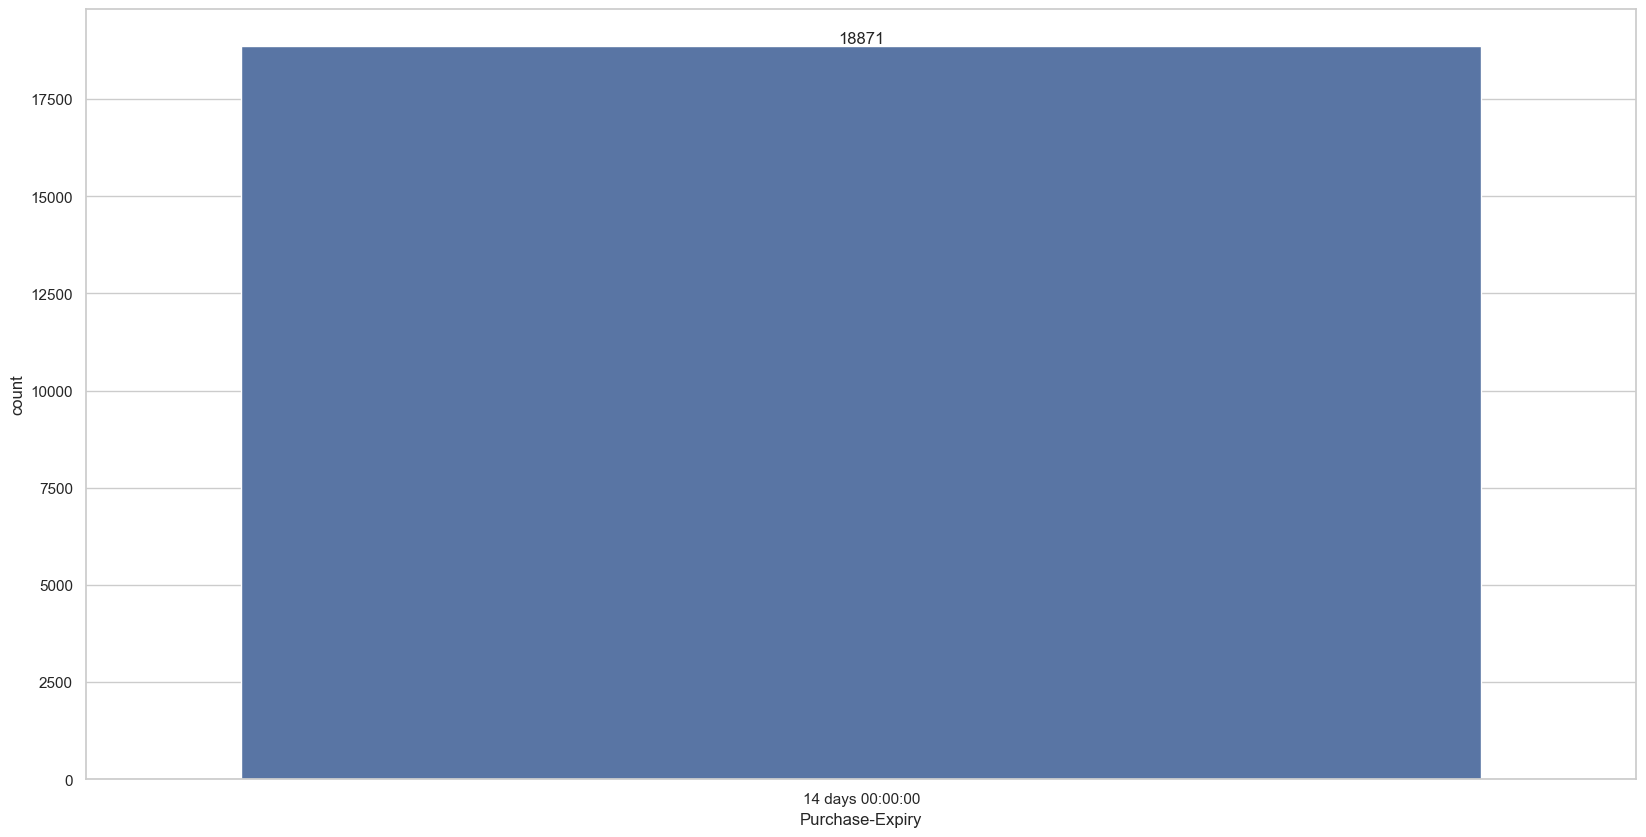

In [127]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(donor_dates,x='Purchase-Expiry')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

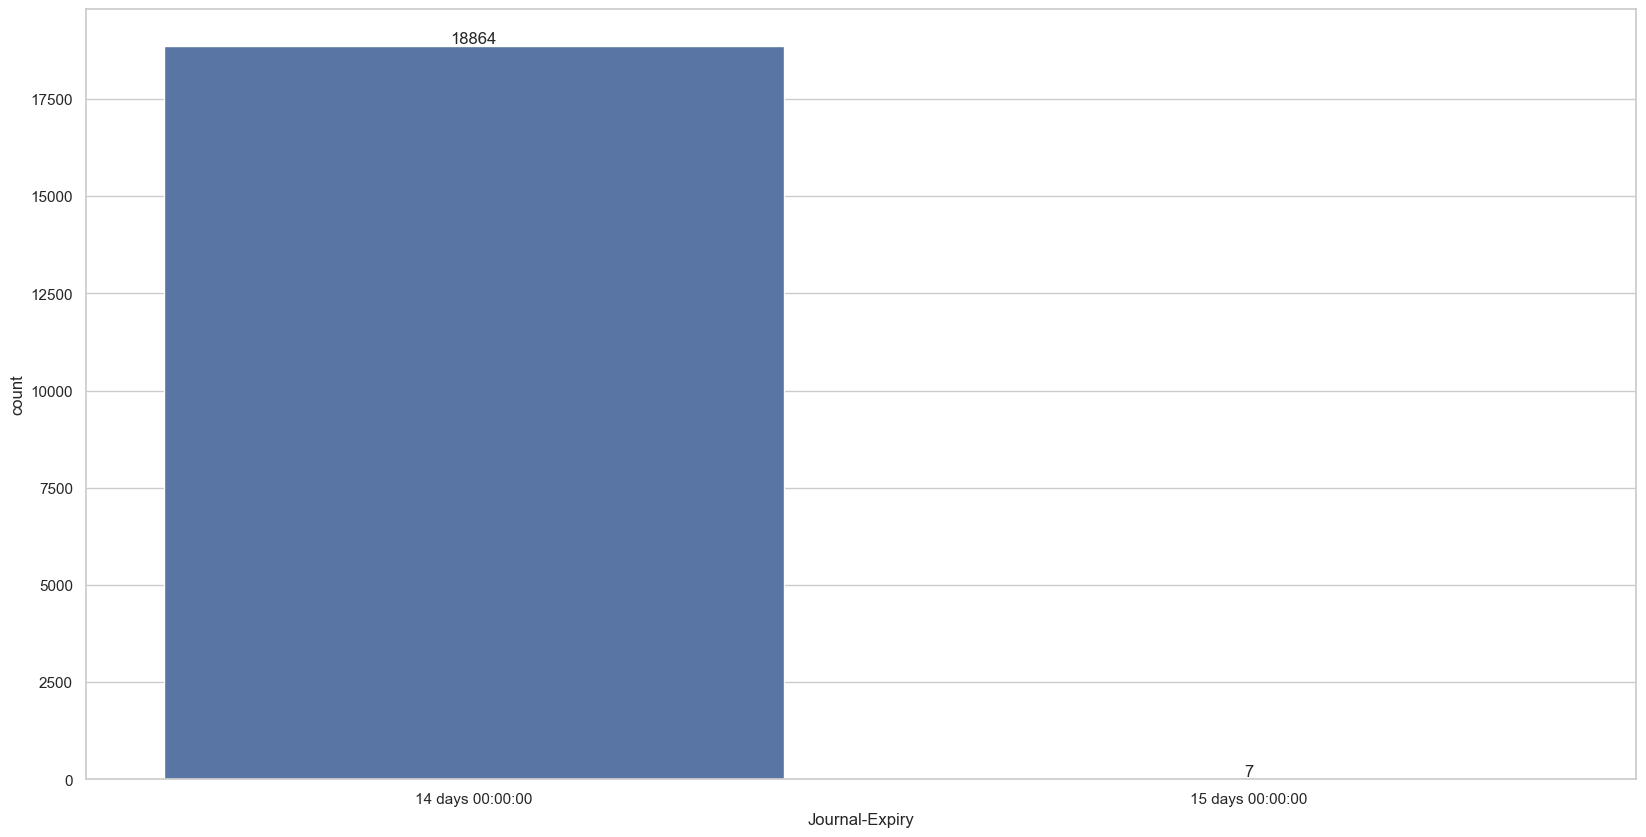

In [128]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(donor_dates,x='Journal-Expiry')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

In [129]:
perfect_data.columns 

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'DateEncashment',
       'PartyName', 'AccountNum', 'PayBranchCode', 'PayTeller',
       'EncashedState', 'EncashedBranchCode', 'EncashedCity', 'Denomination'],
      dtype='object')

In [130]:
encashed_dates = perfect_data[['Unique_key','JournalDate', 'PurchaseDate', 'ExpiryDate','DateEncashment']]
encashed_dates.head(2) 

Unique_key JournalDate PurchaseDate ExpiryDate DateEncashment
0    OC10000  2022-04-08   2022-04-08 2022-04-22     2022-04-12
1    OC10001  2021-10-07   2021-10-07 2021-10-21     2021-10-08

In [131]:
back_data = perfect_data[perfect_data['DateEncashment']>perfect_data['ExpiryDate']]
back_data

Urn JournalDate PurchaseDate ExpiryDate  \
10846  00800202107070000001869  2021-07-07   2021-07-07 2021-07-21   

                                              Purchaser Prefix  BondNumber  \
10846  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      8637.0   

       IssueBranchCode  IssueTeller                 IssueState  \
10846            800.0    7273126.0  Tamil Nadu and Puducherry   

       IssueBranchCodeNo IssueBranchCity Unique_key DateEncashment  \
10846              800.0         Chennai     OC8637     2021-07-23   

                          PartyName   AccountNum  PayBranchCode  PayTeller  \
10846  ALL INDIA TRINAMOOL CONGRESS  *******0688            1.0  3480909.0   

                          EncashedState  EncashedBranchCode EncashedCity  \
10846  West Bengal and Andaman& Nicobar                 1.0      Kolkata   

       Denomination  
10846    10000000.0

In [132]:
encashed_dates['buy-encash'] = encashed_dates['DateEncashment'] - encashed_dates['PurchaseDate']

In [133]:
encashed_dates.head(2)

Unique_key JournalDate PurchaseDate ExpiryDate DateEncashment buy-encash
0    OC10000  2022-04-08   2022-04-08 2022-04-22     2022-04-12     4 days
1    OC10001  2021-10-07   2021-10-07 2021-10-21     2021-10-08     1 days

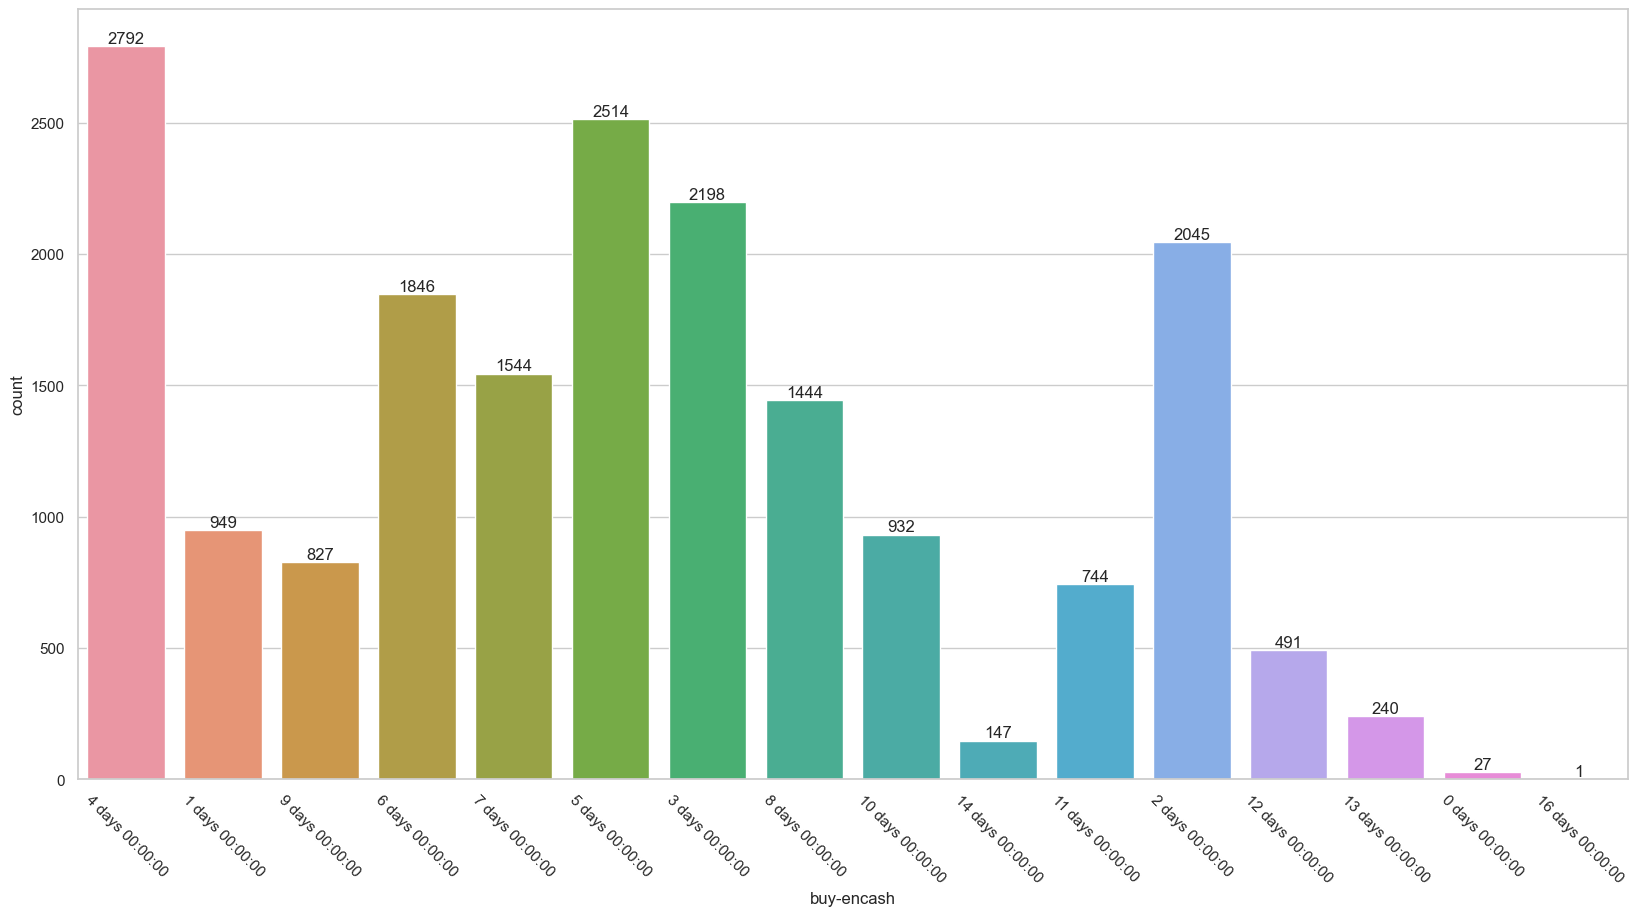

In [134]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(encashed_dates,x='buy-encash')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
# Show the plot
plt.show()

## Party and company analysis 

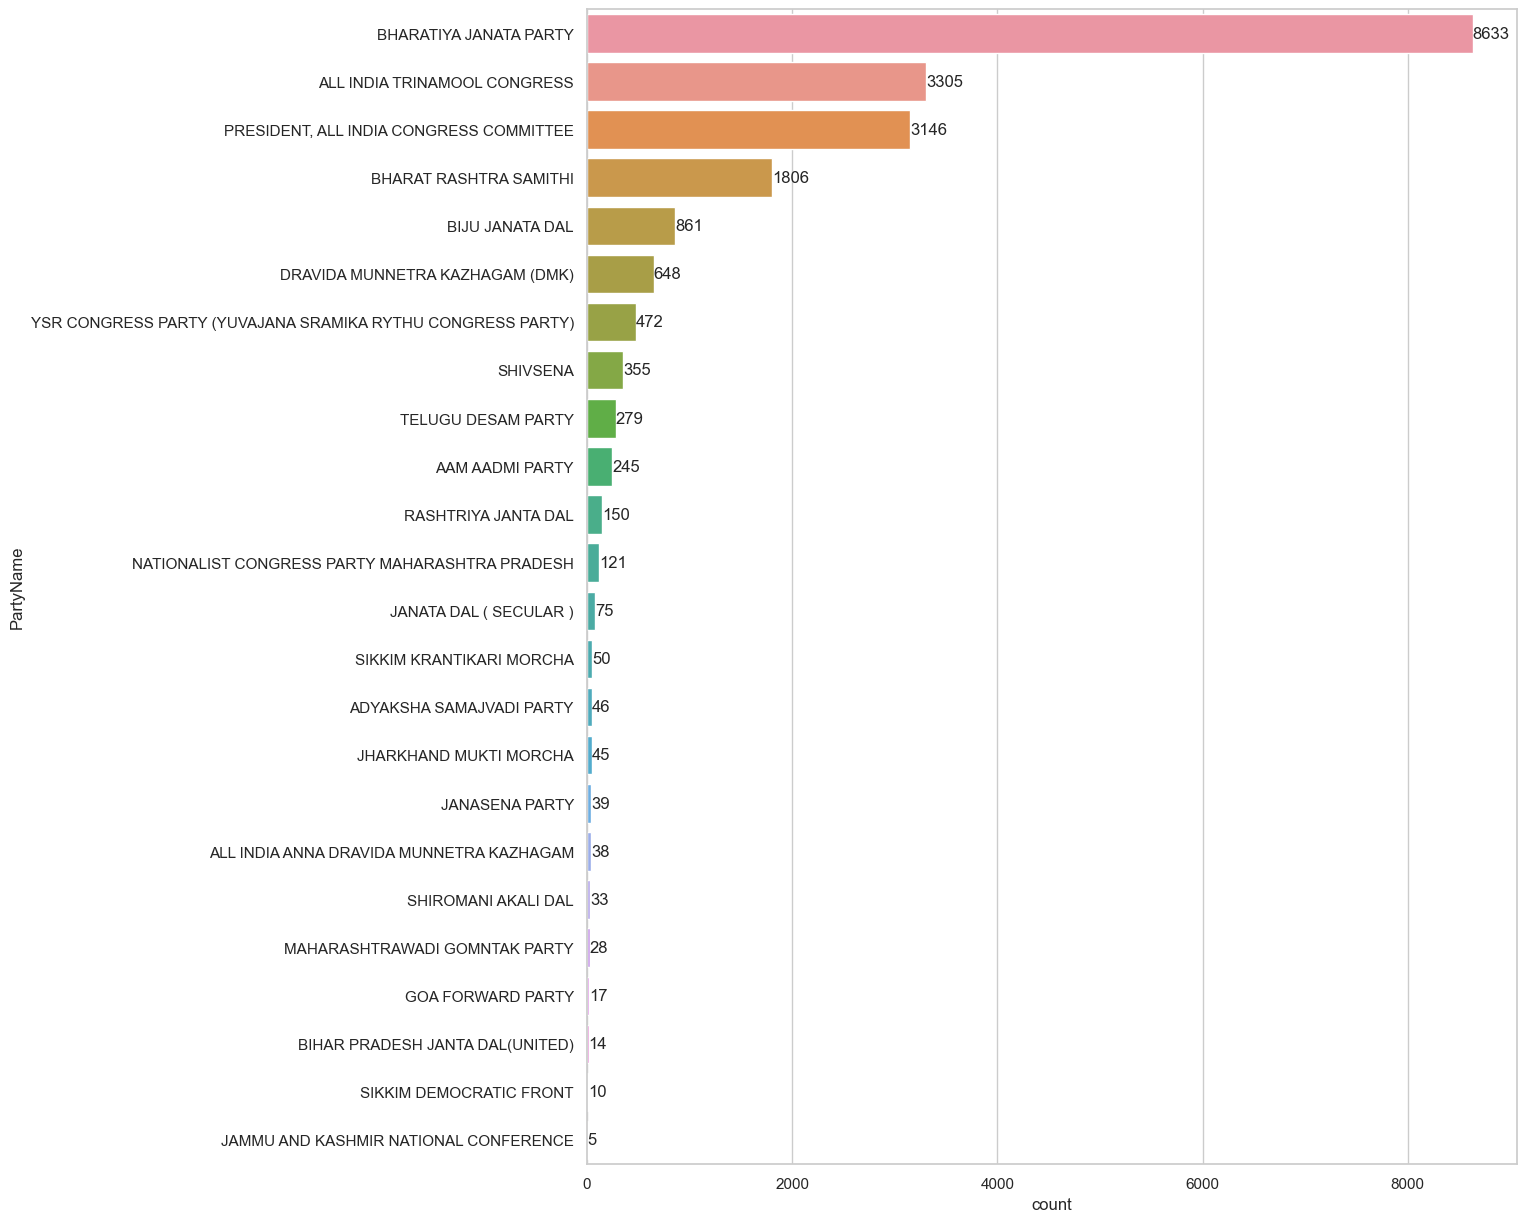

In [135]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a horizontal count plot
plt.figure(figsize=(12, 15))  # Set the figure size (width, height) in inches

# Create the horizontal count plot with y-labels on the bars
ax = sns.countplot(data=alldata_df, y='PartyName', order=alldata_df['PartyName'].value_counts().index)
ax.bar_label(ax.containers[0], fmt='%.0f')  # Display count labels on the bars

# Show the plot
plt.show()

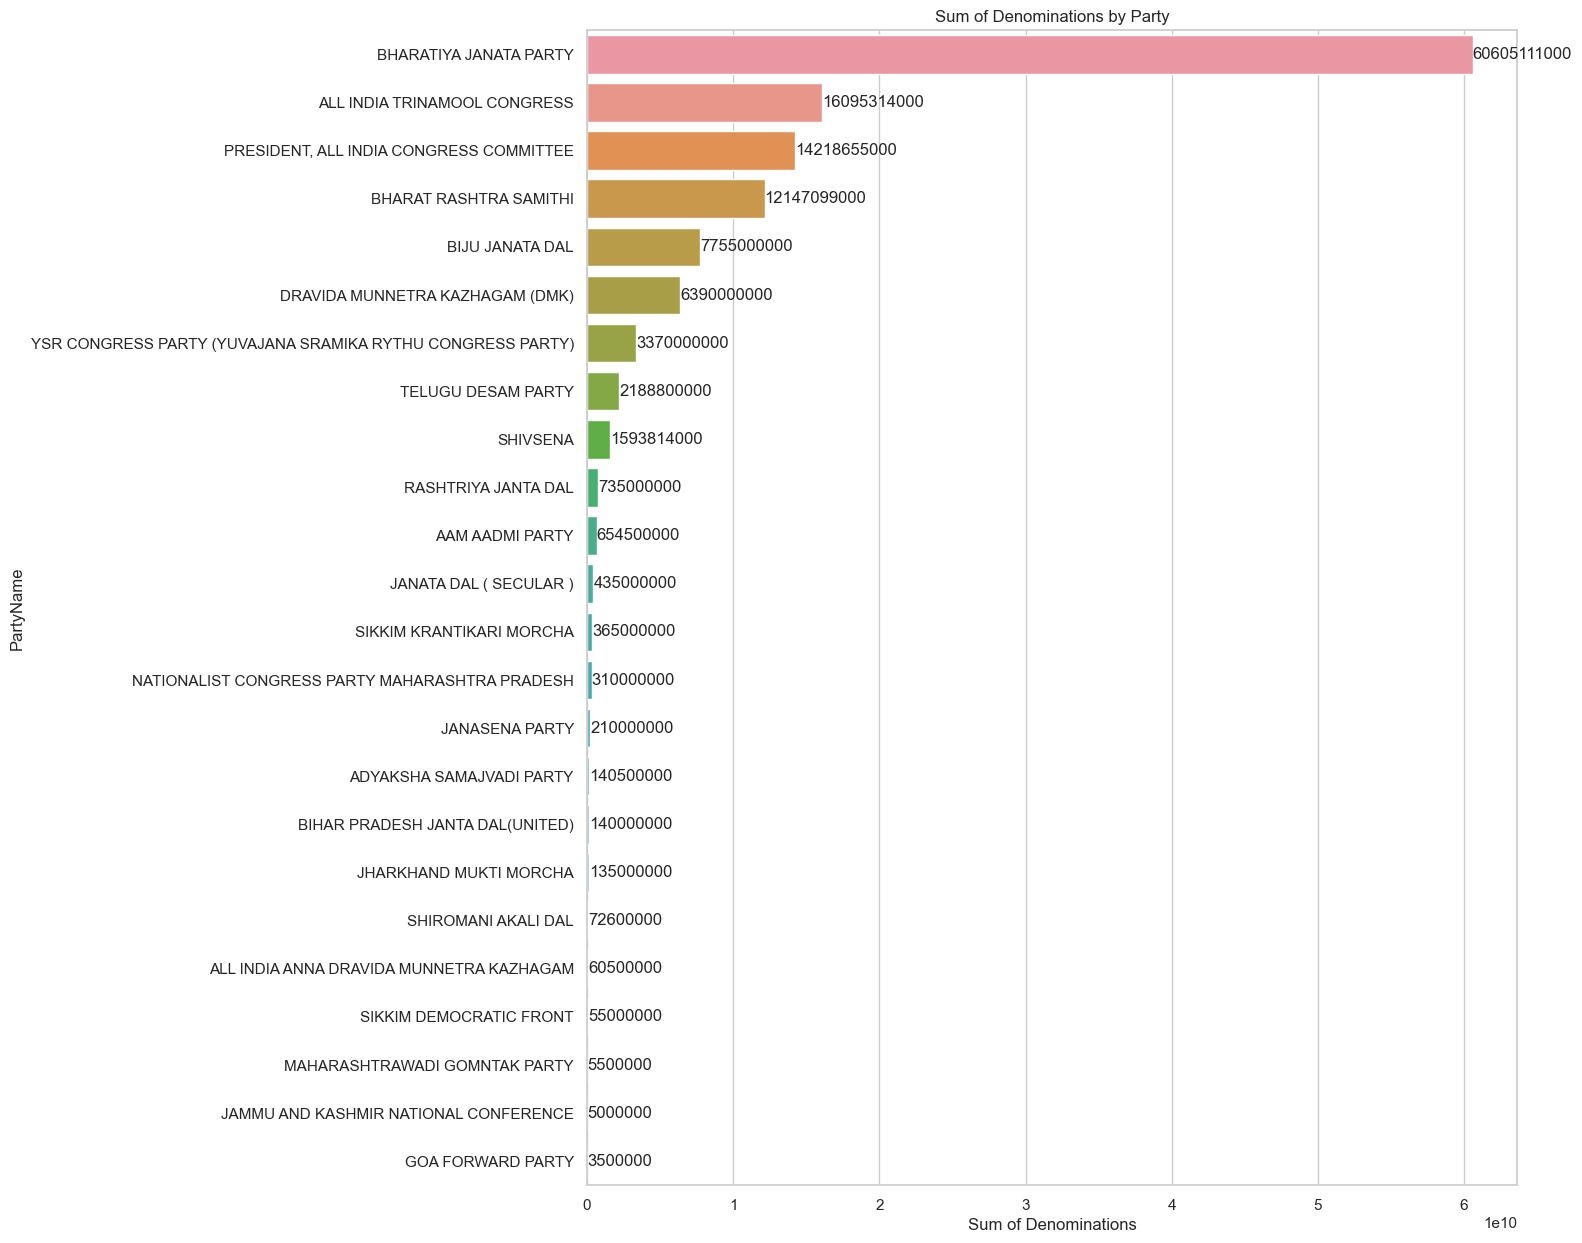

In [136]:

# Calculate the sum of 'Denominations' for each 'PartyName'
sum_denominations = receiver_df.groupby('PartyName')['Denominations'].sum().sort_values(ascending=False).reset_index()

# Plotting using Seaborn barplot
plt.figure(figsize=(12, 15))  # Set the figure size (width, height) in inches

# Create the horizontal bar plot with 'PartyName' on y-axis and summed 'Denominations' on x-axis
ax = sns.barplot(data=sum_denominations, y='PartyName', x='Denominations')

# Add count labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # Display count labels on the bars

# Set plot title and labels
plt.title('Sum of Denominations by Party')
plt.xlabel('Sum of Denominations')
plt.ylabel('PartyName')

# Show the plot
plt.show()

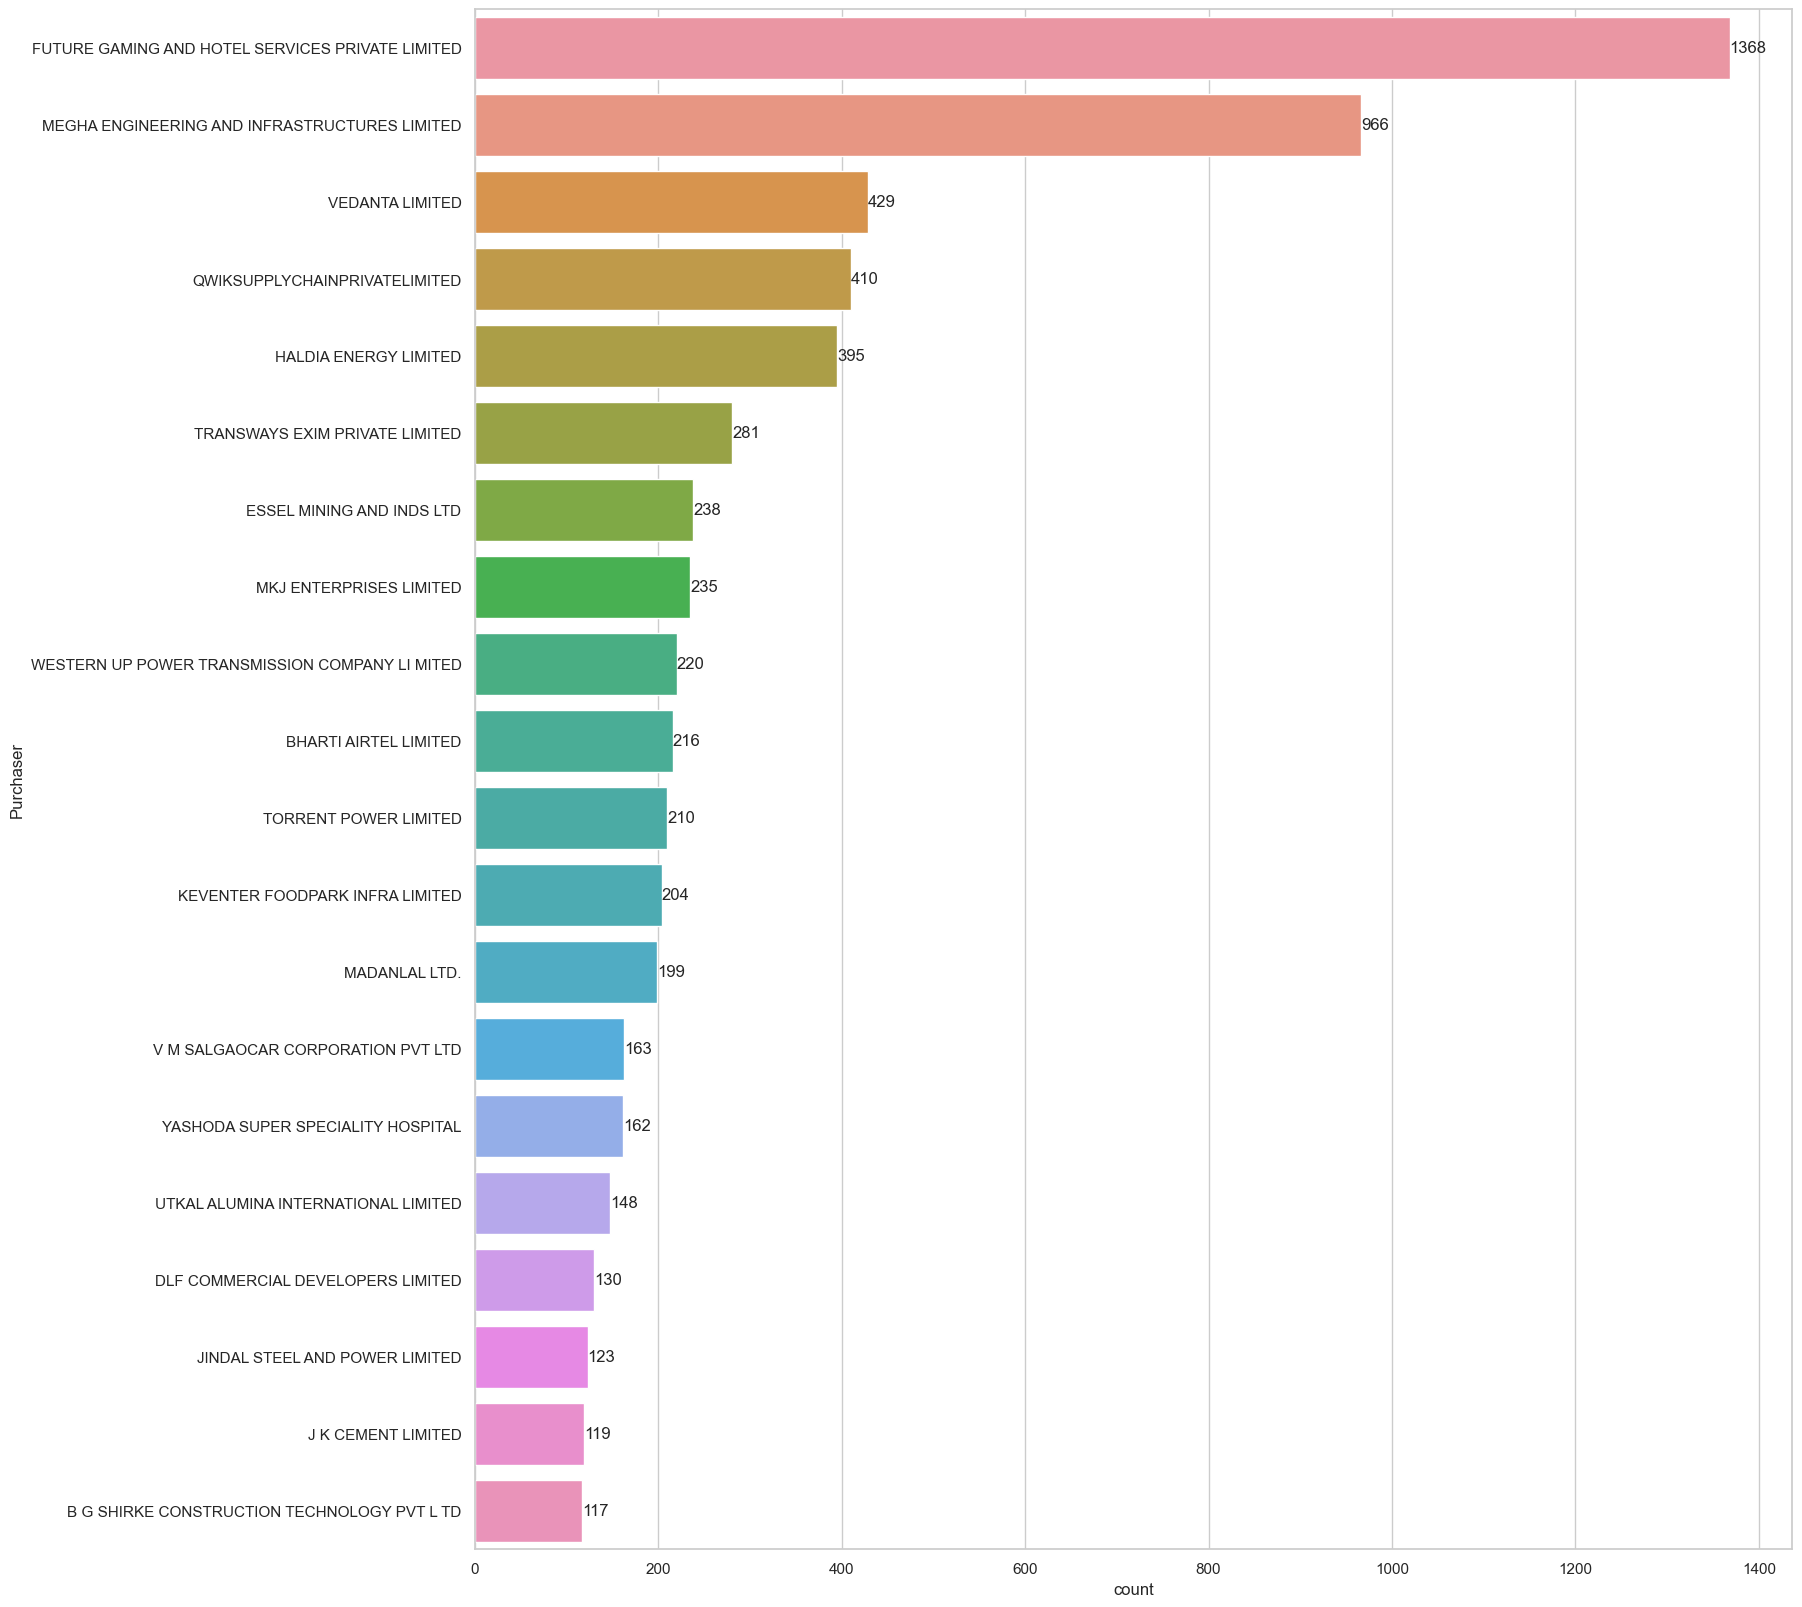

In [137]:
# Calculate the top 20 purchasers based on frequency
top_purchasers = alldata_df['Purchaser'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 purchasers
filtered_df = alldata_df[alldata_df['Purchaser'].isin(top_purchasers)]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 20))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.countplot(data=filtered_df, y='Purchaser', order=top_purchasers)  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0])  # Display count labels on the bars

# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
# Show the plot
plt.show()


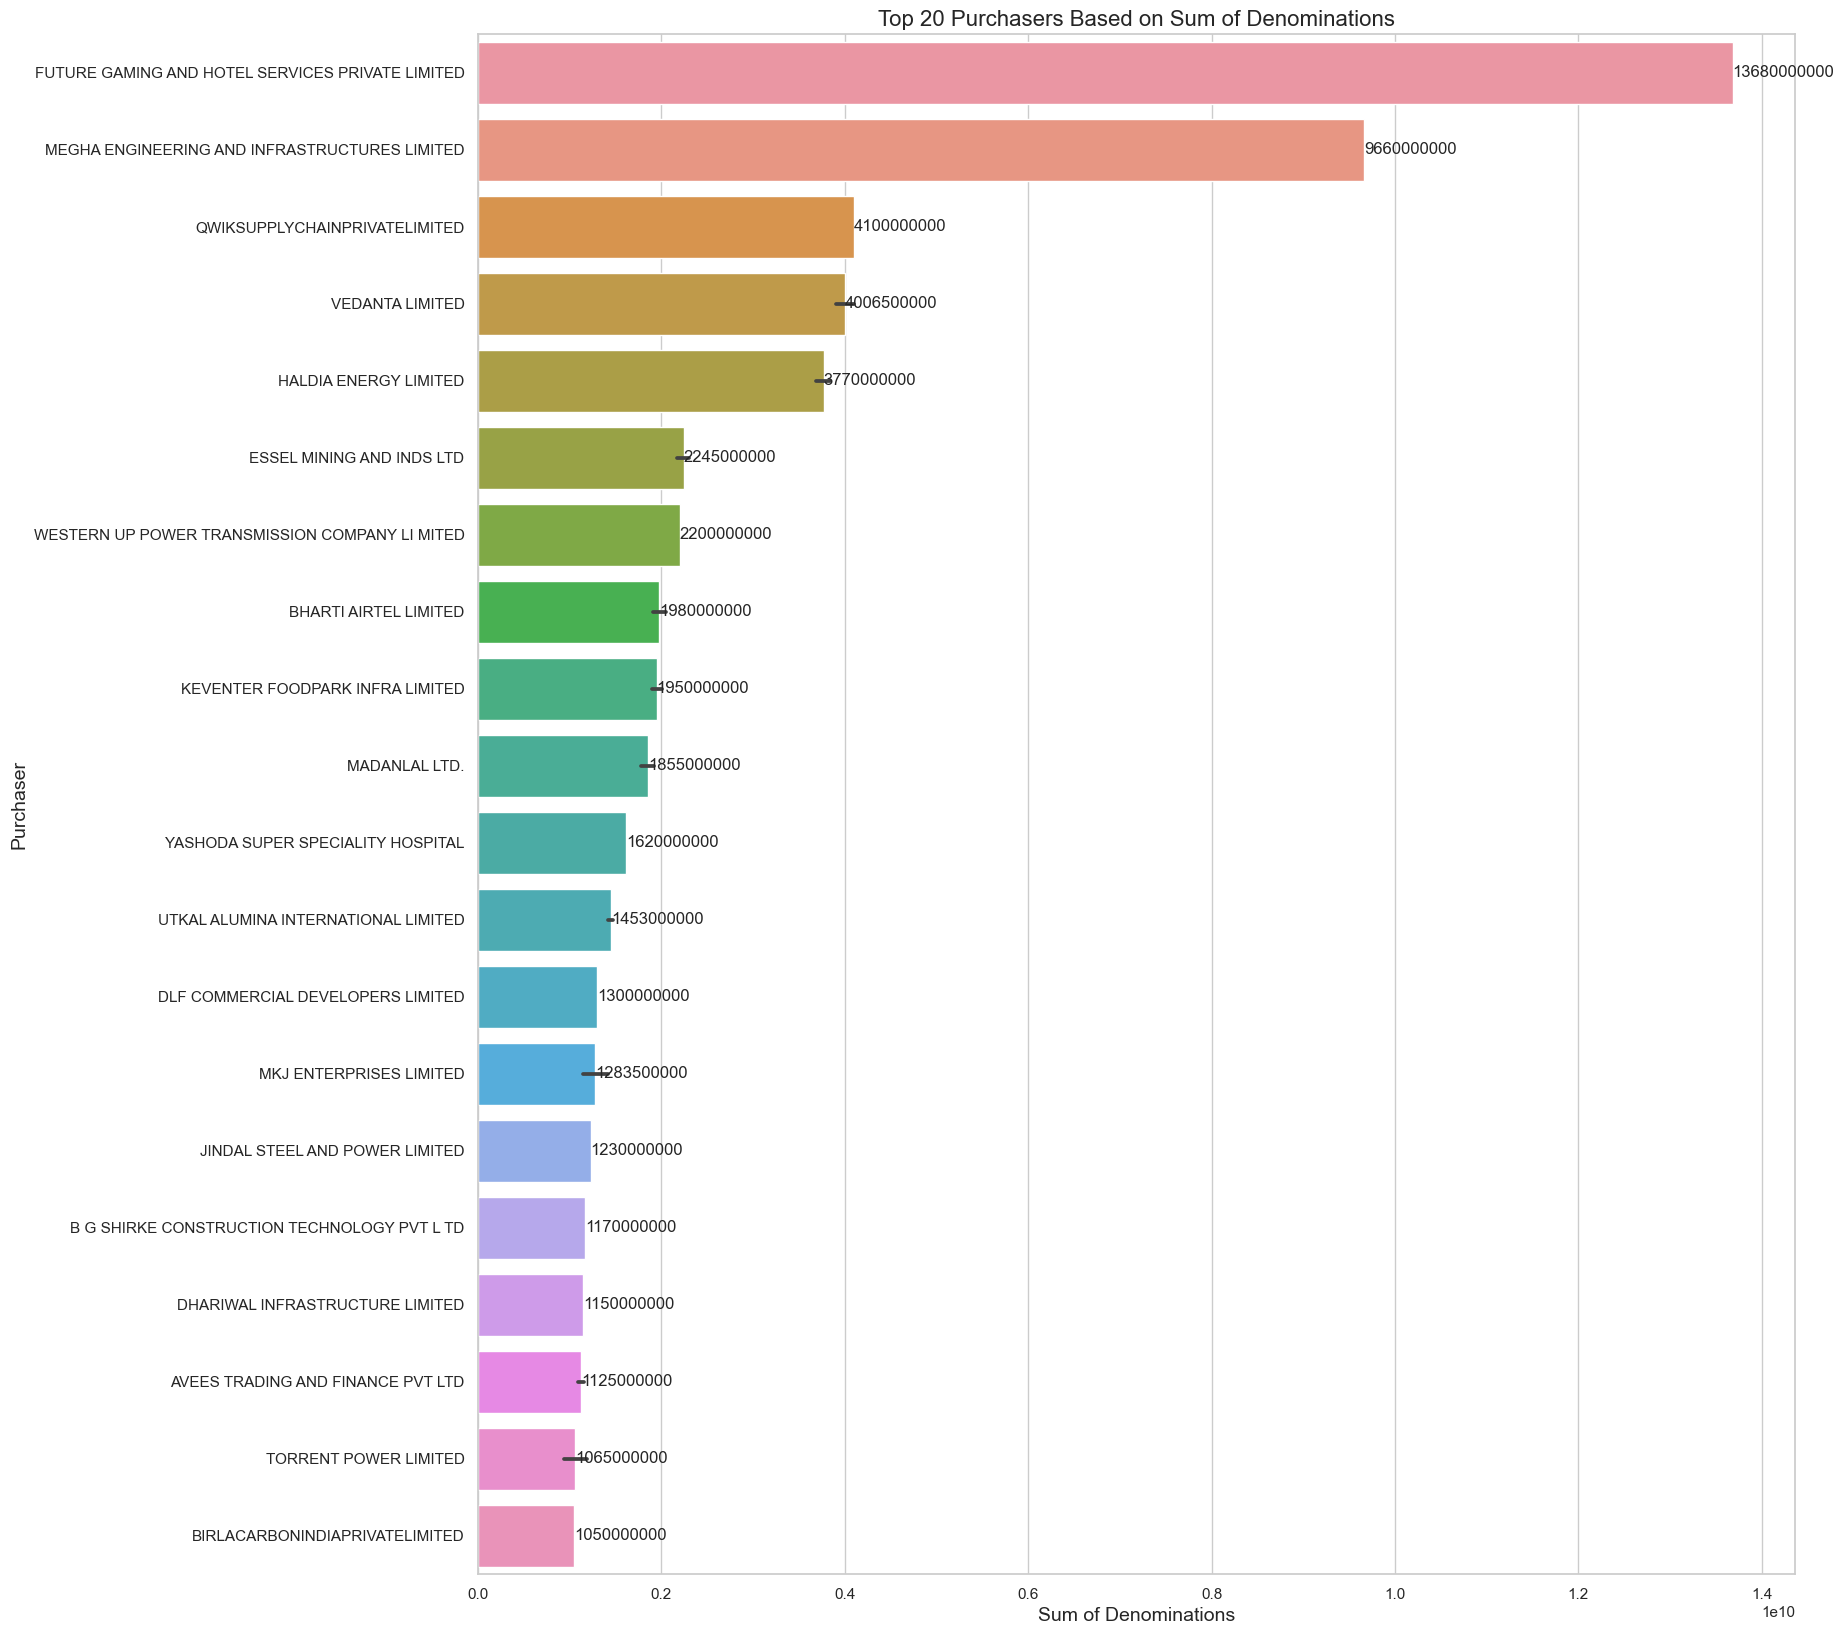

In [138]:
# Calculate the top 20 purchasers based on sum of denominations
top_purchasers = alldata_df.groupby('Purchaser')['Denomination'].sum().nlargest(20).index

# Filter the DataFrame to include only the top 20 purchasers
filtered_df = alldata_df[alldata_df['Purchaser'].isin(top_purchasers)]

# Create the horizontal bar plot for the top 20 purchasers based on sum of denominations
plt.figure(figsize=(17, 20))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, y='Purchaser', x='Denomination', order=top_purchasers, estimator=sum)  

# Display the sum of denominations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Set plot title and labels
plt.title('Top 20 Purchasers Based on Sum of Denominations', fontsize=16)
plt.xlabel('Sum of Denominations', fontsize=14)
plt.ylabel('Purchaser', fontsize=14)
plt.show()

In [139]:
top_purchasers

Index(['FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',
       'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',
       'QWIKSUPPLYCHAINPRIVATELIMITED', 'VEDANTA LIMITED',
       'HALDIA ENERGY LIMITED', 'ESSEL MINING AND INDS LTD',
       'WESTERN UP POWER TRANSMISSION COMPANY LI MITED',
       'BHARTI AIRTEL LIMITED', 'KEVENTER FOODPARK INFRA LIMITED',
       'MADANLAL LTD.', 'YASHODA SUPER SPECIALITY HOSPITAL',
       'UTKAL ALUMINA INTERNATIONAL LIMITED',
       'DLF COMMERCIAL DEVELOPERS LIMITED', 'MKJ ENTERPRISES LIMITED',
       'JINDAL STEEL AND POWER LIMITED',
       'B G SHIRKE CONSTRUCTION TECHNOLOGY PVT L TD',
       'DHARIWAL INFRASTRUCTURE LIMITED', 'AVEES TRADING AND FINANCE PVT LTD',
       'TORRENT POWER LIMITED', 'BIRLACARBONINDIAPRIVATELIMITED'],
      dtype='object', name='Purchaser')

# Analyzing Top 10 companies 

In [140]:
filtered_df = perfect_data[perfect_data['Purchaser'].isin(top_purchasers)]
# Extract year from 'PurchaseDate'
filtered_df['Year'] = filtered_df['PurchaseDate'].dt.year
filtered_df.groupby(['Purchaser','Year','PartyName'])['Denomination',].sum().reset_index()

Purchaser  Year  \
0    AVEES TRADING AND FINANCE PVT LTD  2019   
1    AVEES TRADING AND FINANCE PVT LTD  2021   
2    AVEES TRADING AND FINANCE PVT LTD  2022   
3    AVEES TRADING AND FINANCE PVT LTD  2022   
4    AVEES TRADING AND FINANCE PVT LTD  2023   
..                                 ...   ...   
138  YASHODA SUPER SPECIALITY HOSPITAL  2022   
139  YASHODA SUPER SPECIALITY HOSPITAL  2022   
140  YASHODA SUPER SPECIALITY HOSPITAL  2022   
141  YASHODA SUPER SPECIALITY HOSPITAL  2023   
142  YASHODA SUPER SPECIALITY HOSPITAL  2023   

                                             PartyName  Denomination  
0                         ALL INDIA TRINAMOOL CONGRESS   240000000.0  
1                         ALL INDIA TRINAMOOL CONGRESS   150000000.0  
2                                      AAM AADMI PARTY   100000000.0  
3                                      BIJU JANATA DAL    30000000.0  
4                         ALL INDIA TRINAMOOL CONGRESS    65000000.0  
..                                                 ...           ...  
138                             BHARAT RASHTRA SAMITHI   800000000.0  
139            PRESIDENT, ALL INDIA CONGRESS COMMITTEE    70000000.0  
140  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...    10000000.0  
141                             BHARAT RASHTRA SAMITHI    90000000.0  
142            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   470000000.0  

[143 rows x 4 columns]

In [141]:
filtered_df['Purchaser'].unique()

array(['QWIKSUPPLYCHAINPRIVATELIMITED', 'HALDIA ENERGY LIMITED',
       'DHARIWAL INFRASTRUCTURE LIMITED',
       'AVEES TRADING AND FINANCE PVT LTD', 'MKJ ENTERPRISES LIMITED',
       'ESSEL MINING AND INDS LTD',
       'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',
       'VEDANTA LIMITED', 'DLF COMMERCIAL DEVELOPERS LIMITED',
       'JINDAL STEEL AND POWER LIMITED', 'BHARTI AIRTEL LIMITED',
       'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',
       'YASHODA SUPER SPECIALITY HOSPITAL', 'TORRENT POWER LIMITED',
       'B G SHIRKE CONSTRUCTION TECHNOLOGY PVT L TD',
       'UTKAL ALUMINA INTERNATIONAL LIMITED',
       'BIRLACARBONINDIAPRIVATELIMITED',
       'WESTERN UP POWER TRANSMISSION COMPANY LI MITED',
       'KEVENTER FOODPARK INFRA LIMITED', 'MADANLAL LTD.'], dtype=object)

## 'FUTURE GAMING AND HOTEL SERVICES PR'

In [142]:
company_name =  'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED'

filtered_df1 = filtered_df[filtered_df['Purchaser'] == company_name] 

filtered_df1

Urn JournalDate PurchaseDate ExpiryDate  \
419    00800202201060000002133  2022-01-06   2022-01-06 2022-01-20   
420    00800202201060000002162  2022-01-06   2022-01-06 2022-01-20   
421    00800202201060000002162  2022-01-06   2022-01-06 2022-01-20   
422    00800202201060000002162  2022-01-06   2022-01-06 2022-01-20   
423    00800202201060000002162  2022-01-06   2022-01-06 2022-01-20   
...                        ...         ...          ...        ...   
11332  00300202010270000001657  2020-10-27   2020-10-27 2020-11-10   
11334  00300202010270000001657  2020-10-27   2020-10-27 2020-11-10   
11336  00300202010270000001657  2020-10-27   2020-10-27 2020-11-10   
11338  00300202010270000001657  2020-10-27   2020-10-27 2020-11-10   
11340  00300202010270000001657  2020-10-27   2020-10-27 2020-11-10   

                                              Purchaser Prefix  BondNumber  \
419    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10401.0   
420    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10402.0   
421    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10403.0   
422    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10404.0   
423    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10405.0   
...                                                 ...    ...         ...   
11332  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9122.0   
11334  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9124.0   
11336  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9126.0   
11338  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9128.0   
11340  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9130.0   

       IssueBranchCode  IssueTeller                 IssueState  \
419              800.0    7273126.0  Tamil Nadu and Puducherry   
420              800.0    7273126.0  Tamil Nadu and Puducherry   
421              800.0    7273126.0  Tamil Nadu and Puducherry   
422              800.0    7273126.0  Tamil Nadu and Puducherry   
423              800.0    7273126.0  Tamil Nadu and Puducherry   
...                ...          ...                        ...   
11332            300.0    7905165.0                Maharashtra   
11334            300.0    7905165.0                Maharashtra   
11336            300.0    7905165.0                Maharashtra   
11338            300.0    7905165.0                Maharashtra   
11340            300.0    7905165.0                Maharashtra   

       IssueBranchCodeNo IssueBranchCity Unique_key DateEncashment  \
419                800.0         Chennai    OC10401     2022-01-14   
420                800.0         Chennai    OC10402     2022-01-11   
421                800.0         Chennai    OC10403     2022-01-11   
422                800.0         Chennai    OC10404     2022-01-11   
423                800.0         Chennai    OC10405     2022-01-11   
...                  ...             ...        ...            ...   
11332              300.0          Mumbai     OC9122     2020-11-07   
11334              300.0          Mumbai     OC9124     2020-11-07   
11336              300.0          Mumbai     OC9126     2020-11-07   
11338              300.0          Mumbai     OC9128     2020-11-07   
11340              300.0          Mumbai     OC9130     2020-11-07   

                                               PartyName   AccountNum  \
419                         ALL INDIA TRINAMOOL CONGRESS  *******0688   
420                      DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935   
421                      DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935   
422                      DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935   
423                      DRAVIDA MUNNETRA KAZHAGAM (DMK)  *******8935   
...                                                  ...          ...   
11332  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...  *******6354   
11334  YSR CONGRESS PARTY (YUVA

In [161]:
z = filtered_df1.groupby(['Year'])['Denomination'].agg('sum')
z = z.reset_index()
z

Year  Denomination
0  2020  1.500000e+09
1  2021  3.340000e+09
2  2022  4.970000e+09
3  2023  3.210000e+09
4  2024  6.300000e+08

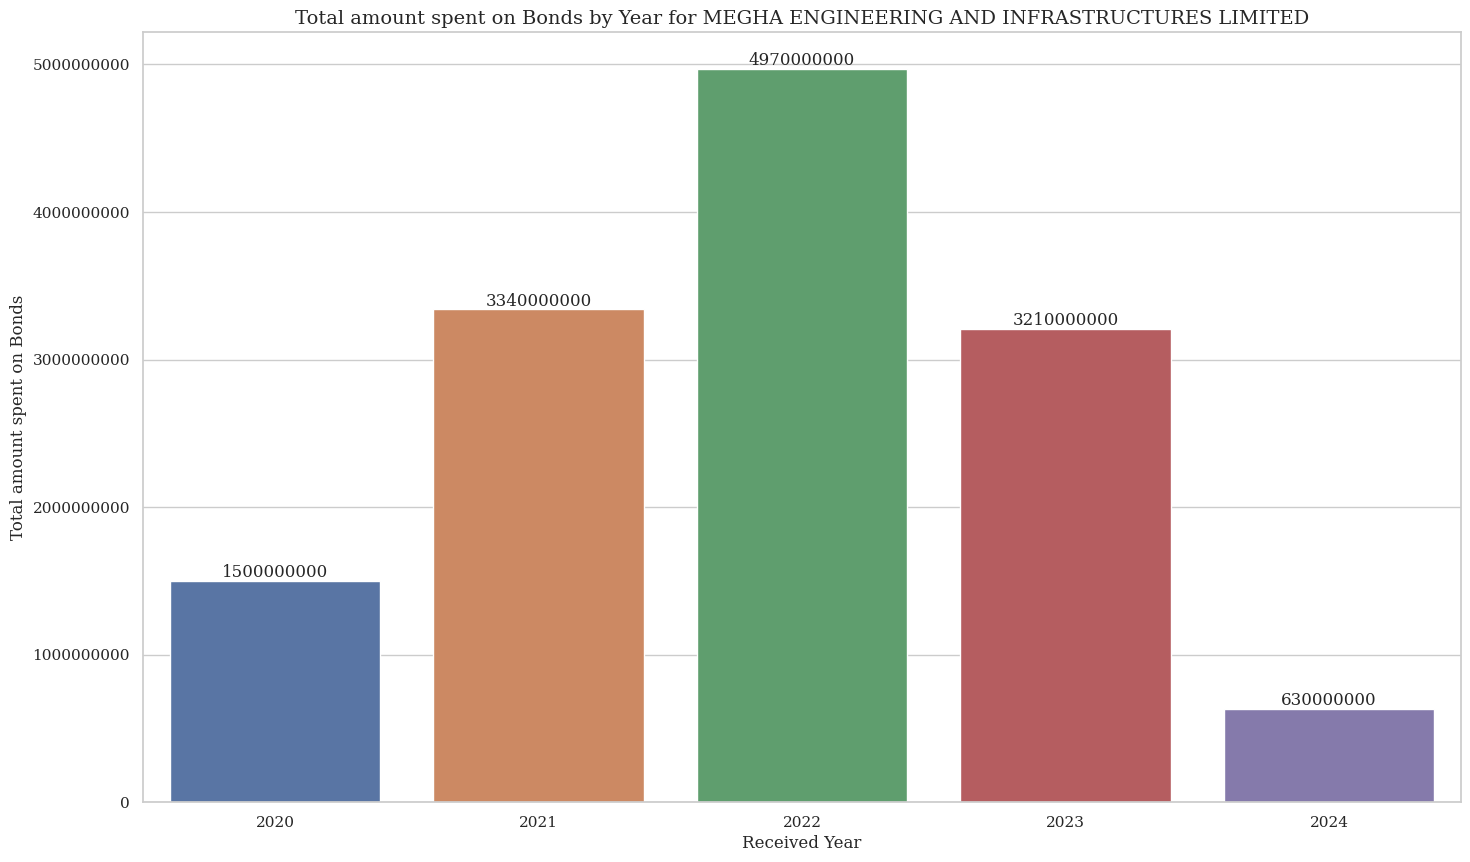

In [162]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=z, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df1, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

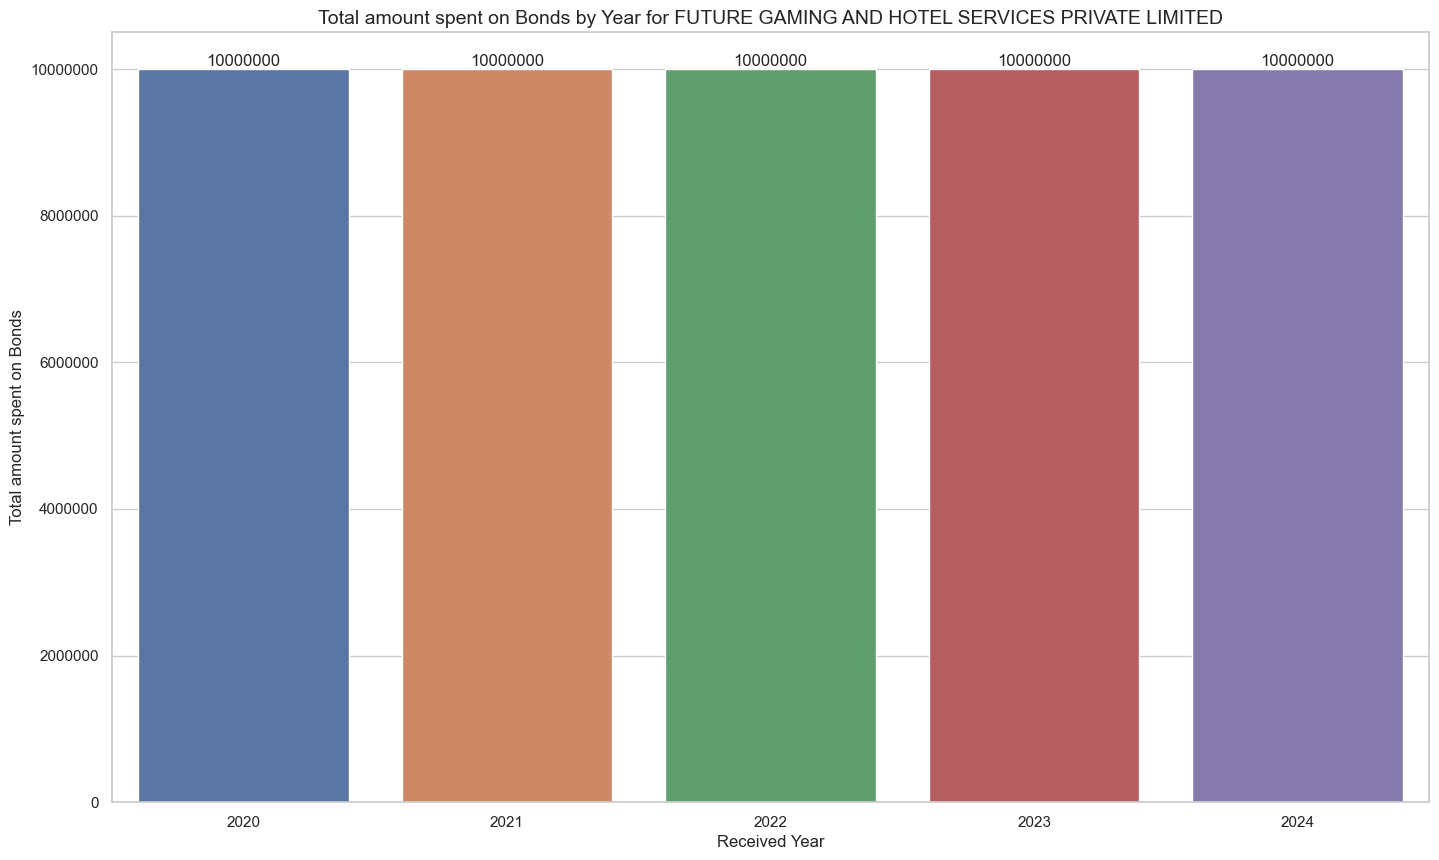

In [143]:

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df1, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

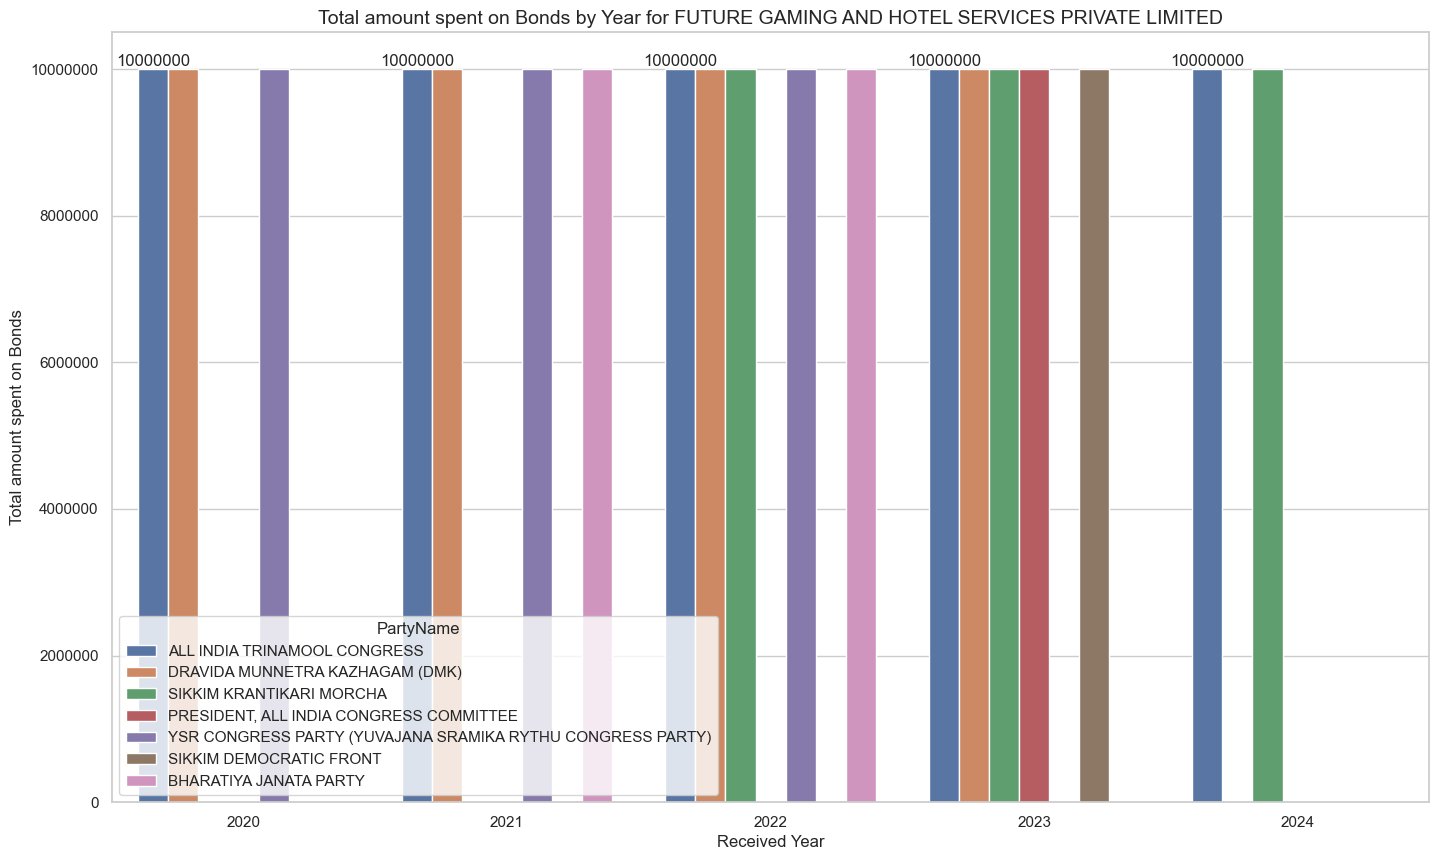

In [144]:
company_name =  'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED'

filtered_df1 = filtered_df[filtered_df['Purchaser'] == company_name]
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df1, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

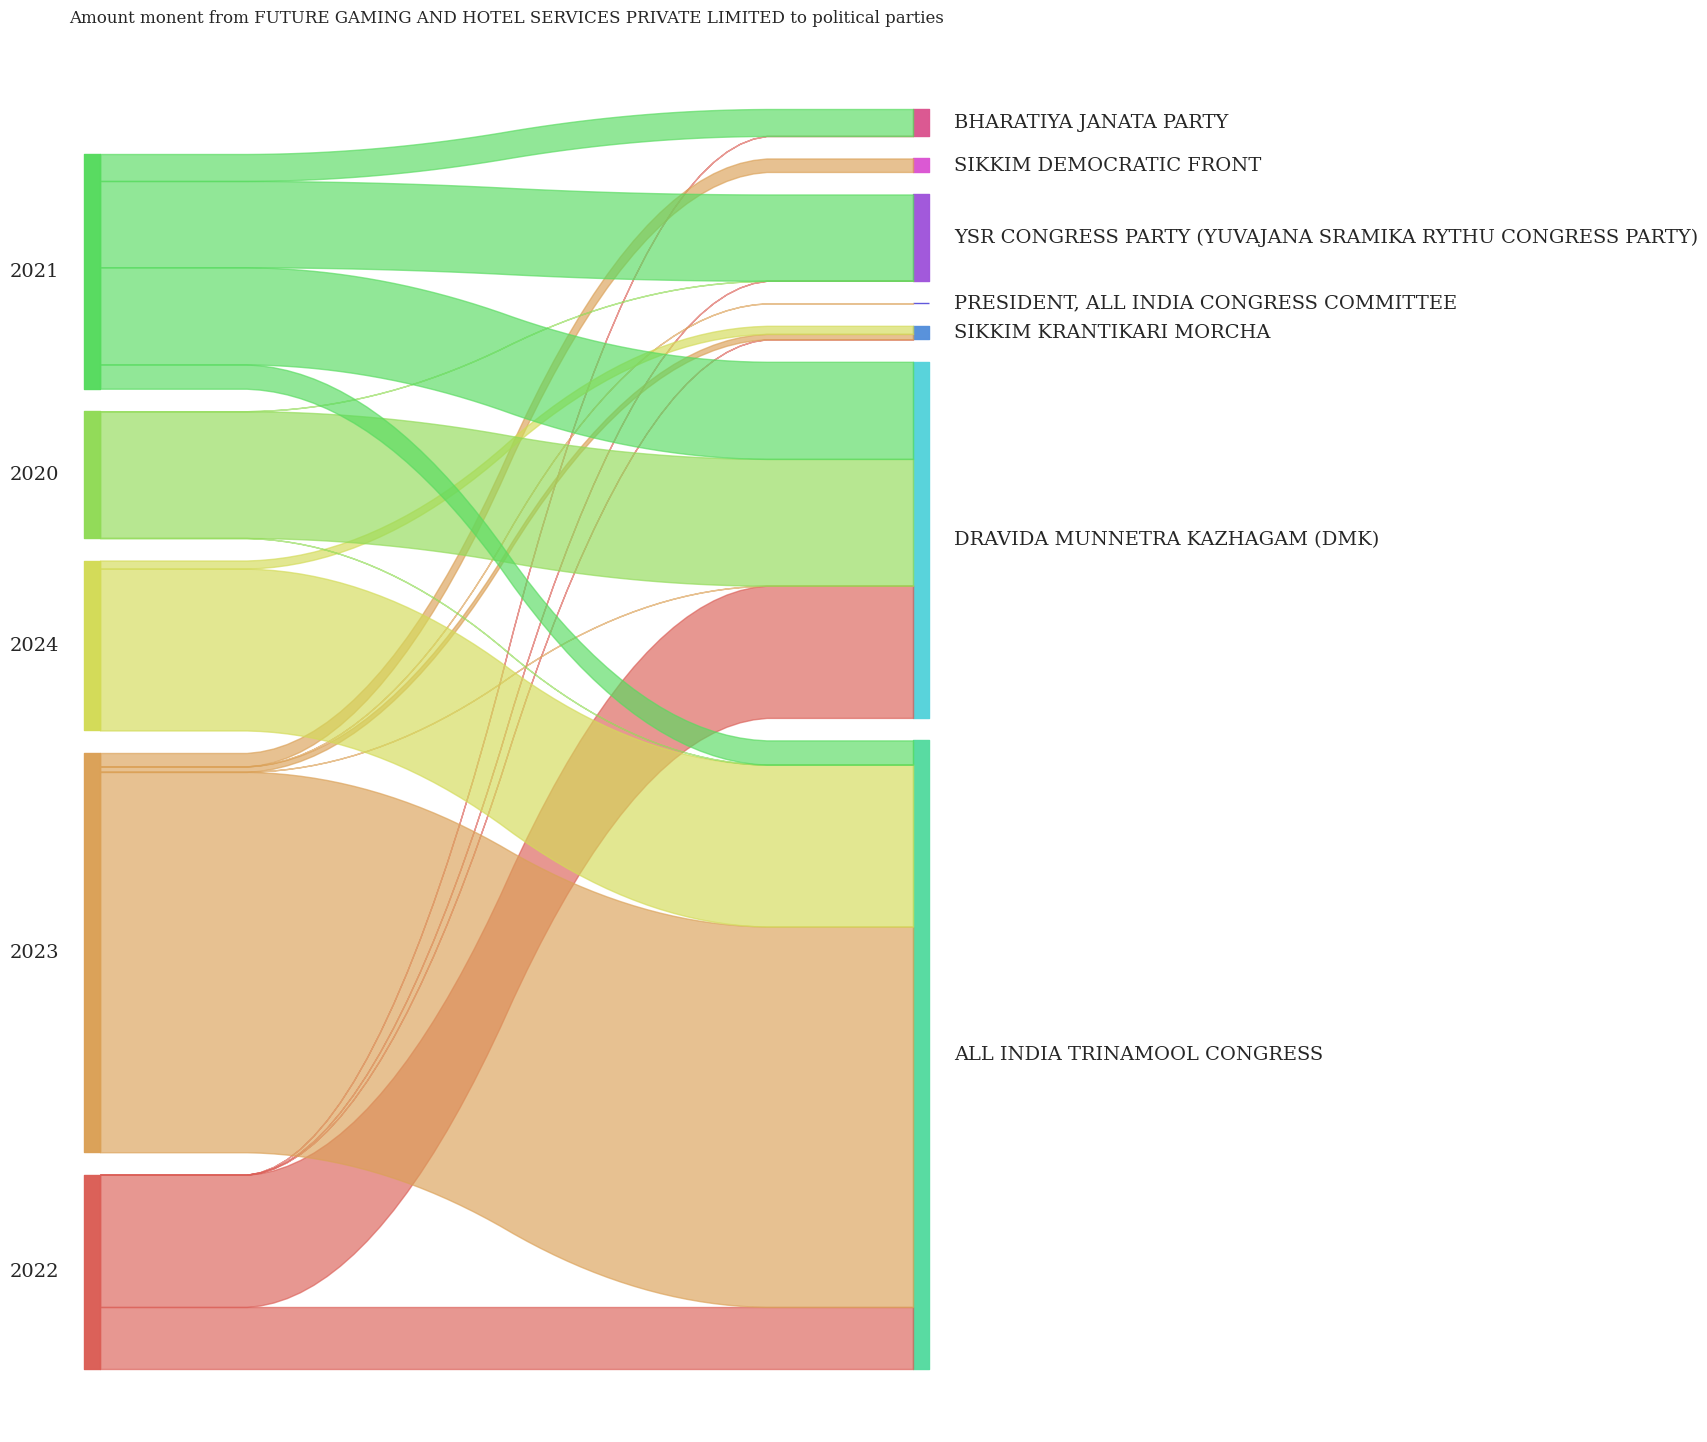

In [145]:
company_name =  'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED'

filtered_df1 = filtered_df[filtered_df['Purchaser'] == company_name]

# Sankey chart from matplotlib
sankey(
    left        = filtered_df1['Year'],
    right       = filtered_df1['PartyName'],
    leftWeight  = filtered_df1['Denomination'],
    rightWeight = filtered_df1['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

In [146]:
filtered_df

Urn JournalDate PurchaseDate ExpiryDate  \
70     00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
72     00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
74     00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
76     00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
78     00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
...                        ...         ...          ...        ...   
20178  01355202104070000001736  2021-04-07   2021-04-07 2021-04-21   
20235  01355202104070000001736  2021-04-07   2021-04-07 2021-04-21   
20255  01355202104070000001736  2021-04-07   2021-04-07 2021-04-21   
20290  01355202104070000001736  2021-04-07   2021-04-07 2021-04-21   
20293  01355202104070000001736  2021-04-07   2021-04-07 2021-04-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
70     QWIKSUPPLYCHAINPRIVATELIMITED     OC     10071.0            300.0   
72     QWIKSUPPLYCHAINPRIVATELIMITED     OC     10073.0            300.0   
74     QWIKSUPPLYCHAINPRIVATELIMITED     OC     10075.0            300.0   
76     QWIKSUPPLYCHAINPRIVATELIMITED     OC     10077.0            300.0   
78     QWIKSUPPLYCHAINPRIVATELIMITED     OC     10079.0            300.0   
...                              ...    ...         ...              ...   
20178          TORRENT POWER LIMITED     TL       945.0           1355.0   
20235          TORRENT POWER LIMITED     TL       951.0           1355.0   
20255          TORRENT POWER LIMITED     TL       957.0           1355.0   
20290          TORRENT POWER LIMITED     TL       961.0           1355.0   
20293          TORRENT POWER LIMITED     TL       964.0           1355.0   

       IssueTeller                                    IssueState  \
70       7905165.0                                   Maharashtra   
72       7905165.0                                   Maharashtra   
74       7905165.0                                   Maharashtra   
76       7905165.0                                   Maharashtra   
78       7905165.0                                   Maharashtra   
...            ...                                           ...   
20178    5140277.0  Gujarat, Dadar & Nagar Haveliand Daman & Diu   
20235    5140277.0  Gujarat, Dadar & Nagar Haveliand Daman & Diu   
20255    5140277.0  Gujarat, Dadar & Nagar Haveliand Daman & Diu   
20290    5140277.0  Gujarat, Dadar & Nagar Haveliand Daman & Diu   
20293    5140277.0  Gujarat, Dadar & Nagar Haveliand Daman & Diu   

       IssueBranchCodeNo IssueBranchCity Unique_key DateEncashment  \
70                 300.0          Mumbai    OC10071     2022-01-06   
72                 300.0          Mumbai    OC10073     2022-01-06   
74                 300.0          Mumbai    OC10075     2022-01-06   
76                 300.0          Mumbai    OC10077     2022-01-06   
78                 300.0          Mumbai    OC10079     2022-01-06   
...                  ...             ...        ...            ...   
20178             1355.0     Gandhinagar      TL945     2021-04-12   
20235             1355.0     Gandhinagar      TL951     2021-04-12   
20255             1355.0     Gandhinagar      TL957     2021-04-12   
20290             1355.0     Gandhinagar      TL961     2021-04-12   
20293             1355.0     Gandhinagar      TL964     2021-04-12   

                    PartyName   AccountNum  PayBranchCode  PayTeller  \
70                   SHIVSENA  *******4444          300.0  3656179.0   
72                   SHIVSENA  *******4444          300.0  3656179.0   
74                   SHIVSENA  *******4444          300.0  3656179.0   
76                   SHIVSENA  *******4444          300.0  3656179.0   
78                   SHIVSENA  *******4444          300.0  3656179.0   
...                       ...          ...            ...        ...   
20178  BHARATIYA JANATA PARTY  *******8244          691.0  7516991.0   
20235  BHARATIYA JANATA PARTY  *******8

In [147]:
filtered_df.shape

(6099, 23)

In [148]:
filtered_df.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'DateEncashment',
       'PartyName', 'AccountNum', 'PayBranchCode', 'PayTeller',
       'EncashedState', 'EncashedBranchCode', 'EncashedCity', 'Denomination',
       'Year'],
      dtype='object')

## 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED'

In [149]:
company_name =  'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'

filtered_df2 = filtered_df[filtered_df['Purchaser'] == company_name]
filtered_df2

Urn JournalDate PurchaseDate ExpiryDate  \
2102   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
2106   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
2110   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
2114   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
2116   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
...                        ...         ...          ...        ...   
12134  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   
12136  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   
12138  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   
12140  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   
12142  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   

                                           Purchaser Prefix  BondNumber  \
2102   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12085.0   
2106   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12089.0   
2110   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12093.0   
2114   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12097.0   
2116   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12099.0   
...                                              ...    ...         ...   
12134  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9924.0   
12136  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9926.0   
12138  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9928.0   
12140  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9930.0   
12142  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9932.0   

       IssueBranchCode  IssueTeller IssueState  IssueBranchCodeNo  \
2102             847.0    3394387.0  Telangana              847.0   
2106             847.0    3394387.0  Telangana              847.0   
2110             847.0    3394387.0  Telangana              847.0   
2114             847.0    3394387.0  Telangana              847.0   
2116             847.0    3394387.0  Telangana              847.0   
...                ...          ...        ...                ...   
12134            847.0    3898296.0  Telangana              847.0   
12136            847.0    3898296.0  Telangana              847.0   
12138            847.0    3898296.0  Telangana              847.0   
12140            847.0    3898296.0  Telangana              847.0   
12142            847.0    3898296.0  Telangana              847.0   

      IssueBranchCity Unique_key DateEncashment               PartyName  \
2102        Hyderabad    OC12085     2022-07-06  BHARAT RASHTRA SAMITHI   
2106        Hyderabad    OC12089     2022-07-06  BHARAT RASHTRA SAMITHI   
2110        Hyderabad    OC12093     2022-07-06  BHARAT RASHTRA SAMITHI   
2114        Hyderabad    OC12097     2022-07-06  BHARAT RASHTRA SAMITHI   
2116        Hyderabad    OC12099     2022-07-06  BHARAT RASHTRA SAMITHI   
...               ...        ...            ...                     ...   
12134       Hyderabad     OC9924     2022-04-11  BHARAT RASHTRA SAMITHI   
12136       Hyderabad     OC9926     2022-04-11  BHARAT RASHTRA SAMITHI   
12138       Hyderabad     OC9928     2022-04-11  BHARAT RASHTRA SAMITHI   
12140       Hyderabad     OC9930     2022-04-11  BHARAT RASHTRA SAMITHI   
12142       Hyderabad     OC9932     2022-04-11  BHARAT RASHTRA SAMITHI   

        AccountNum  PayBranchCode  PayTeller EncashedState  \
2102   *******7477          847.0  3889823.0     Telangana   
2106   *******7477          847.0  3889823.0     Telangana   
2110   *******7477          847.0  3889823.0     Telangana   
2114   *******7477          847.0  3889823.0     Telangana   
2116   *******7477          847.0  3889823.0     Telangana   
...            ...            ...        ...           ...   
12134  *******7477          847.0  6370918.0     Telangana   
12136  *******7477          847.0  6370918.0     Telangana 

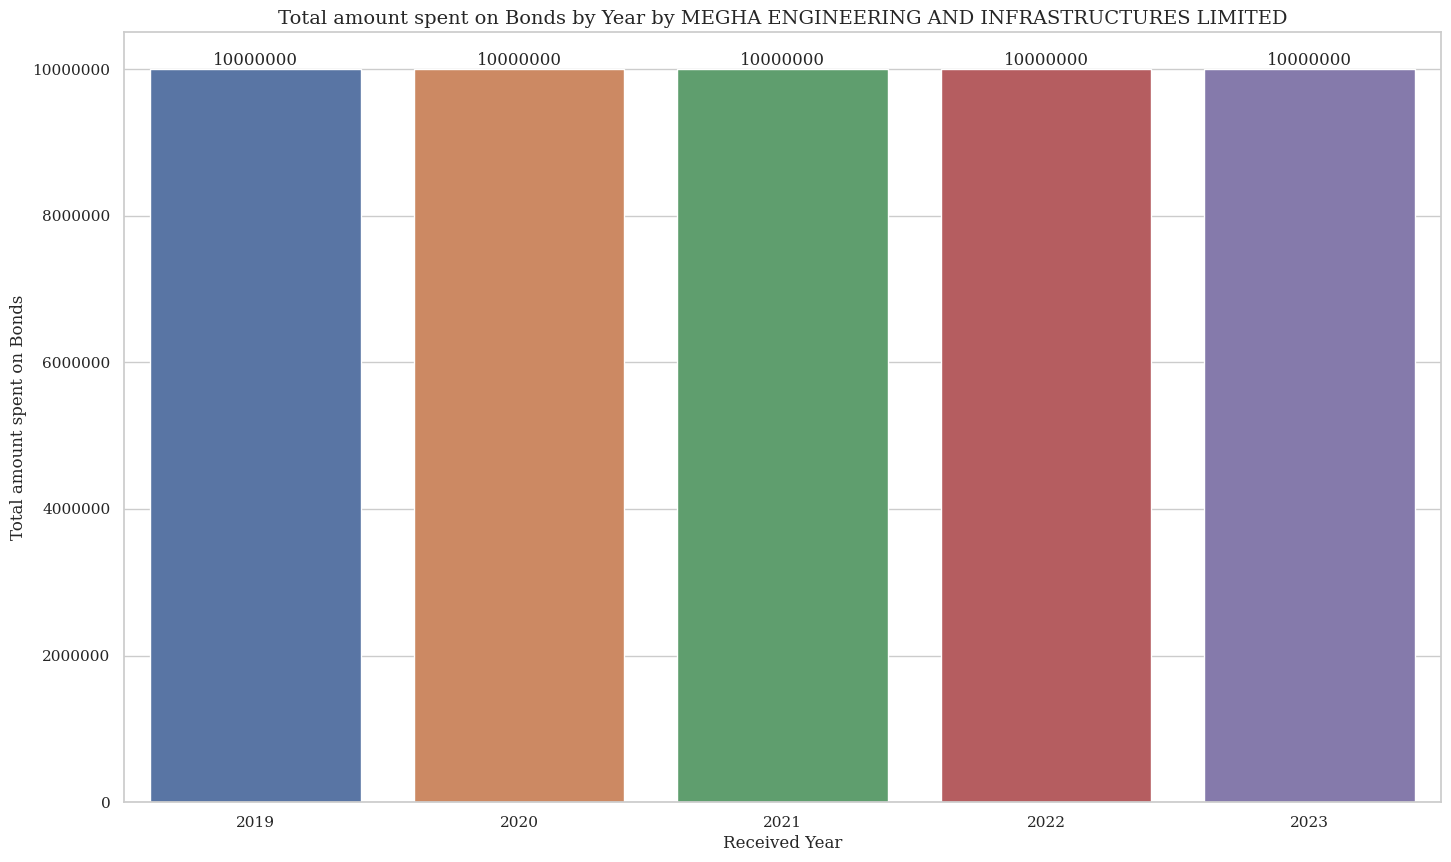

In [150]:
company_name =  'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'

filtered_df2 = filtered_df[filtered_df['Purchaser'] == company_name]
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df2, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

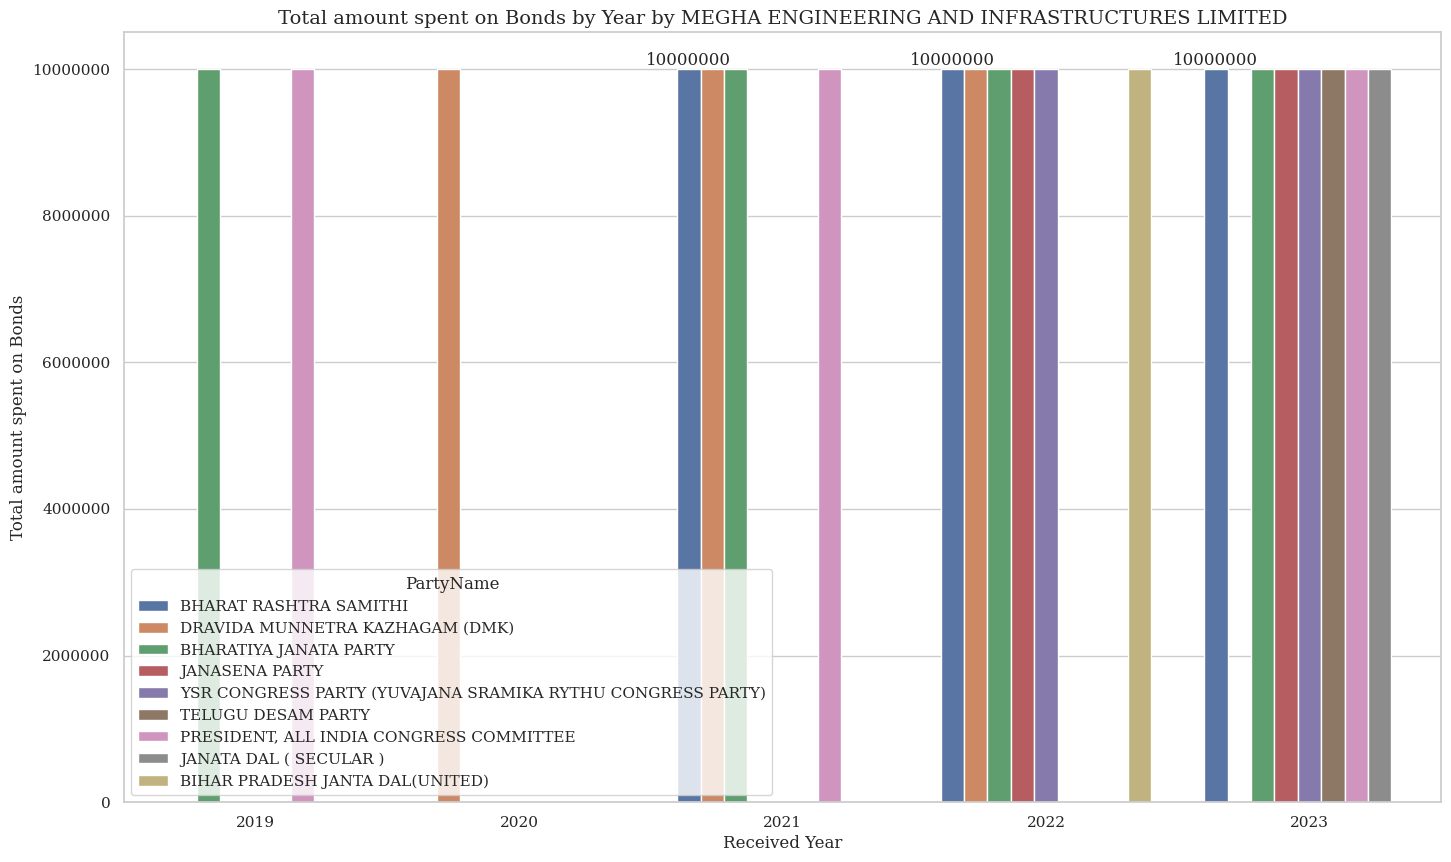

In [163]:
company_name =  'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'

filtered_df2 = filtered_df[filtered_df['Purchaser'] == company_name]
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df2, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [164]:
filtered_df2

Urn JournalDate PurchaseDate ExpiryDate  \
2102   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
2106   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
2110   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
2114   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
2116   00847202207050000002461  2022-07-05   2022-07-05 2022-07-19   
...                        ...         ...          ...        ...   
12134  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   
12136  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   
12138  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   
12140  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   
12142  00847202204070000002367  2022-04-07   2022-04-07 2022-04-21   

                                           Purchaser Prefix  BondNumber  \
2102   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12085.0   
2106   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12089.0   
2110   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12093.0   
2114   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12097.0   
2116   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12099.0   
...                                              ...    ...         ...   
12134  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9924.0   
12136  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9926.0   
12138  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9928.0   
12140  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9930.0   
12142  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9932.0   

       IssueBranchCode  IssueTeller IssueState  IssueBranchCodeNo  \
2102             847.0    3394387.0  Telangana              847.0   
2106             847.0    3394387.0  Telangana              847.0   
2110             847.0    3394387.0  Telangana              847.0   
2114             847.0    3394387.0  Telangana              847.0   
2116             847.0    3394387.0  Telangana              847.0   
...                ...          ...        ...                ...   
12134            847.0    3898296.0  Telangana              847.0   
12136            847.0    3898296.0  Telangana              847.0   
12138            847.0    3898296.0  Telangana              847.0   
12140            847.0    3898296.0  Telangana              847.0   
12142            847.0    3898296.0  Telangana              847.0   

      IssueBranchCity Unique_key DateEncashment               PartyName  \
2102        Hyderabad    OC12085     2022-07-06  BHARAT RASHTRA SAMITHI   
2106        Hyderabad    OC12089     2022-07-06  BHARAT RASHTRA SAMITHI   
2110        Hyderabad    OC12093     2022-07-06  BHARAT RASHTRA SAMITHI   
2114        Hyderabad    OC12097     2022-07-06  BHARAT RASHTRA SAMITHI   
2116        Hyderabad    OC12099     2022-07-06  BHARAT RASHTRA SAMITHI   
...               ...        ...            ...                     ...   
12134       Hyderabad     OC9924     2022-04-11  BHARAT RASHTRA SAMITHI   
12136       Hyderabad     OC9926     2022-04-11  BHARAT RASHTRA SAMITHI   
12138       Hyderabad     OC9928     2022-04-11  BHARAT RASHTRA SAMITHI   
12140       Hyderabad     OC9930     2022-04-11  BHARAT RASHTRA SAMITHI   
12142       Hyderabad     OC9932     2022-04-11  BHARAT RASHTRA SAMITHI   

        AccountNum  PayBranchCode  PayTeller EncashedState  \
2102   *******7477          847.0  3889823.0     Telangana   
2106   *******7477          847.0  3889823.0     Telangana   
2110   *******7477          847.0  3889823.0     Telangana   
2114   *******7477          847.0  3889823.0     Telangana   
2116   *******7477          847.0  3889823.0     Telangana   
...            ...            ...        ...           ...   
12134  *******7477          847.0  6370918.0     Telangana   
12136  *******7477          847.0  6370918.0     Telangana 

In [165]:
filtered_df2.to_csv("sankey_problem.csv")

In [166]:
filtered_df2 = pd.read_csv('sankey_problem.csv')
filtered_df2.head()

Unnamed: 0                      Urn JournalDate PurchaseDate  ExpiryDate  \
0        2102  00847202207050000002461  2022-07-05   2022-07-05  2022-07-19   
1        2106  00847202207050000002461  2022-07-05   2022-07-05  2022-07-19   
2        2110  00847202207050000002461  2022-07-05   2022-07-05  2022-07-19   
3        2114  00847202207050000002461  2022-07-05   2022-07-05  2022-07-19   
4        2116  00847202207050000002461  2022-07-05   2022-07-05  2022-07-19   

                                       Purchaser Prefix  BondNumber  \
0  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12085.0   
1  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12089.0   
2  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12093.0   
3  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12097.0   
4  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12099.0   

   IssueBranchCode  IssueTeller IssueState  IssueBranchCodeNo IssueBranchCity  \
0            847.0    3394387.0  Telangana              847.0       Hyderabad   
1            847.0    3394387.0  Telangana              847.0       Hyderabad   
2            847.0    3394387.0  Telangana              847.0       Hyderabad   
3            847.0    3394387.0  Telangana              847.0       Hyderabad   
4            847.0    3394387.0  Telangana              847.0       Hyderabad   

  Unique_key DateEncashment               PartyName   AccountNum  \
0    OC12085     2022-07-06  BHARAT RASHTRA SAMITHI  *******7477   
1    OC12089     2022-07-06  BHARAT RASHTRA SAMITHI  *******7477   
2    OC12093     2022-07-06  BHARAT RASHTRA SAMITHI  *******7477   
3    OC12097     2022-07-06  BHARAT RASHTRA SAMITHI  *******7477   
4    OC12099     2022-07-06  BHARAT RASHTRA SAMITHI  *******7477   

   PayBranchCode  PayTeller EncashedState  EncashedBranchCode EncashedCity  \
0          847.0  3889823.0     Telangana               847.0    Hyderabad   
1          847.0  3889823.0     Telangana               847.0    Hyderabad   
2          847.0  3889823.0     Telangana               847.0    Hyderabad   
3          847.0  3889823.0     Telangana               847.0    Hyderabad   
4          847.0  3889823.0     Telangana               847.0    Hyderabad   

   Denomination  Year  
0    10000000.0  2022  
1    10000000.0  2022  
2    10000000.0  2022  
3    10000000.0  2022  
4    10000000.0  2022

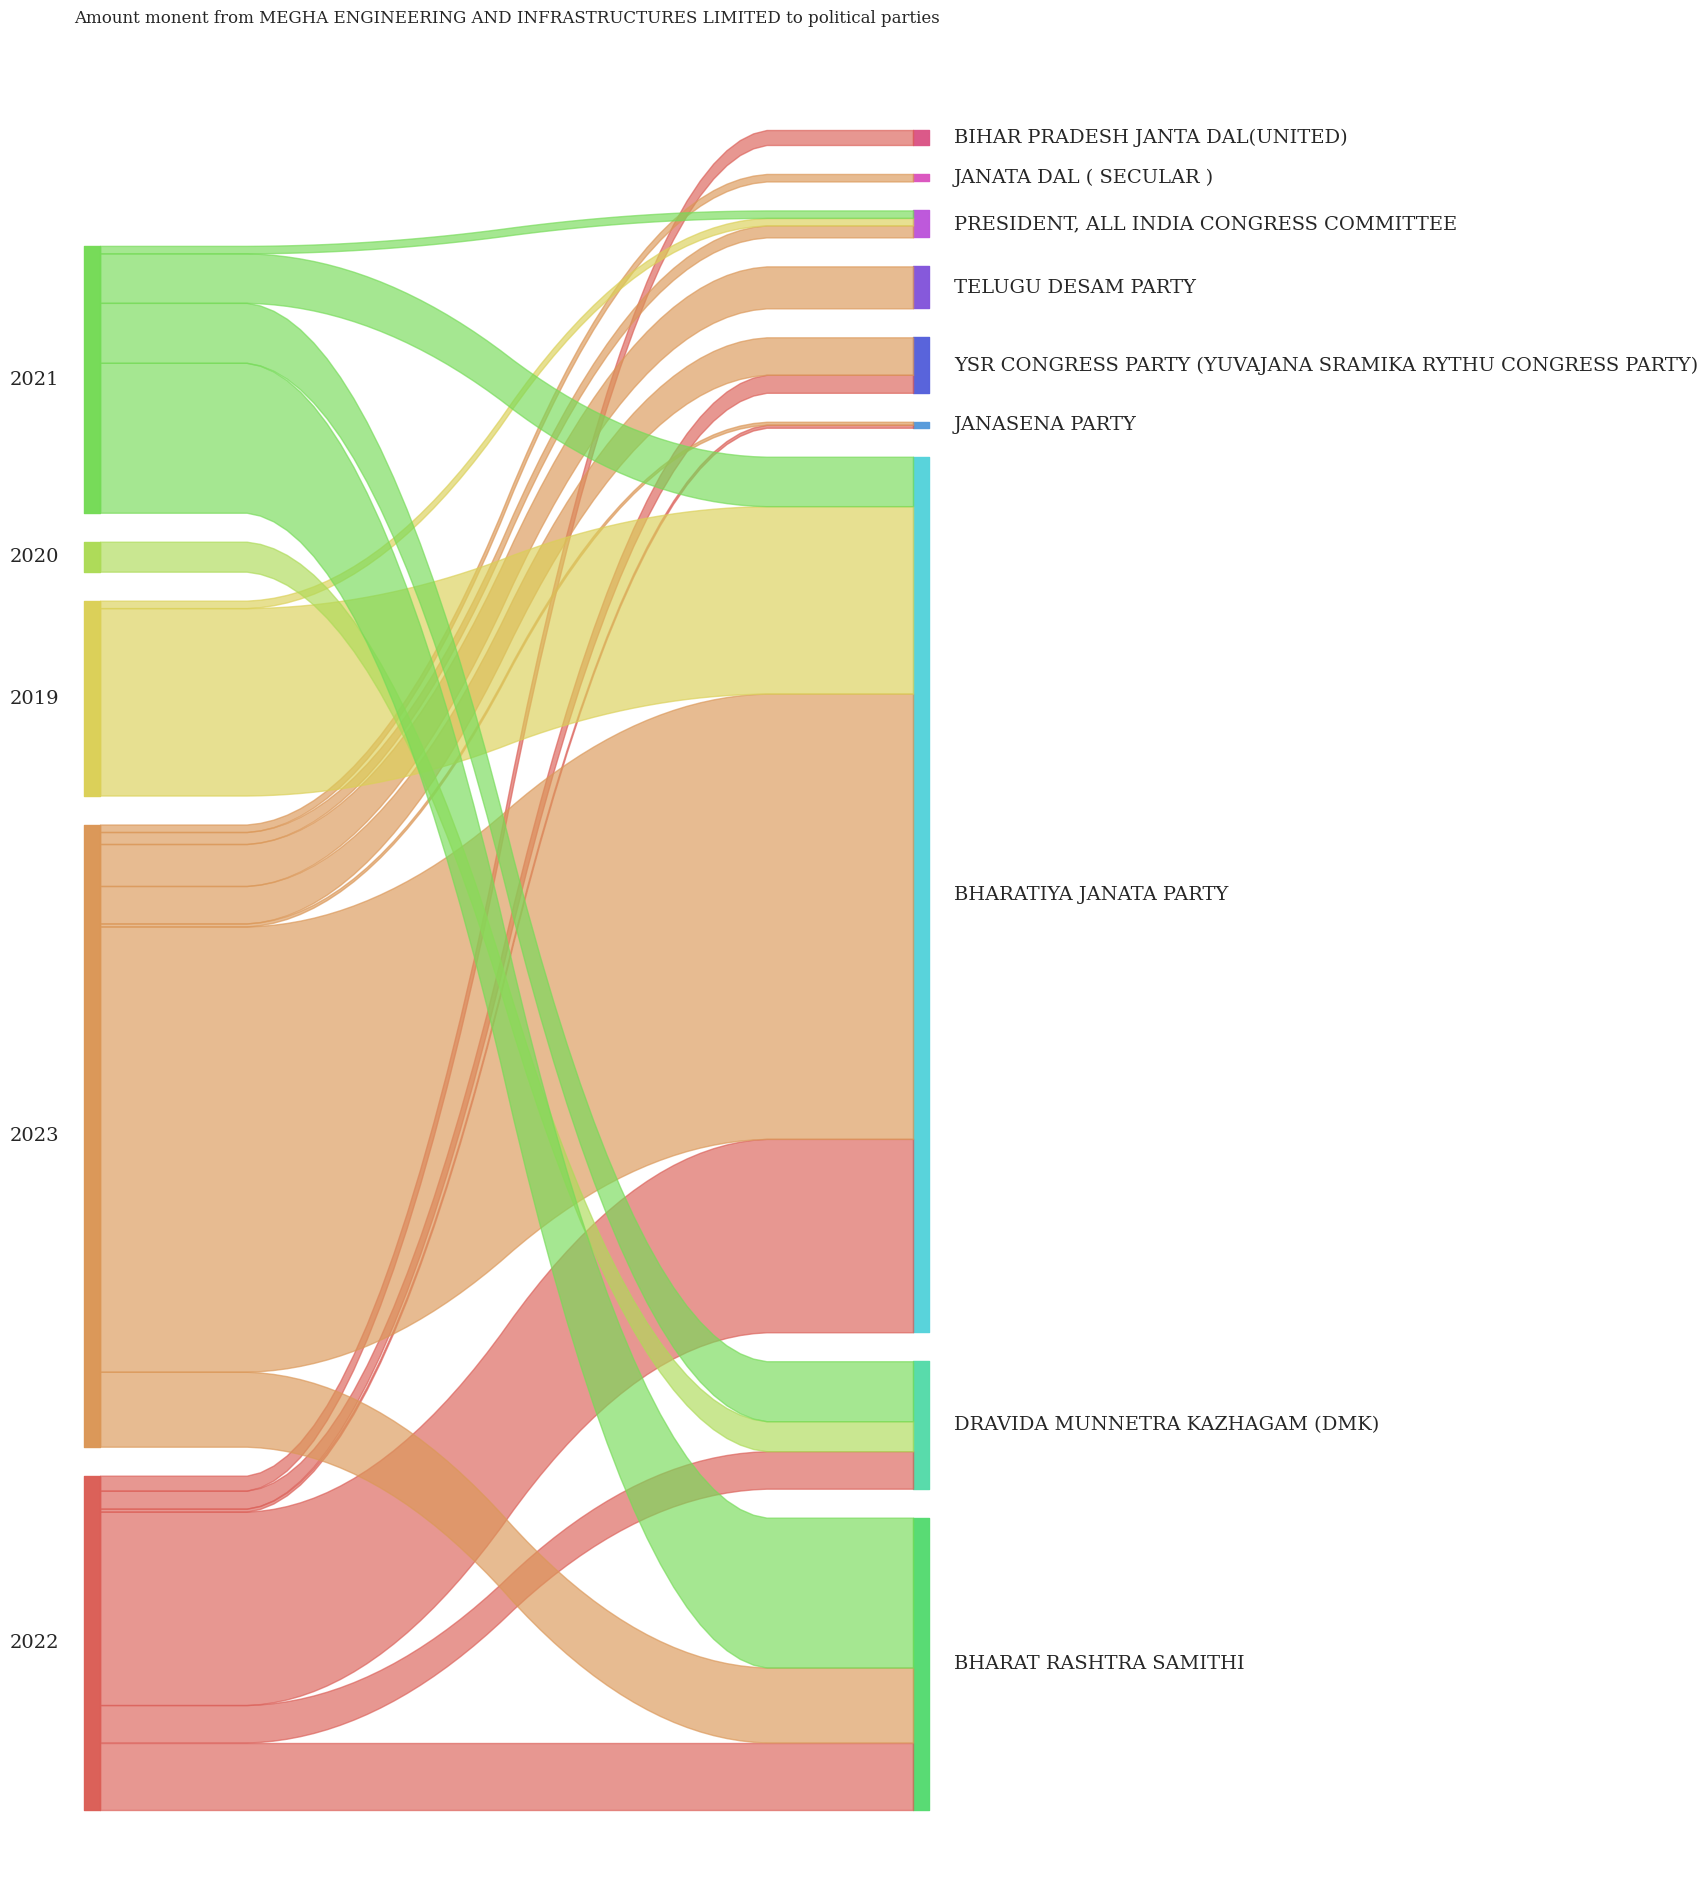

In [167]:
#plt.figure(figsize=(10,20))

# Sankey chart from matplotlib
sankey(
    left        = filtered_df2['Year'],
    right       = filtered_df2['PartyName'],
    leftWeight  = filtered_df2['Denomination'],
    rightWeight = filtered_df2['Denomination']
)
plt.gcf().set_size_inches((12,24))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

In [169]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          966 non-null    int64  
 1   Urn                 966 non-null    object 
 2   JournalDate         966 non-null    object 
 3   PurchaseDate        966 non-null    object 
 4   ExpiryDate          966 non-null    object 
 5   Purchaser           966 non-null    object 
 6   Prefix              966 non-null    object 
 7   BondNumber          966 non-null    float64
 8   IssueBranchCode     966 non-null    float64
 9   IssueTeller         966 non-null    float64
 10  IssueState          966 non-null    object 
 11  IssueBranchCodeNo   966 non-null    float64
 12  IssueBranchCity     966 non-null    object 
 13  Unique_key          966 non-null    object 
 14  DateEncashment      966 non-null    object 
 15  PartyName           966 non-null    object 
 16  AccountN

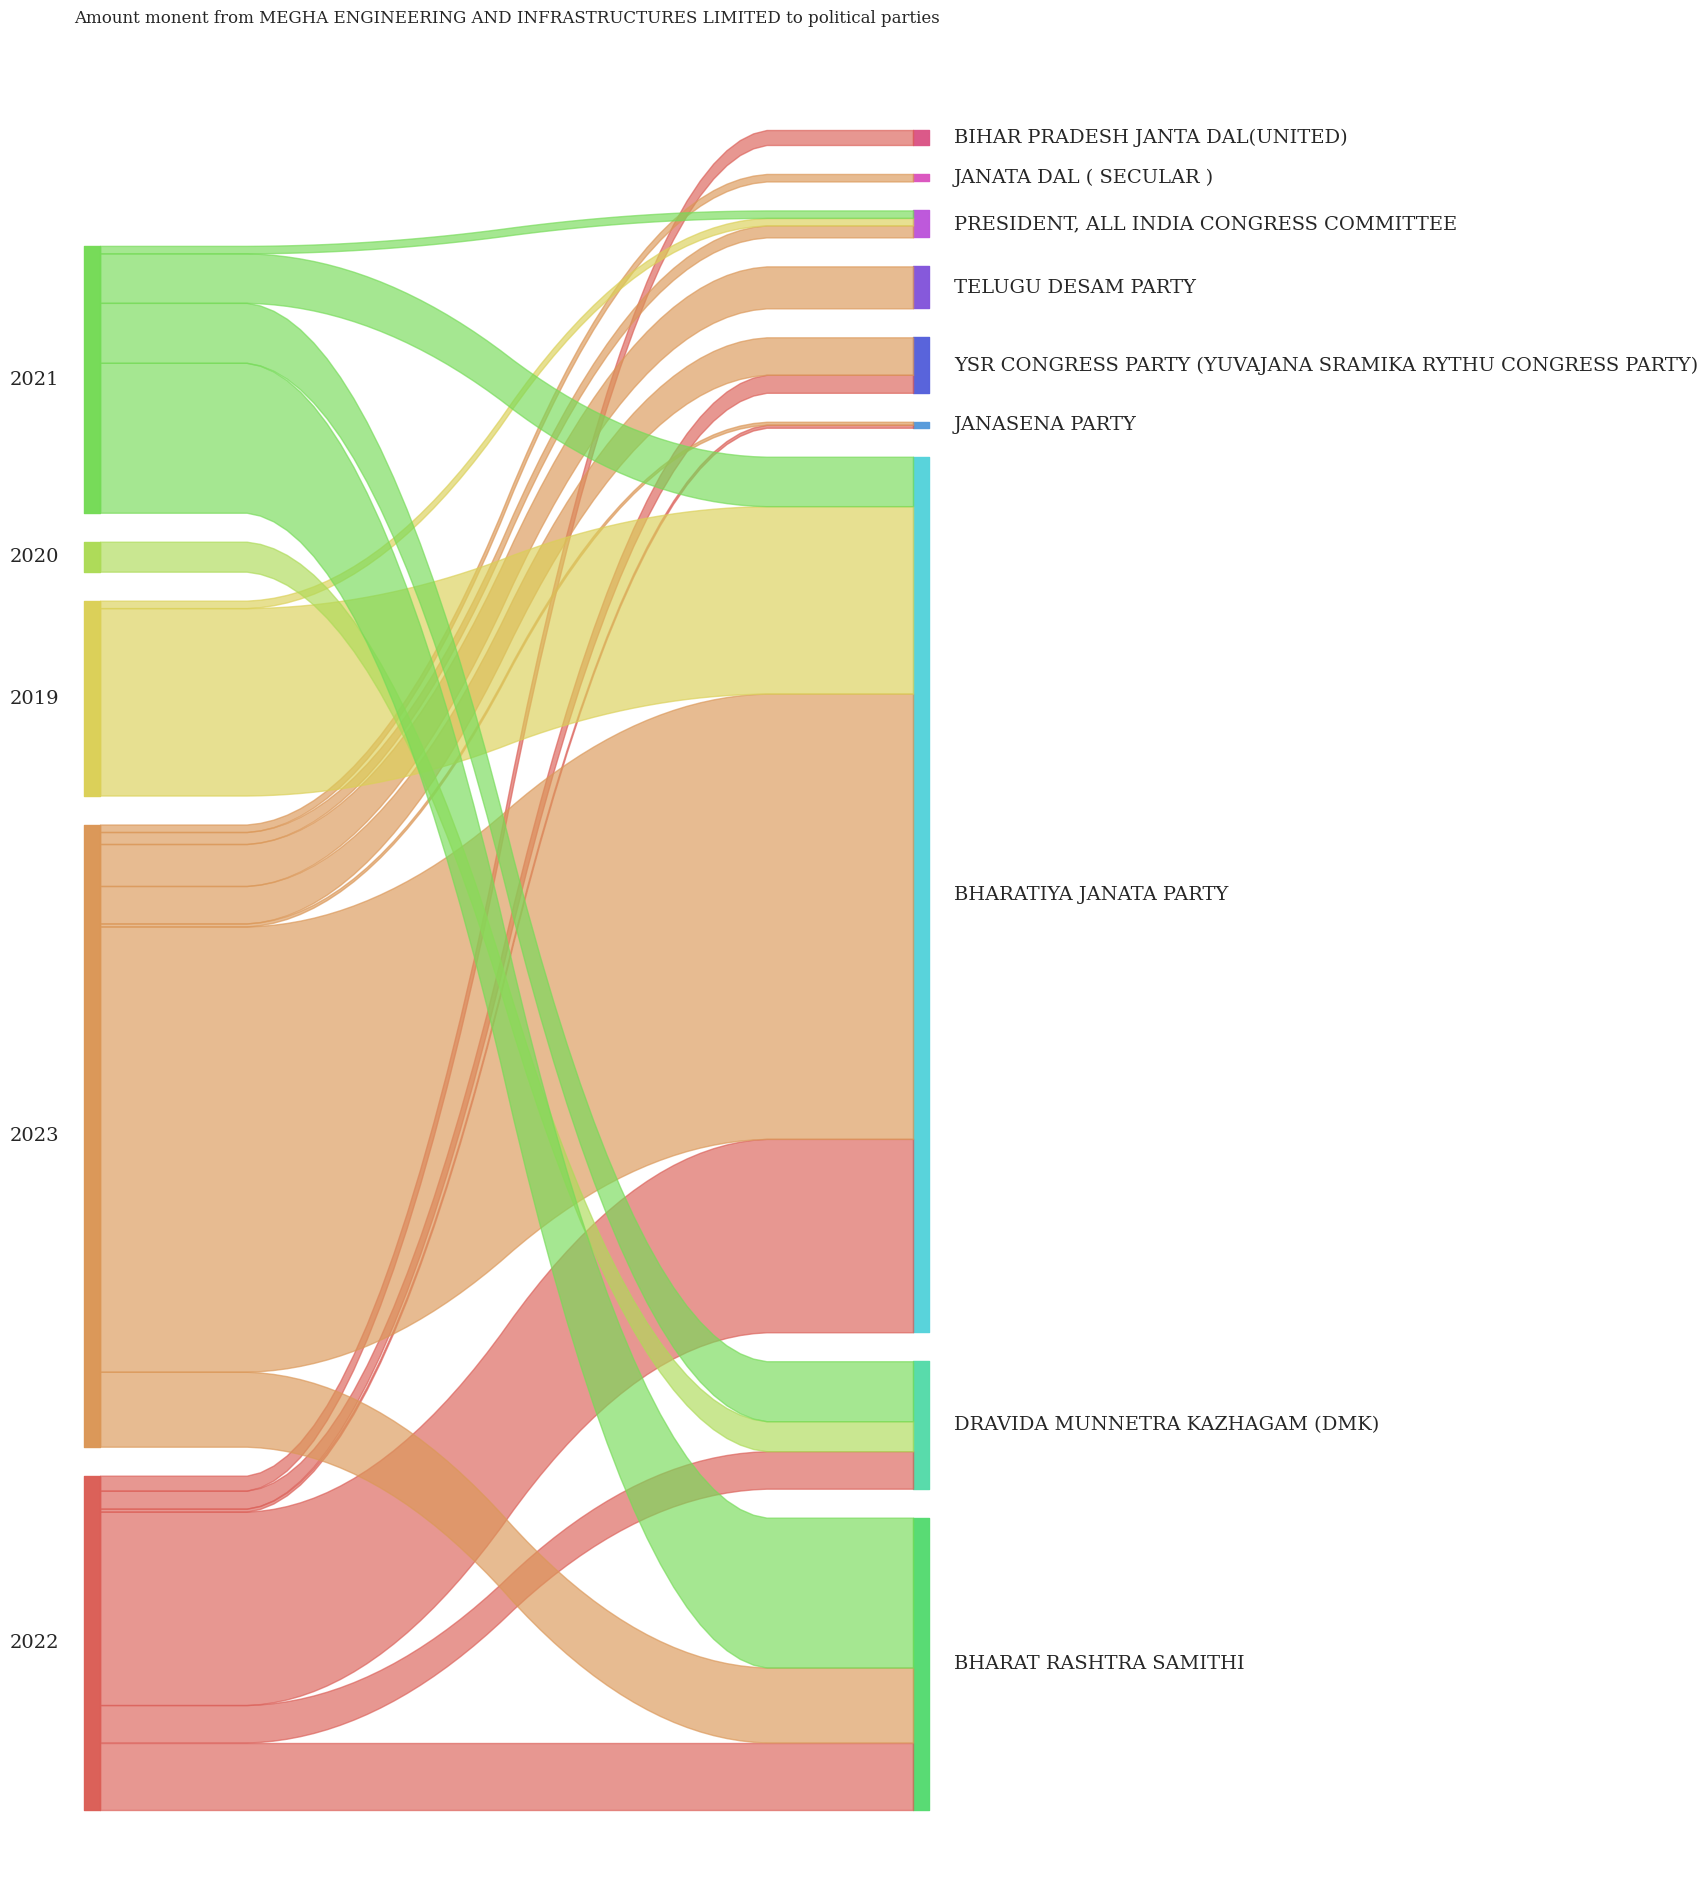

In [170]:
company_name =  'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED' 

# filtered_df2 = filtered_df[filtered_df['Purchaser'] == company_name]

#plt.figure(figsize=(10,20))

# Sankey chart from matplotlib
sankey(
    left        = filtered_df2['Year'],
    right       = filtered_df2['PartyName'],
    leftWeight  = filtered_df2['Denomination'],
    rightWeight = filtered_df2['Denomination']
)
plt.gcf().set_size_inches((12,24))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

## 'QWIKSUPPLYCHAINPRIVATELIMITED'

In [171]:
company_name = 'QWIKSUPPLYCHAINPRIVATELIMITED'
filtered_df3 = filtered_df[filtered_df['Purchaser'] == company_name]
filtered_df3 

Urn JournalDate PurchaseDate ExpiryDate  \
70    00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
72    00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
74    00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
76    00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
78    00300202201050000002120  2022-01-05   2022-01-05 2022-01-19   
...                       ...         ...          ...        ...   
6946  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   
6948  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   
6950  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   
6952  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   
6954  00300202311170000003592  2023-11-17   2023-11-17 2023-12-01   

                          Purchaser Prefix  BondNumber  IssueBranchCode  \
70    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10071.0            300.0   
72    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10073.0            300.0   
74    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10075.0            300.0   
76    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10077.0            300.0   
78    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10079.0            300.0   
...                             ...    ...         ...              ...   
6946  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17302.0            300.0   
6948  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17304.0            300.0   
6950  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17306.0            300.0   
6952  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17308.0            300.0   
6954  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17310.0            300.0   

      IssueTeller   IssueState  IssueBranchCodeNo IssueBranchCity Unique_key  \
70      7905165.0  Maharashtra              300.0          Mumbai    OC10071   
72      7905165.0  Maharashtra              300.0          Mumbai    OC10073   
74      7905165.0  Maharashtra              300.0          Mumbai    OC10075   
76      7905165.0  Maharashtra              300.0          Mumbai    OC10077   
78      7905165.0  Maharashtra              300.0          Mumbai    OC10079   
...           ...          ...                ...             ...        ...   
6946    1022034.0  Maharashtra              300.0          Mumbai    OC17302   
6948    1022034.0  Maharashtra              300.0          Mumbai    OC17304   
6950    1022034.0  Maharashtra              300.0          Mumbai    OC17306   
6952    1022034.0  Maharashtra              300.0          Mumbai    OC17308   
6954    1022034.0  Maharashtra              300.0          Mumbai    OC17310   

     DateEncashment               PartyName   AccountNum  PayBranchCode  \
70       2022-01-06                SHIVSENA  *******4444          300.0   
72       2022-01-06                SHIVSENA  *******4444          300.0   
74       2022-01-06                SHIVSENA  *******4444          300.0   
76       2022-01-06                SHIVSENA  *******4444          300.0   
78       2022-01-06                SHIVSENA  *******4444          300.0   
...             ...                     ...          ...            ...   
6946     2023-11-20  BHARATIYA JANATA PARTY  *******8244          691.0   
6948     2023-11-20  BHARATIYA JANATA PARTY  *******8244          691.0   
6950     2023-11-20  BHARATIYA JANATA PARTY  *******8244          691.0   
6952     2023-11-20  BHARATIYA JANATA PARTY  *******8244          691.0   
6954     2023-11-20  BHARATIYA JANATA PARTY  *******8244          691.0   

      PayTeller EncashedState  EncashedBranchCode EncashedCity  Denomination  \
70    3656179.0   Maharashtra               300.0       Mumbai    10000000.0   
72    3656179.0   Maharashtra               300.0       Mumbai    10000000.0   
74    3656179.0   Maharashtra               300.0       Mumbai    10000000.0   
76    3656179.0   Maharashtra               300.0       Mumbai    10000000.0   
78    3656179.0   Maharashtra     

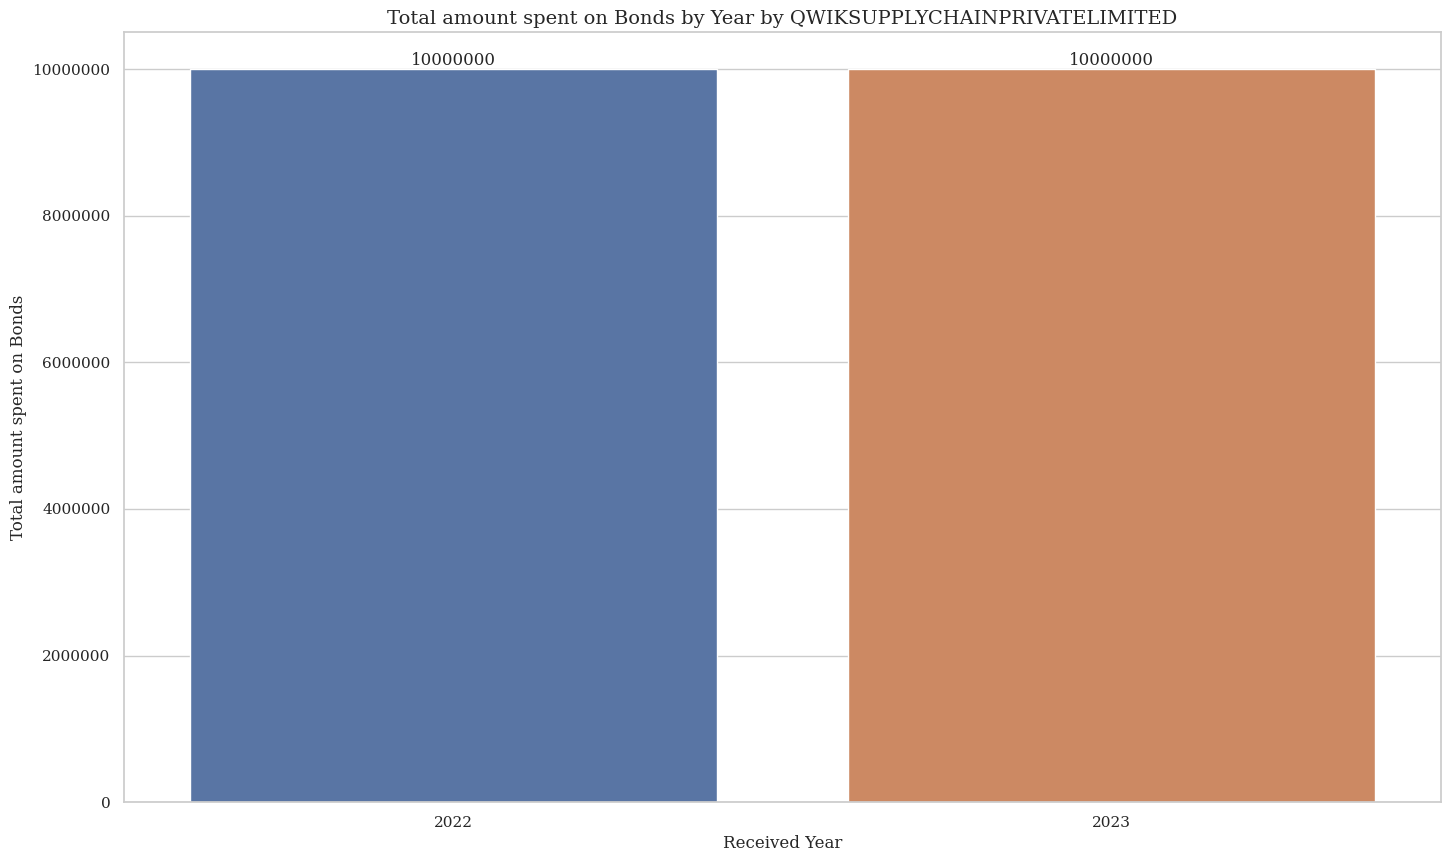

In [172]:
company_name = 'QWIKSUPPLYCHAINPRIVATELIMITED'

filtered_df3 = filtered_df[filtered_df['Purchaser'] == company_name]
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df3, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

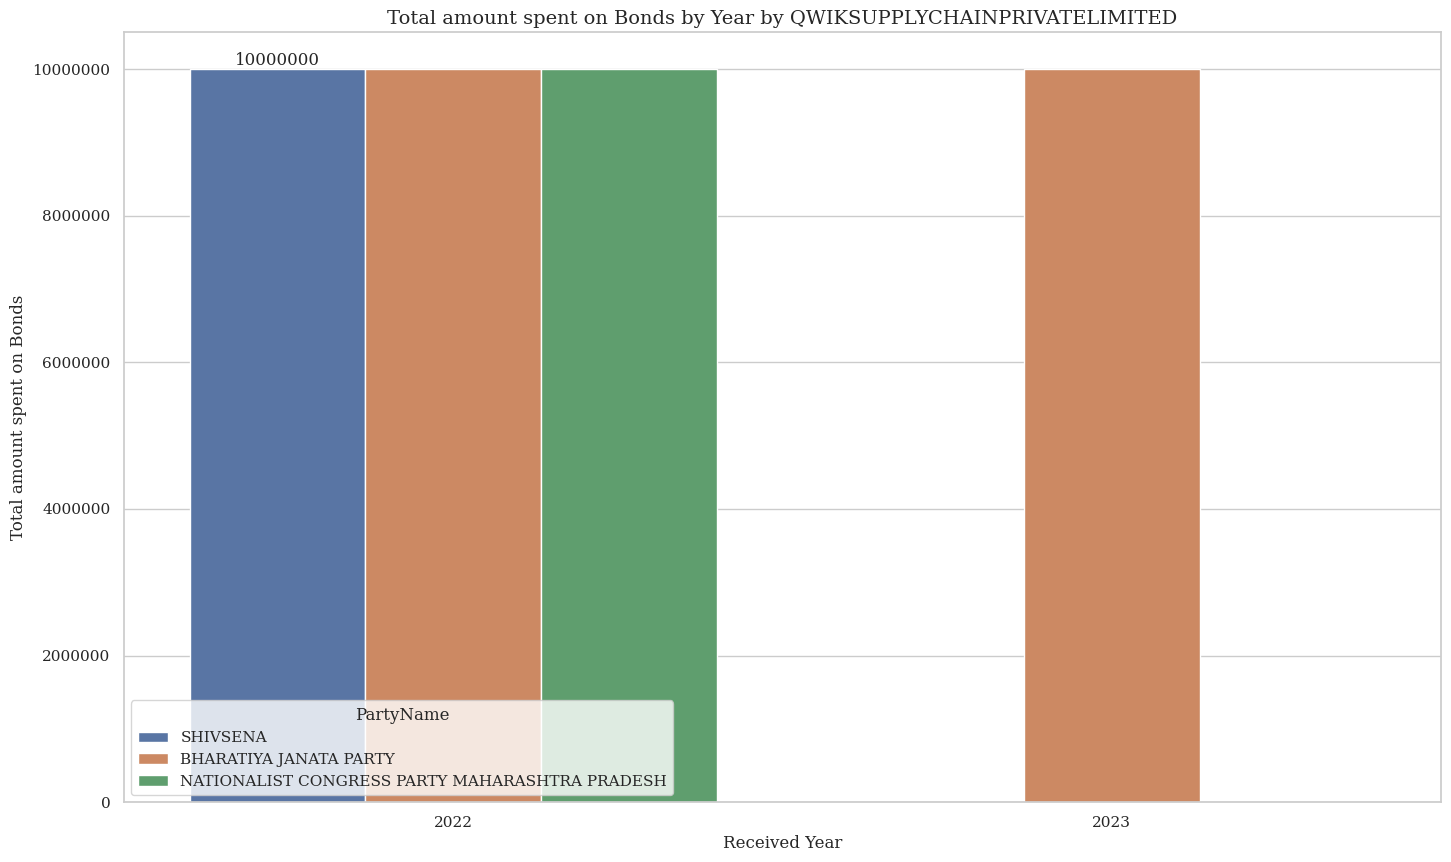

In [173]:
company_name =  'QWIKSUPPLYCHAINPRIVATELIMITED'

filtered_df3 = filtered_df[filtered_df['Purchaser'] == company_name]
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df3, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [174]:
filtered_df3['PartyName'].unique()

array(['SHIVSENA', 'BHARATIYA JANATA PARTY',
       'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH'], dtype=object)

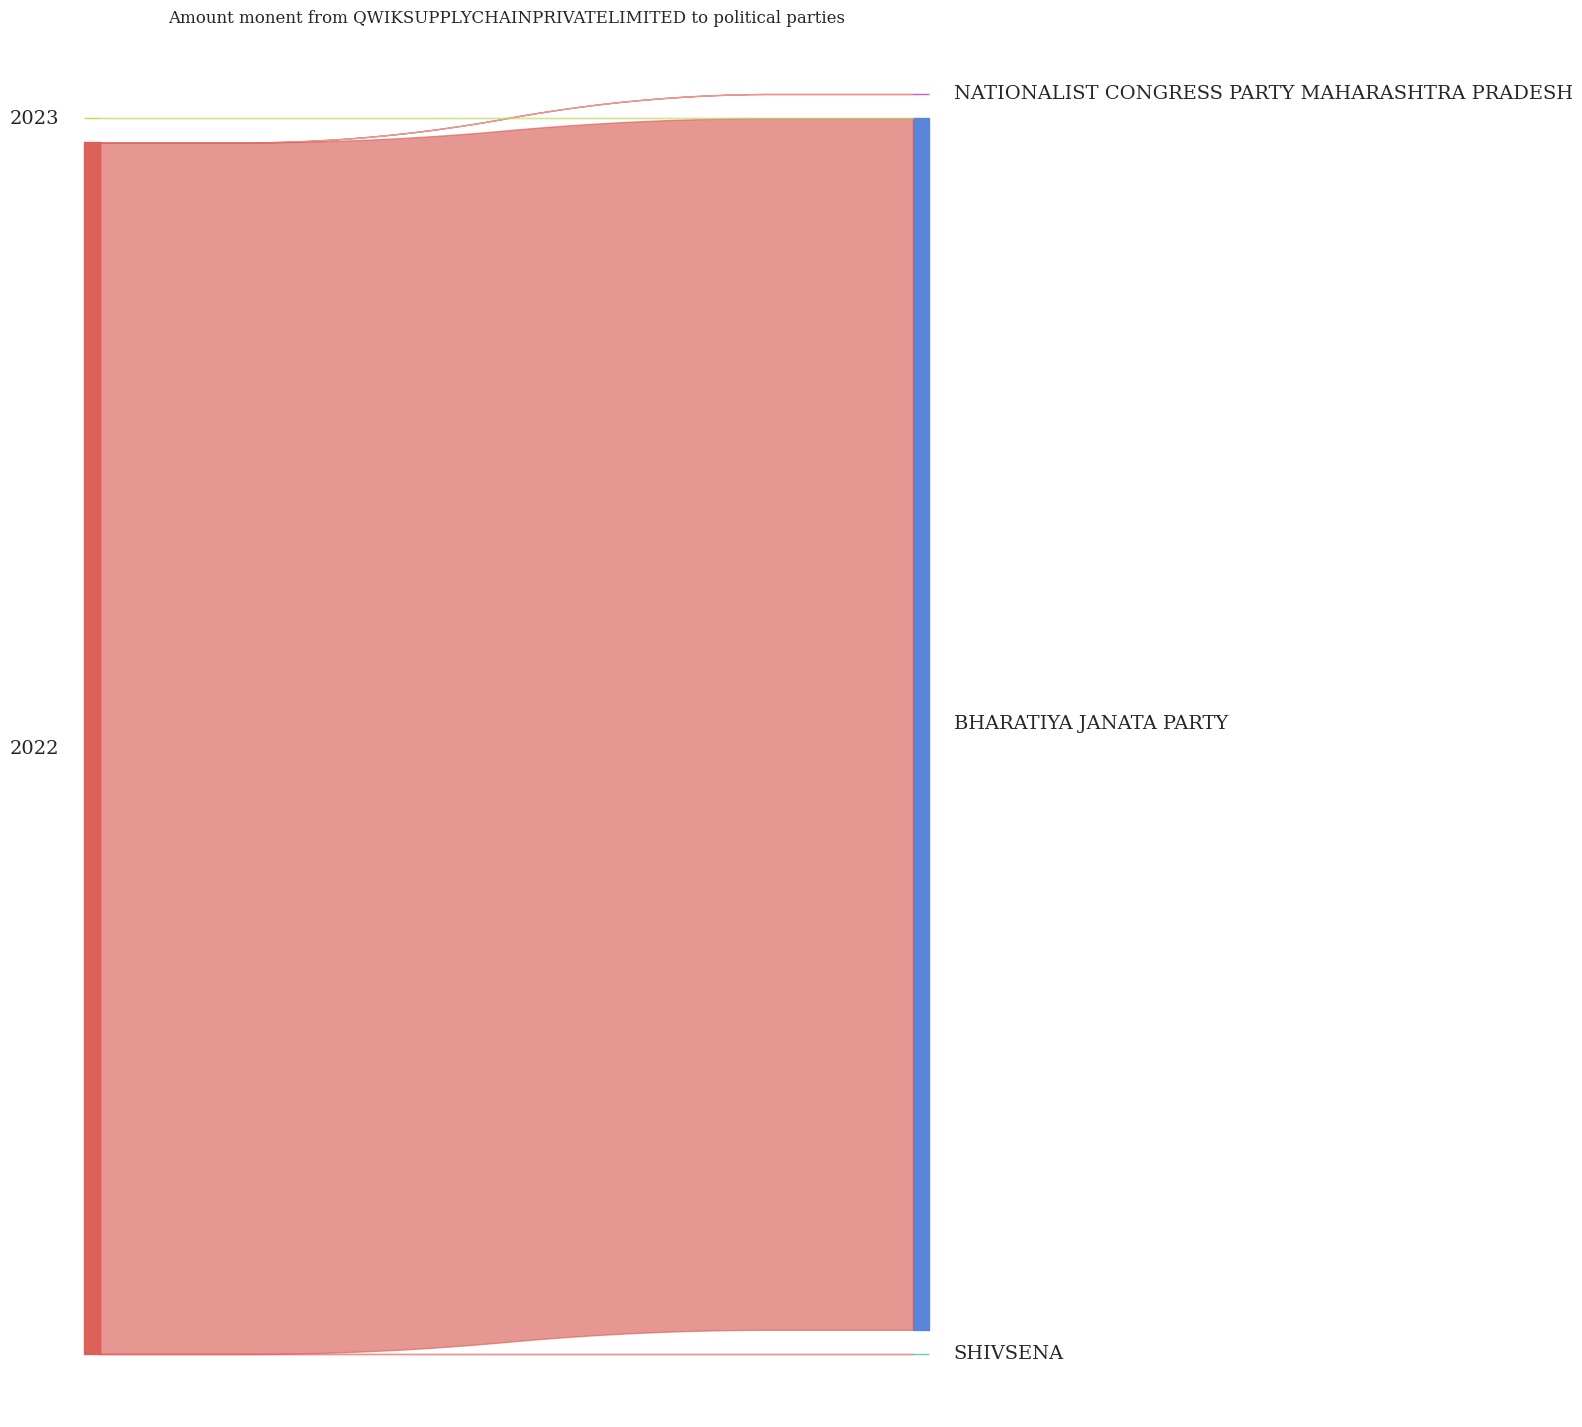

In [175]:
company_name =  'QWIKSUPPLYCHAINPRIVATELIMITED'

filtered_df3 = filtered_df[filtered_df['Purchaser'] == company_name]

# Sankey chart from matplotlib
sankey(
    left        = filtered_df3['Year'],
    right       = filtered_df3['PartyName'],
    leftWeight  = filtered_df3['Denomination'],
    rightWeight = filtered_df3['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

## 'HALDIA ENERGY LIMITED'

In [176]:
company_name = 'HALDIA ENERGY LIMITED'
filtered_df4 = filtered_df[filtered_df['Purchaser'] == company_name]
filtered_df4 

Urn JournalDate PurchaseDate ExpiryDate  \
110    00001202201050000002113  2022-01-05   2022-01-05 2022-01-19   
112    00001202201050000002113  2022-01-05   2022-01-05 2022-01-19   
114    00001202201050000002113  2022-01-05   2022-01-05 2022-01-19   
116    00001202201050000002113  2022-01-05   2022-01-05 2022-01-19   
118    00001202201050000002113  2022-01-05   2022-01-05 2022-01-19   
...                        ...         ...          ...        ...   
15575  00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
15576  00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
15577  00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
15578  00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   
15579  00001201905070000001348  2019-05-07   2019-05-07 2019-05-21   

                   Purchaser Prefix  BondNumber  IssueBranchCode  IssueTeller  \
110    HALDIA ENERGY LIMITED     OC     10111.0              1.0    6405134.0   
112    HALDIA ENERGY LIMITED     OC     10113.0              1.0    6405134.0   
114    HALDIA ENERGY LIMITED     OC     10115.0              1.0    6405134.0   
116    HALDIA ENERGY LIMITED     OC     10117.0              1.0    6405134.0   
118    HALDIA ENERGY LIMITED     OC     10119.0              1.0    6405134.0   
...                      ...    ...         ...              ...          ...   
15575  HALDIA ENERGY LIMITED     TL     11518.0              1.0    5899230.0   
15576  HALDIA ENERGY LIMITED     TL     11519.0              1.0    5899230.0   
15577  HALDIA ENERGY LIMITED     TL     11520.0              1.0    5899230.0   
15578  HALDIA ENERGY LIMITED     TL     11521.0              1.0    5899230.0   
15579  HALDIA ENERGY LIMITED     TL     11522.0              1.0    5899230.0   

                             IssueState  IssueBranchCodeNo IssueBranchCity  \
110    West Bengal and Andaman& Nicobar                1.0         Kolkata   
112    West Bengal and Andaman& Nicobar                1.0         Kolkata   
114    West Bengal and Andaman& Nicobar                1.0         Kolkata   
116    West Bengal and Andaman& Nicobar                1.0         Kolkata   
118    West Bengal and Andaman& Nicobar                1.0         Kolkata   
...                                 ...                ...             ...   
15575  West Bengal and Andaman& Nicobar                1.0         Kolkata   
15576  West Bengal and Andaman& Nicobar                1.0         Kolkata   
15577  West Bengal and Andaman& Nicobar                1.0         Kolkata   
15578  West Bengal and Andaman& Nicobar                1.0         Kolkata   
15579  West Bengal and Andaman& Nicobar                1.0         Kolkata   

      Unique_key DateEncashment                     PartyName   AccountNum  \
110      OC10111     2022-01-13  ALL INDIA TRINAMOOL CONGRESS  *******0688   
112      OC10113     2022-01-13  ALL INDIA TRINAMOOL CONGRESS  *******0688   
114      OC10115     2022-01-13  ALL INDIA TRINAMOOL CONGRESS  *******0688   
116      OC10117     2022-01-13  ALL INDIA TRINAMOOL CONGRESS  *******0688   
118      OC10119     2022-01-13  ALL INDIA TRINAMOOL CONGRESS  *******0688   
...          ...            ...                           ...          ...   
15575    TL11518     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
15576    TL11519     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
15577    TL11520     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
15578    TL11521     2019-05-10        BHARATIYA JANATA PARTY  *******8244   
15579    TL11522     2019-05-10        BHARATIYA JANATA PARTY  *******8244   

       PayBranchCode  PayTeller                     EncashedState  \
110              1.0  3490777.0  West Bengal and Andaman& Nicobar   
112              1.0  3490777.0  West Bengal and Andaman& Nicobar   
114              1.0  3490777.0  West Bengal and Andaman& Nicobar   
116              1.0  3490777.0  West Bengal and Andaman& Nicob

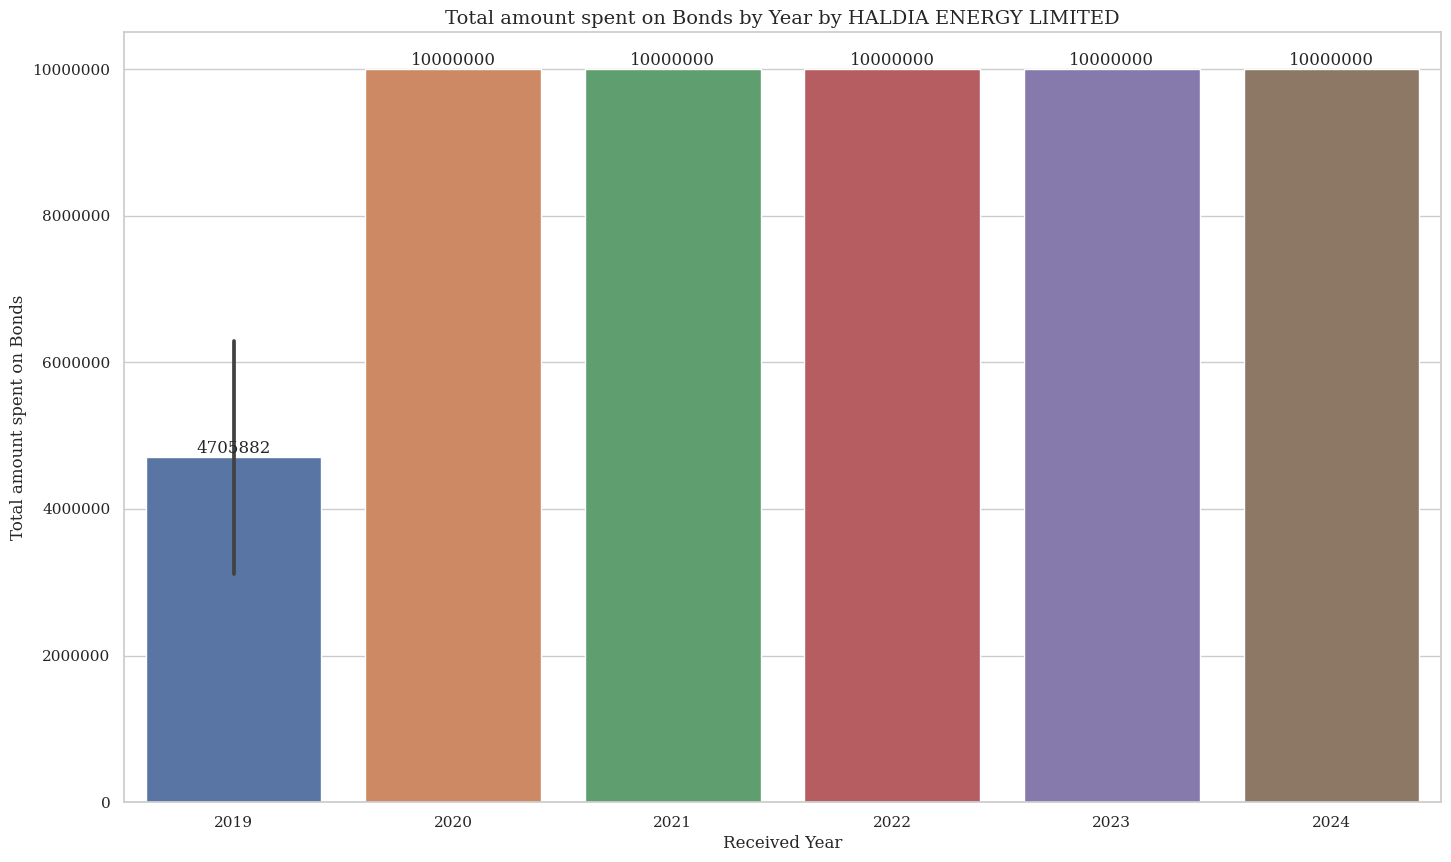

In [177]:
company_name = 'HALDIA ENERGY LIMITED'

filtered_df4 = filtered_df[filtered_df['Purchaser'] == company_name]
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df4, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

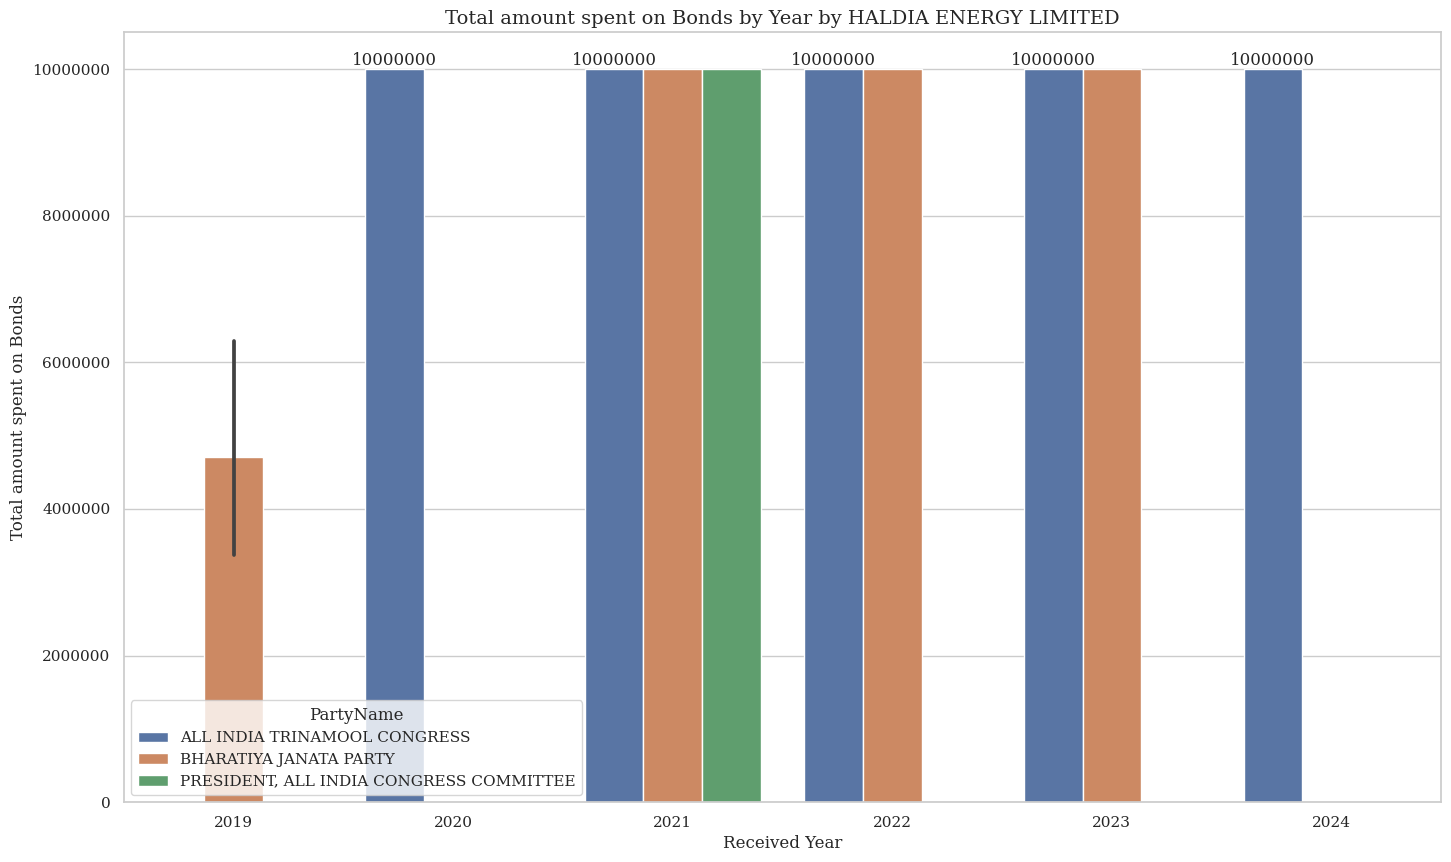

In [178]:
company_name =  'HALDIA ENERGY LIMITED'

filtered_df4 = filtered_df[filtered_df['Purchaser'] == company_name]
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df4, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [179]:
filtered_df4['PartyName'].unique()

array(['ALL INDIA TRINAMOOL CONGRESS', 'BHARATIYA JANATA PARTY',
       'PRESIDENT, ALL INDIA CONGRESS COMMITTEE'], dtype=object)

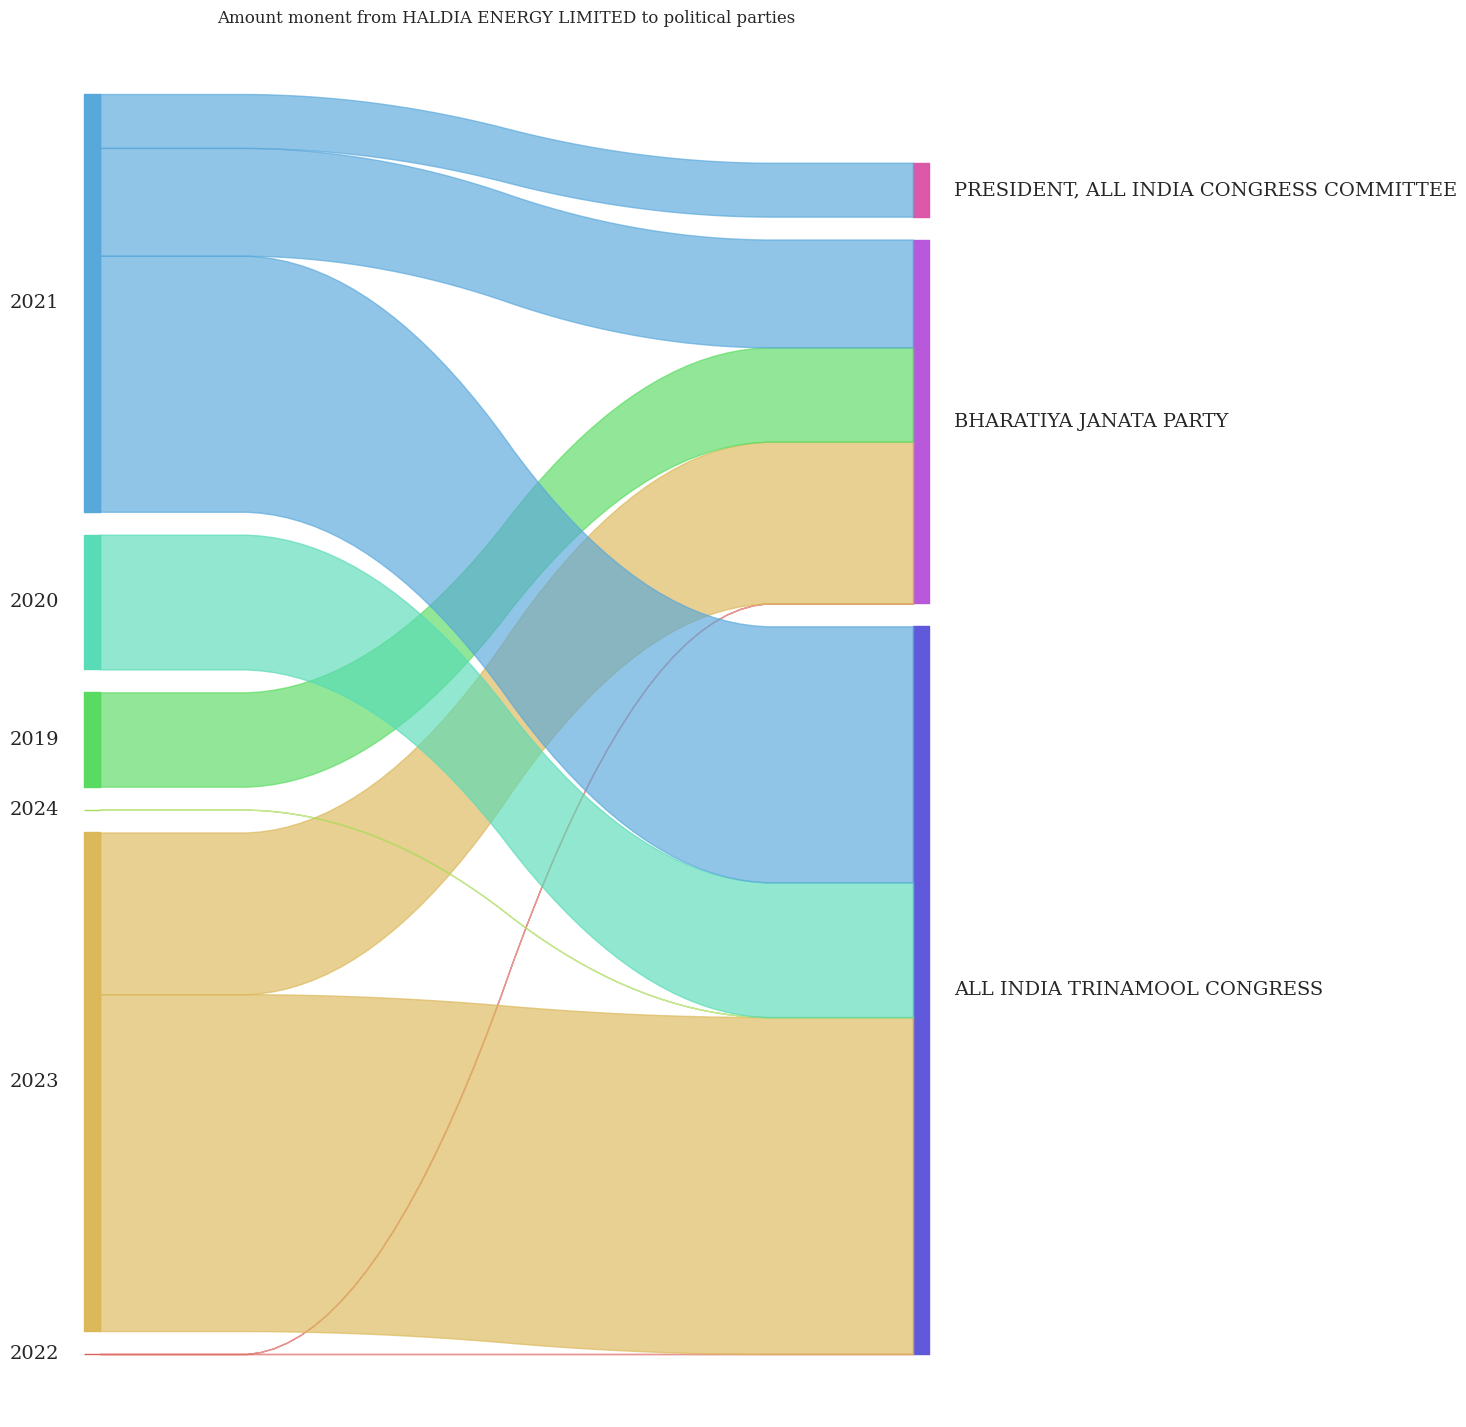

In [180]:
company_name =  'HALDIA ENERGY LIMITED'

filtered_df4 = filtered_df[filtered_df['Purchaser'] == company_name]

# Sankey chart from matplotlib
sankey(
    left        = filtered_df4['Year'],
    right       = filtered_df4['PartyName'],
    leftWeight  = filtered_df4['Denomination'],
    rightWeight = filtered_df4['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

##     'VEDANTA LIMITED'


In [181]:
company_name = 'VEDANTA LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

Urn JournalDate PurchaseDate ExpiryDate  \
1113   00300202201100000002307  2022-01-10   2022-01-10 2022-01-24   
1115   00300202201100000002307  2022-01-10   2022-01-10 2022-01-24   
1117   00300202201100000002307  2022-01-10   2022-01-10 2022-01-24   
1119   00300202201100000002307  2022-01-10   2022-01-10 2022-01-24   
1121   00300202201100000002307  2022-01-10   2022-01-10 2022-01-24   
...                        ...         ...          ...        ...   
17107  00691202201100000002306  2022-01-10   2022-01-10 2022-01-24   
17110  00691202201100000002306  2022-01-10   2022-01-10 2022-01-24   
17112  00691202201100000002306  2022-01-10   2022-01-10 2022-01-24   
17114  00691202201100000002306  2022-01-10   2022-01-10 2022-01-24   
17116  00691202201100000002306  2022-01-10   2022-01-10 2022-01-24   

             Purchaser Prefix  BondNumber  IssueBranchCode  IssueTeller  \
1113   VEDANTA LIMITED     OC     11082.0            300.0    7905165.0   
1115   VEDANTA LIMITED     OC     11084.0            300.0    7905165.0   
1117   VEDANTA LIMITED     OC     11086.0            300.0    7905165.0   
1119   VEDANTA LIMITED     OC     11088.0            300.0    7905165.0   
1121   VEDANTA LIMITED     OC     11090.0            300.0    7905165.0   
...                ...    ...         ...              ...          ...   
17107  VEDANTA LIMITED     TL     13688.0            691.0    3428540.0   
17110  VEDANTA LIMITED     TL     13690.0            691.0    3428540.0   
17112  VEDANTA LIMITED     TL     13692.0            691.0    3428540.0   
17114  VEDANTA LIMITED     TL     13694.0            691.0    3428540.0   
17116  VEDANTA LIMITED     TL     13696.0            691.0    3428540.0   

        IssueState  IssueBranchCodeNo IssueBranchCity Unique_key  \
1113   Maharashtra              300.0          Mumbai    OC11082   
1115   Maharashtra              300.0          Mumbai    OC11084   
1117   Maharashtra              300.0          Mumbai    OC11086   
1119   Maharashtra              300.0          Mumbai    OC11088   
1121   Maharashtra              300.0          Mumbai    OC11090   
...            ...                ...             ...        ...   
17107        Delhi              691.0       New Delhi    TL13688   
17110        Delhi              691.0       New Delhi    TL13690   
17112        Delhi              691.0       New Delhi    TL13692   
17114        Delhi              691.0       New Delhi    TL13694   
17116        Delhi              691.0       New Delhi    TL13696   

      DateEncashment               PartyName   AccountNum  PayBranchCode  \
1113      2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
1115      2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
1117      2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
1119      2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
1121      2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
...              ...                     ...          ...            ...   
17107     2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   
17110     2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   
17112     2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   
17114     2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   
17116     2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   

       PayTeller EncashedState  EncashedBranchCode EncashedCity  Denomination  \
1113   5642191.0         Delhi               691.0    New Delhi    10000000.0   
1115   5642191.0         Delhi               691.0    New Delhi    10000000.0   
1117   5642191.0         Delhi               691.0    New Delhi    10000000.0   
1119   5642191.0         Delhi               691.0    New Delhi    10000000.0   
1121   5642191.0         Delhi               691.0    New Delhi    10000000.0   
...          ...           ...                 ...          ...      

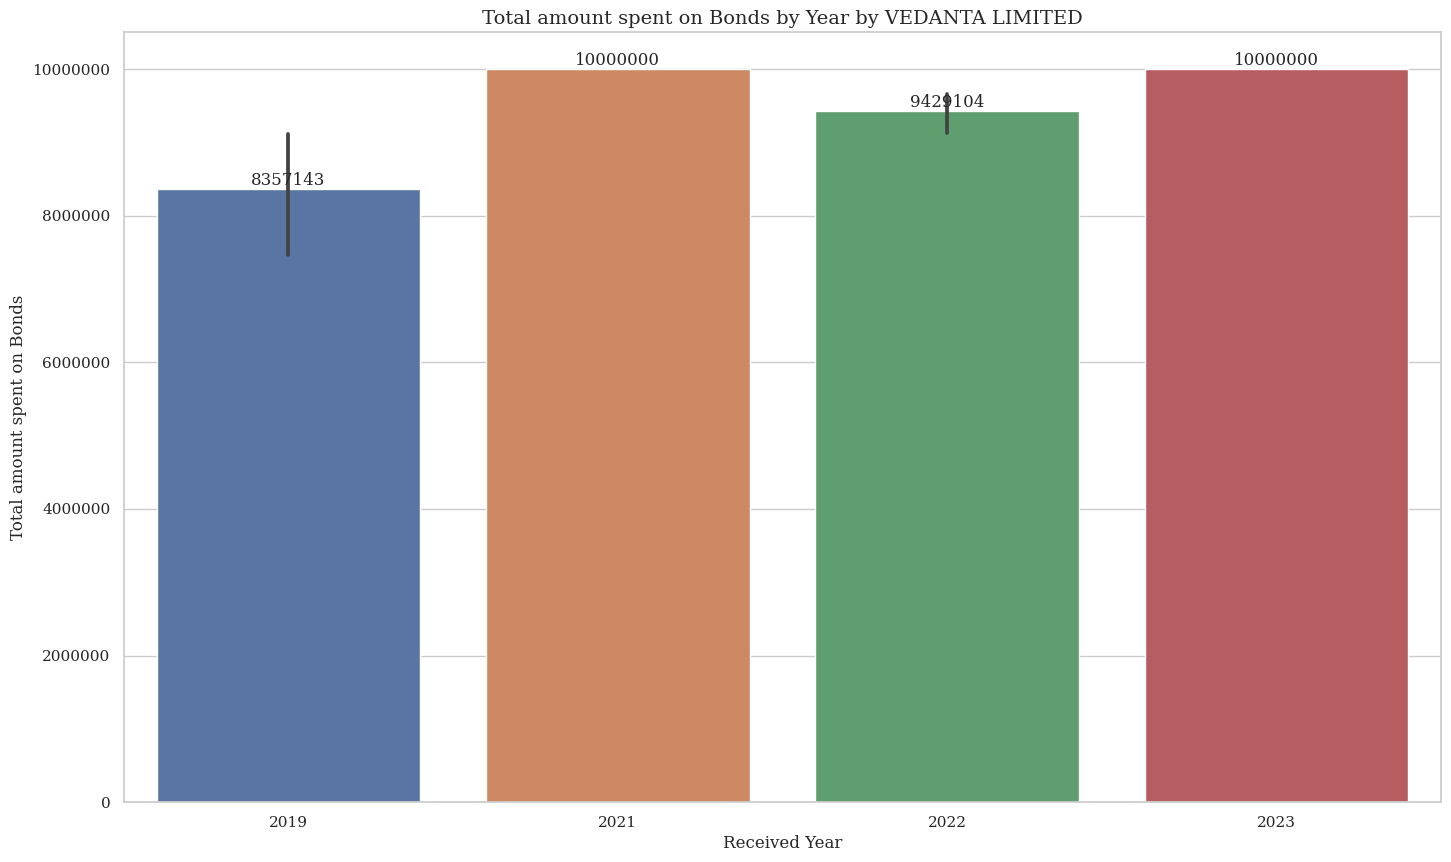

In [182]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

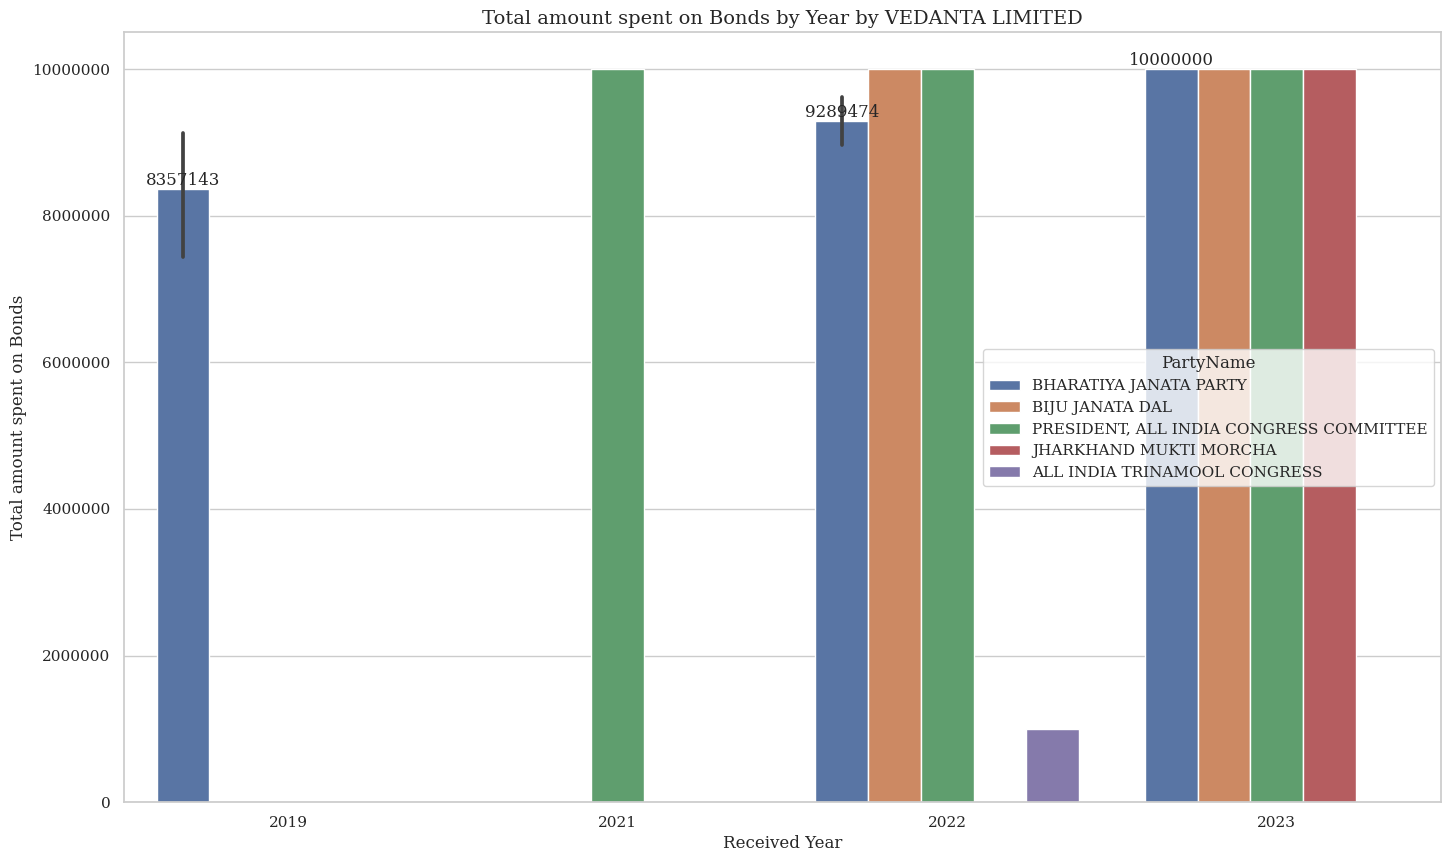

In [183]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [184]:
company_name_df['PartyName'].unique()

array(['BHARATIYA JANATA PARTY', 'BIJU JANATA DAL',
       'PRESIDENT, ALL INDIA CONGRESS COMMITTEE',
       'JHARKHAND MUKTI MORCHA', 'ALL INDIA TRINAMOOL CONGRESS'],
      dtype=object)

In [186]:
company_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 1113 to 17116
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Urn                 426 non-null    object        
 1   JournalDate         426 non-null    datetime64[ns]
 2   PurchaseDate        426 non-null    datetime64[ns]
 3   ExpiryDate          426 non-null    datetime64[ns]
 4   Purchaser           426 non-null    object        
 5   Prefix              426 non-null    object        
 6   BondNumber          426 non-null    float64       
 7   IssueBranchCode     426 non-null    float64       
 8   IssueTeller         426 non-null    float64       
 9   IssueState          426 non-null    object        
 10  IssueBranchCodeNo   426 non-null    float64       
 11  IssueBranchCity     426 non-null    object        
 12  Unique_key          426 non-null    object        
 13  DateEncashment      426 non-null    datetime64[ns]

In [187]:
company_name_df.to_csv("check.csv")


In [188]:
company_name_df = pd.read_csv('check.csv')

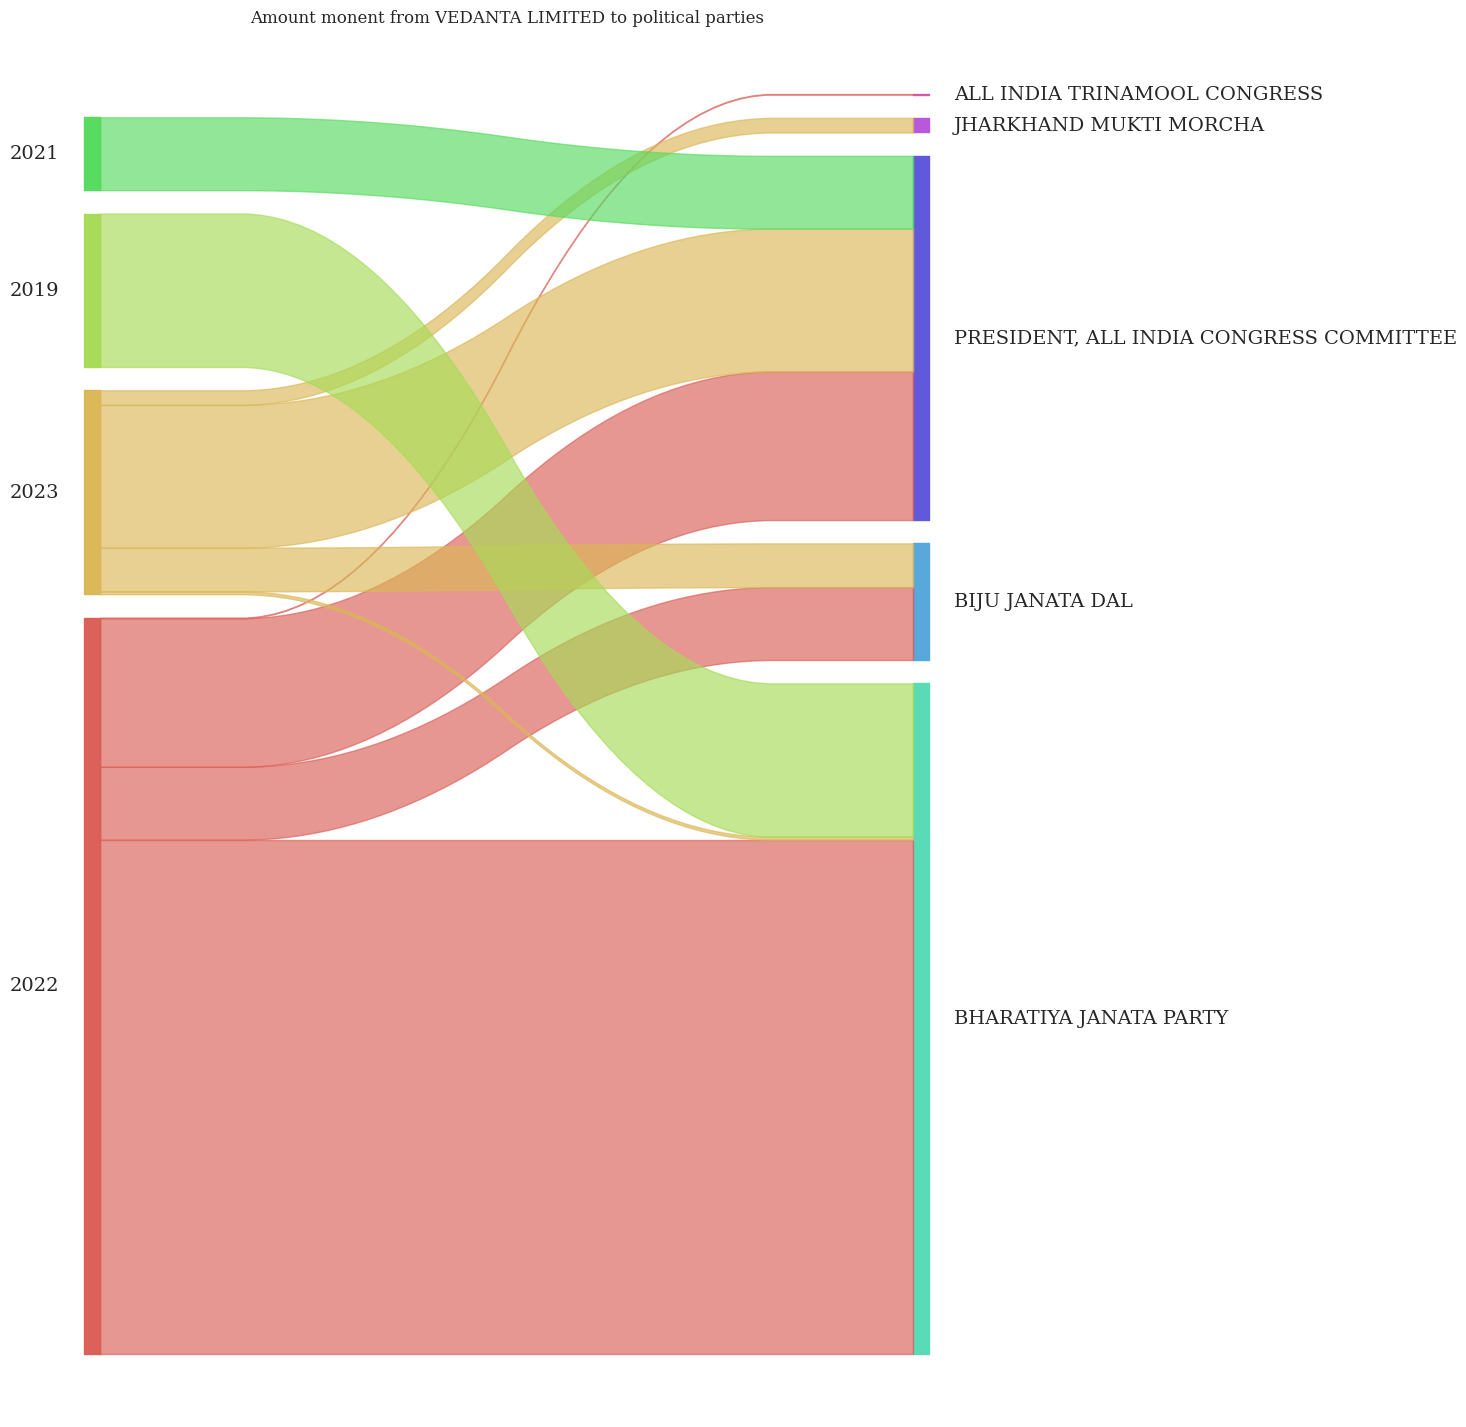

In [189]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

## 	'ESSEL MINING AND INDS LTD',


In [ ]:
company_name = 'ESSEL MINING AND INDS LTD'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

##     'MKJ ENTERPRISES LIMITED', 


In [ ]:
company_name = 'MKJ ENTERPRISES LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

## 	'ESSEL MINING AND INDS LTD'

In [ ]:
company_name = 'ESSEL MINING AND INDS LTD'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

##     'WESTERN UP POWER TRANSMISSION COMPANY LI MITED',

In [ ]:
company_name = 'WESTERN UP POWER TRANSMISSION COMPANY LI MITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

##     'KEVENTER FOODPARK INFRA LIMITED', 

In [ ]:
company_name = 'KEVENTER FOODPARK INFRA LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

## 	'MADANLAL LTD.',

In [ ]:
company_name = 'MADANLAL LTD.'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

##     'BHARTI AIRTEL LIMITED', 

In [ ]:
company_name = 'BHARTI AIRTEL LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

## 	'V M SALGAOCAR CORPORATION PVT LTD',

In [ ]:
company_name = 'DLF COMMERCIAL DEVELOPERS LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

##     'YASHODA SUPER SPECIALITY HOSPITAL',

In [ ]:
company_name = 'YASHODA SUPER SPECIALITY HOSPITAL'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

##     'UTKAL ALUMINA INTERNATIONAL LIMITED',


In [ ]:
company_name = 'UTKAL ALUMINA INTERNATIONAL LIMITED'
company_name_df = filtered_df[filtered_df['Purchaser'] == company_name]
company_name_df

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_name_df, x='Year', y='Denomination', hue='PartyName')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year by {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
company_name_df['PartyName'].unique()

In [ ]:
company_name_df.head()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_df['Year'],
    right       = company_name_df['PartyName'],
    leftWeight  = company_name_df['Denomination'],
    rightWeight = company_name_df['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

# Bivariate Analysis

In [ ]:
yearwise_donation = donors_df[['PurchaseDate','Denominations']]
# Extract year from 'PurchaseDate' column and create a new column 'Year'
yearwise_donation['Year'] = yearwise_donation['PurchaseDate'].dt.year
# Group by 'Year' and calculate the sum of 'Denominations' for each year
yearly_sum_donations = yearwise_donation.groupby('Year')['Denominations'].sum().reset_index()
yearly_sum_donations 

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=yearly_sum_donations, x='Year', y='Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
yearwise_donation = donors_df[['PurchaseDate','Denominations']]
# Extract year from 'PurchaseDate' column and create a new column 'Year'
yearwise_donation['Year'] = yearwise_donation['PurchaseDate'].dt.year
# Group by 'Year' and calculate the sum of 'Denominations' for each year
yearly_count_donations = yearwise_donation.groupby('Year')['Denominations'].count().reset_index()
yearly_count_donations 

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=yearly_count_donations, x='Year', y='Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Assuming 'donors_df' is your DataFrame with 'PurchaseDate' and 'Denominations' columns
# Convert 'PurchaseDate' column to datetime if it's not already in datetime format
donors_df['PurchaseDate'] = pd.to_datetime(donors_df['PurchaseDate'])

# Extract year and month from 'PurchaseDate' column
donors_df['Year'] = donors_df['PurchaseDate'].dt.year
donors_df['Month'] = donors_df['PurchaseDate'].dt.month

# Create a new column for month-year combination (e.g., "Jan 2018", "Feb 2018", etc.)
donors_df['MonthYear'] = donors_df['PurchaseDate'].dt.strftime('%b %Y')

# Group by 'MonthYear' and calculate the sum of 'Denominations' for each month-year combination
monthly_sum_donations = donors_df.groupby('MonthYear')['Denominations'].sum().reset_index()

# Slpiting year and month from the monthyear column 
monthly_sum_donations[['Month', 'Year']] = monthly_sum_donations['MonthYear'].str.split(expand=True)

# Display the resulting DataFrame
monthly_sum_donations

In [ ]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=monthly_sum_donations, x='MonthYear', y='Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=-45)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

# Political Parties Denomonation Analyisis

In [ ]:
receiver_df.columns

In [ ]:
political_funds = receiver_df[['DateEncashment','PartyName','Denominations']]
# Create a new column 'ReceivedYear' based on the year component of 'DateEncashment'
political_funds['ReceivedYear'] = political_funds['DateEncashment'].dt.year
political_funds = political_funds.groupby(['PartyName','ReceivedYear']).agg(
    min_Denominations=('Denominations', 'min'),
    max_Denominations=('Denominations', 'max'),
    sum_Denominations=('Denominations', 'sum'),
    count_Denominations=('Denominations', 'count')).reset_index()
political_funds = political_funds.sort_values('PartyName')
political_funds

In [ ]:
political_party_list = list(political_funds['PartyName'].unique())
political_party_list

## AAM AADMI PARTY

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name = 'AAM AADMI PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name = 'AAM AADMI PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## ADYAKSHA SAMAJVADI PARTY

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ADYAKSHA SAMAJVADI PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ADYAKSHA SAMAJVADI PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'ALL INDIA TRINAMOOL CONGRESS'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA TRINAMOOL CONGRESS'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA TRINAMOOL CONGRESS'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'BHARAT RASHTRA SAMITHI'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARAT RASHTRA SAMITHI'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARAT RASHTRA SAMITHI'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'BHARATIYA JANATA PARTY'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARATIYA JANATA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARATIYA JANATA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'BIHAR PRADESH JANTA DAL(UNITED)'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BIHAR PRADESH JANTA DAL(UNITED)'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BIHAR PRADESH JANTA DAL(UNITED)'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'BIJU JANATA DAL'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BIJU JANATA DAL'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BIJU JANATA DAL'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'DRAVIDA MUNNETRA KAZHAGAM (DMK)'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'DRAVIDA MUNNETRA KAZHAGAM (DMK)'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'DRAVIDA MUNNETRA KAZHAGAM (DMK)'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'GOA FORWARD PARTY'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'GOA FORWARD PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'GOA FORWARD PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'JAMMU AND KASHMIR NATIONAL CONFERENCE'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'JAMMU AND KASHMIR NATIONAL CONFERENCE'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'JAMMU AND KASHMIR NATIONAL CONFERENCE'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'JANASENA PARTY'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'JANASENA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'JANASENA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'JANATA DAL ( SECULAR )'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'JANATA DAL ( SECULAR )'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'JANATA DAL ( SECULAR )'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'JHARKHAND MUKTI MORCHA'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'JHARKHAND MUKTI MORCHA'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'JHARKHAND MUKTI MORCHA'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'MAHARASHTRAWADI GOMNTAK PARTY'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'MAHARASHTRAWADI GOMNTAK PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'MAHARASHTRAWADI GOMNTAK PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'PRESIDENT, ALL INDIA CONGRESS COMMITTEE'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'PRESIDENT, ALL INDIA CONGRESS COMMITTEE'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'RASHTRIYA JANTA DAL'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'RASHTRIYA JANTA DAL'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'RASHTRIYA JANTA DAL'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'SHIROMANI AKALI DAL'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'SHIROMANI AKALI DAL'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'SHIROMANI AKALI DAL'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'SHIVSENA'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'SHIVSENA'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'SHIVSENA'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'SIKKIM DEMOCRATIC FRONT'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'SIKKIM DEMOCRATIC FRONT'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'SIKKIM DEMOCRATIC FRONT'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'SIKKIM KRANTIKARI MORCHA'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'SIKKIM KRANTIKARI MORCHA'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'SIKKIM KRANTIKARI MORCHA'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'TELUGU DESAM PARTY'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'TELUGU DESAM PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'TELUGU DESAM PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

## 'YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CONGRESS PARTY)'

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CONGRESS PARTY)'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CONGRESS PARTY)'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [ ]:
filtered_df

In [ ]:
political_funds.columns

In [ ]:
alldata_df.shape

# Sankey 

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = perfect_data['IssueBranchCity'],
    right       = perfect_data['EncashedCity'],
    leftWeight  = perfect_data['Denomination'],
    rightWeight = perfect_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title('Bonds moment in cities') 
plt.show() 

In [ ]:
perfect_data.columns

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = perfect_data['IssueBranchCity'],
    right       = perfect_data['PartyName'],
    leftWeight  = perfect_data['Denomination'],
    rightWeight = perfect_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title('Bonds moment in cities') 
plt.show()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = perfect_data['EncashedCity'],
    right       = perfect_data['PartyName'],
    leftWeight  = perfect_data['Denomination'],
    rightWeight = perfect_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title('Bonds moment in cities') 
plt.show()

In [ ]:
# Sankey chart from matplotlib
sankey(
    left        = perfect_data['PurchaseDate'].dt.year,
    right       = perfect_data['PartyName'],
    leftWeight  = perfect_data['Denomination'],
    rightWeight = perfect_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title('Bonds moment in cities') 
plt.show()

In [ ]:
from chart_studio import plotly as py 

In [ ]:
source = perfect_data['PurchaseDate'].dt.year.drop_duplicates().tolist()
source 

In [ ]:
targets  = perfect_data['PartyName'].drop_duplicates().tolist()
targets

In [ ]:
# list of all nodes 
all_nodes = source + targets 
all_nodes

In [ ]:
leftWeight  = perfect_data['Denomination'],
rightWeight = perfect_data['Denomination']